In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from folium.plugins import MarkerCluster
from timezonefinder import TimezoneFinder
import pytz

In [2]:
# Specify the path to your Excel file
excel_file_path = '../data/wind_farm_data/locations_wind_farms.xlsx'

df = pd.read_excel(excel_file_path)

tf = TimezoneFinder()

def get_timezone(lat, lon):
    timezone_str = tf.timezone_at(lat=lat, lng=lon)
    if timezone_str is None:
        return None
    else:
        return pytz.timezone(timezone_str)

df['Timezone'] = df.apply(lambda row: get_timezone(row['Latitude'], row['Longitude']), axis=1)
df.head()

Abbreviation             Farm Name  Latitude  Longitude             Timezone
0        ARWF1      Ararat Wind Farm -37.26265  143.07839  Australia/Melbourne
1     BALDHWF1  Bald Hills Wind Farm -38.78900  145.92600  Australia/Melbourne
2     BANGOWF1   Bango 973 Wind Farm -34.56000  148.79000     Australia/Sydney
3     BANGOWF2   Bango 999 Wind Farm -34.56000  148.79000     Australia/Sydney
4       BLUFF1   The Bluff Wind Farm -33.36600  138.80550   Australia/Adelaide


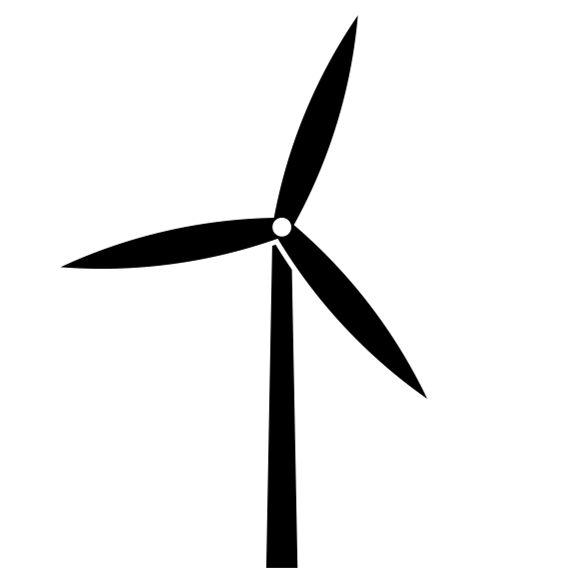
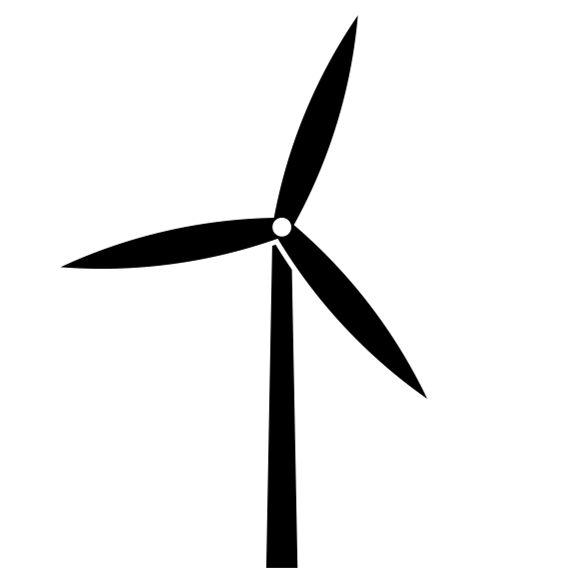
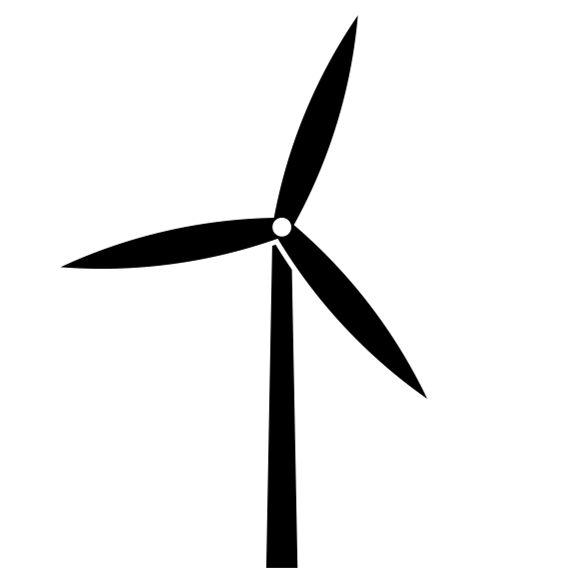
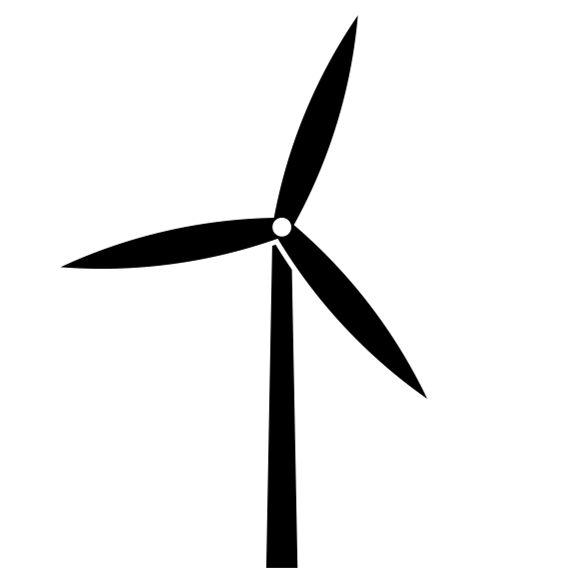
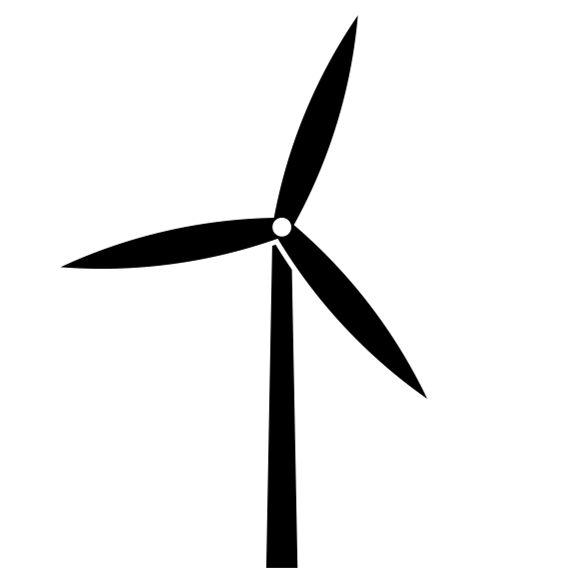
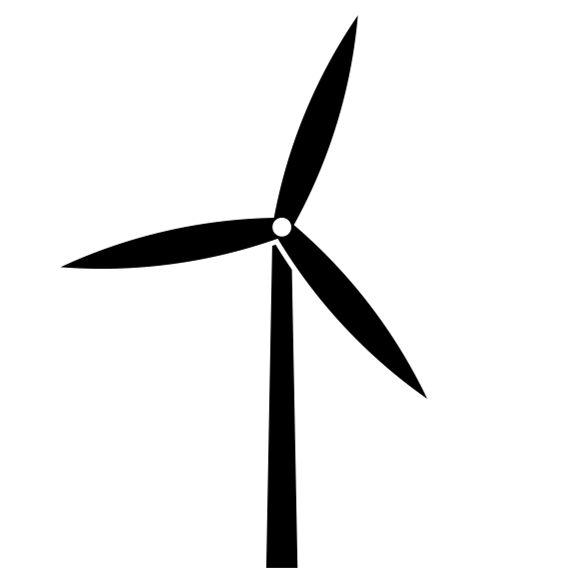
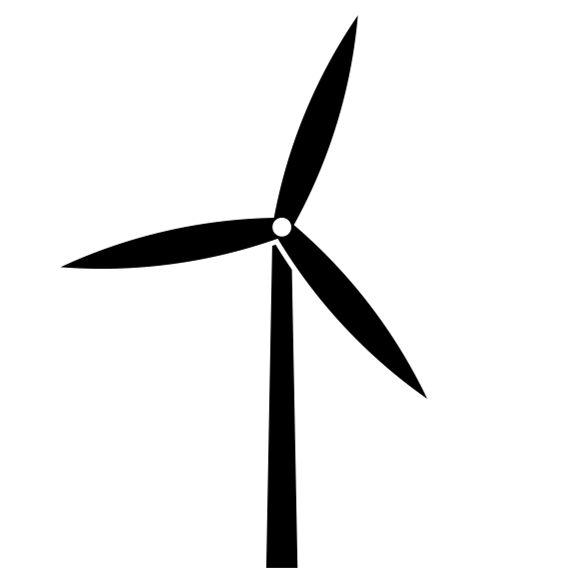
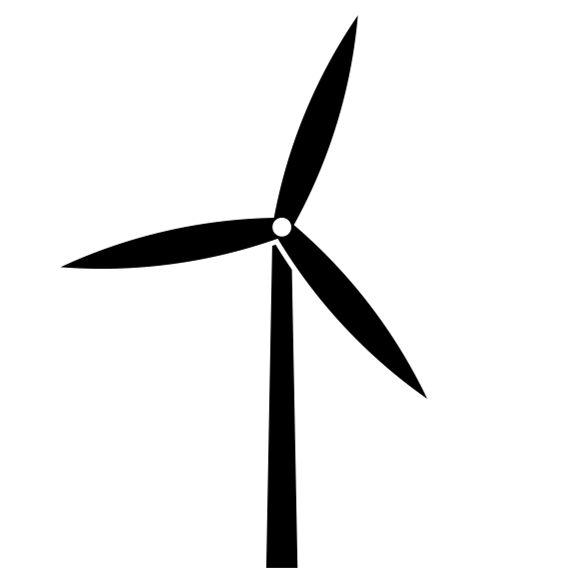
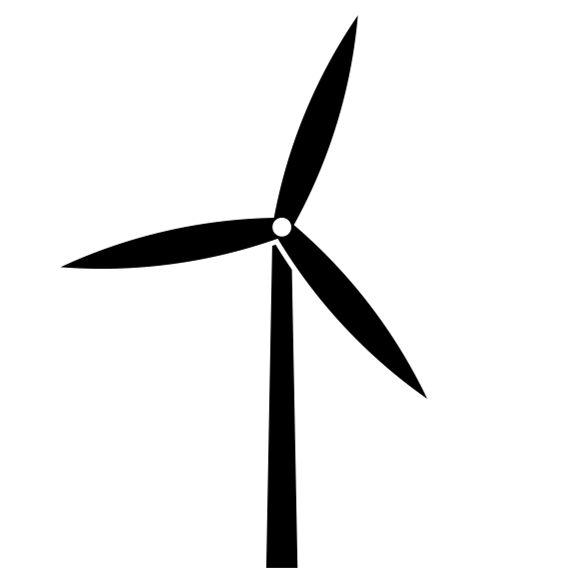
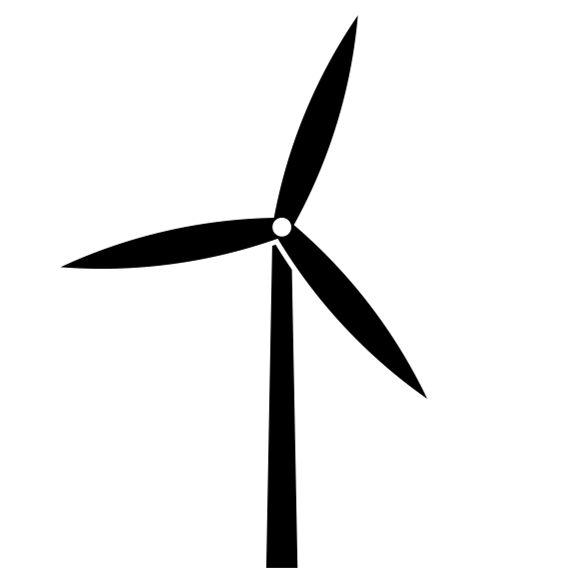
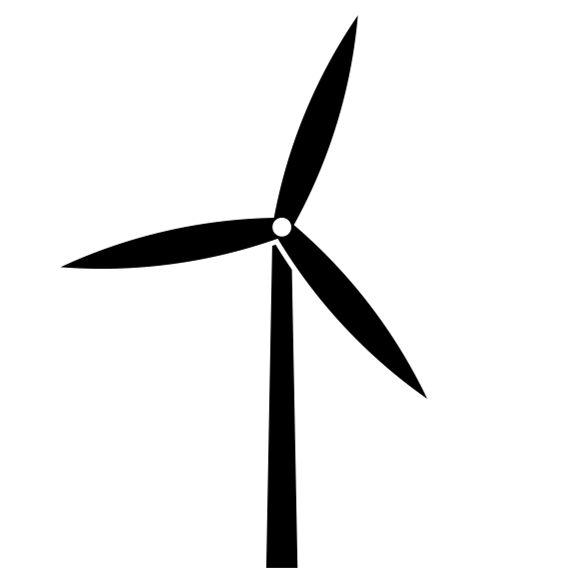
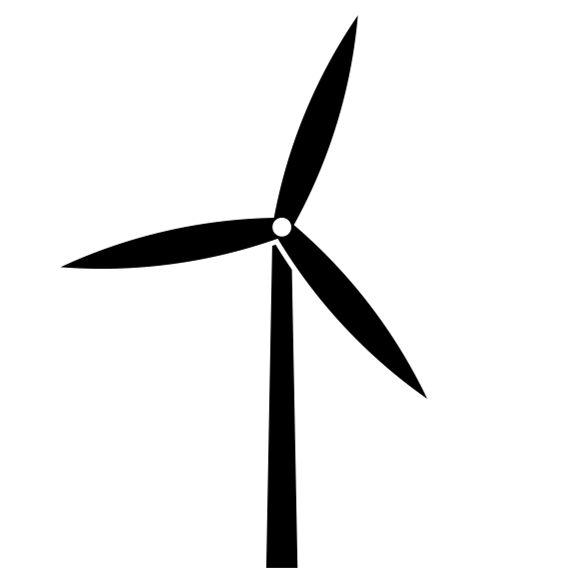
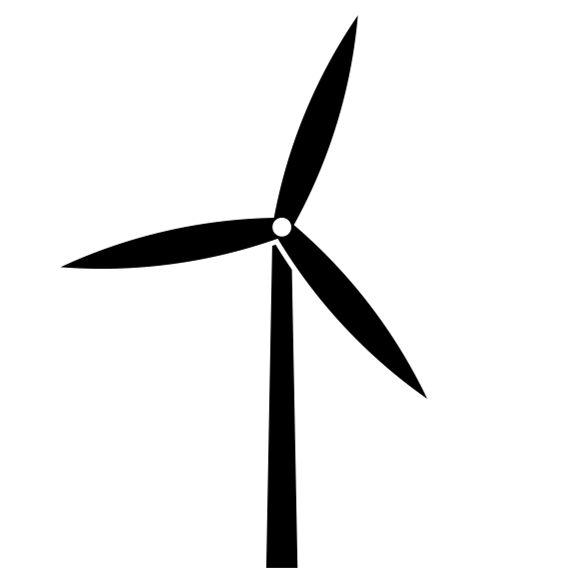
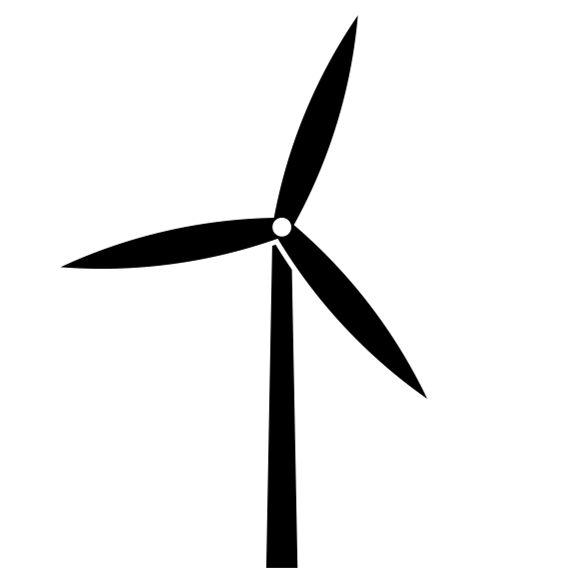
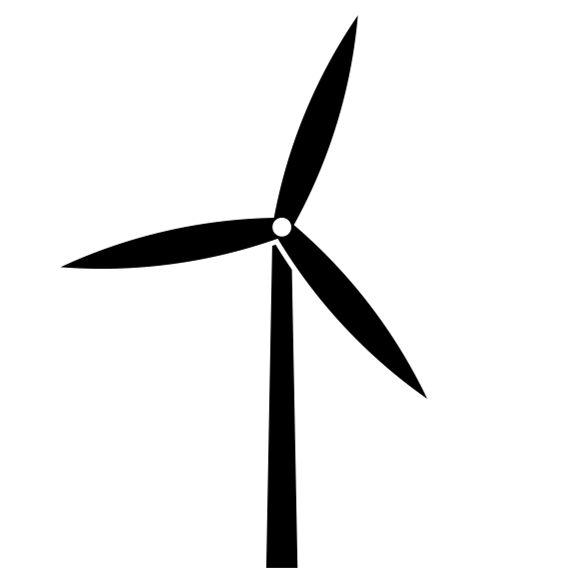
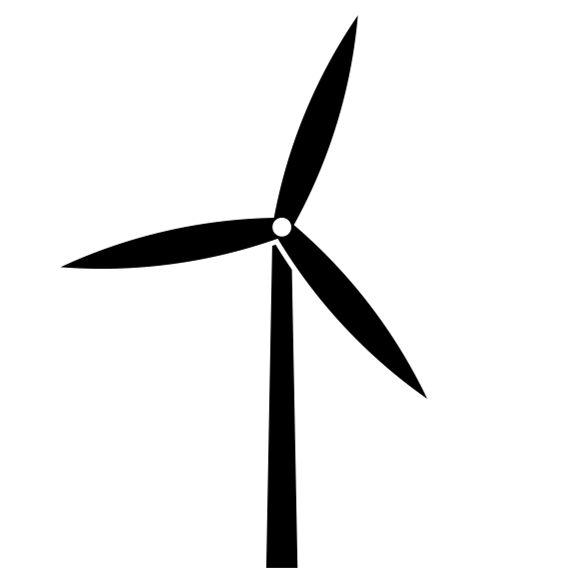
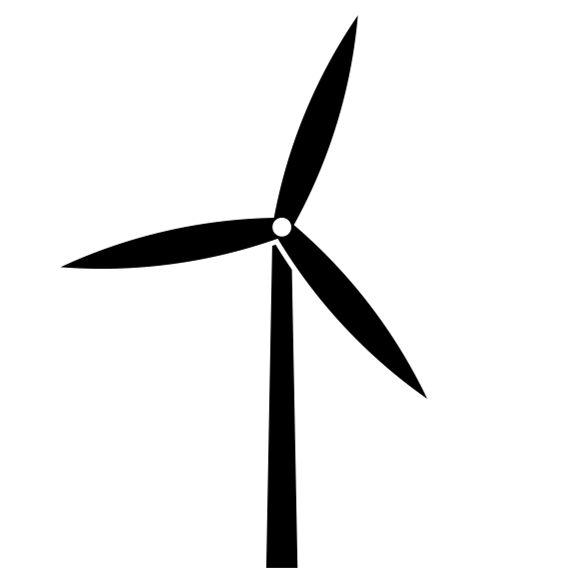
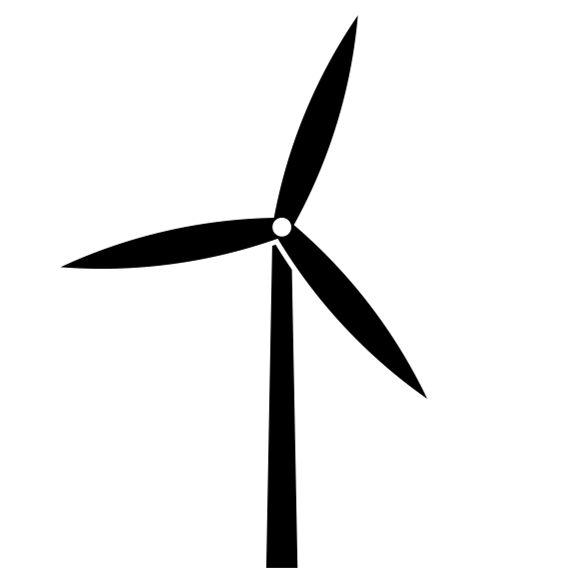
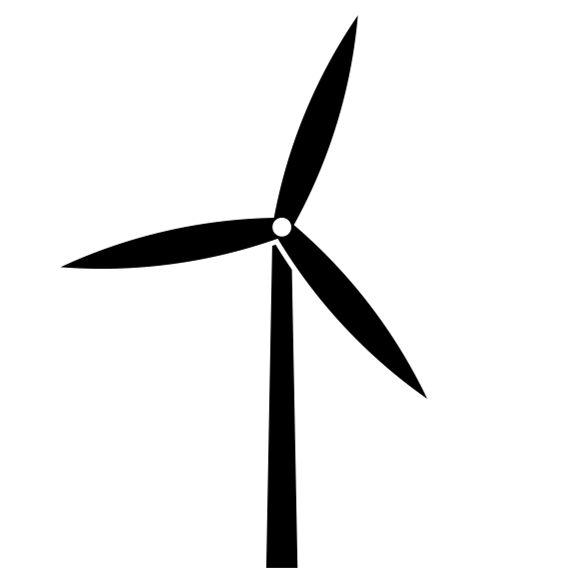
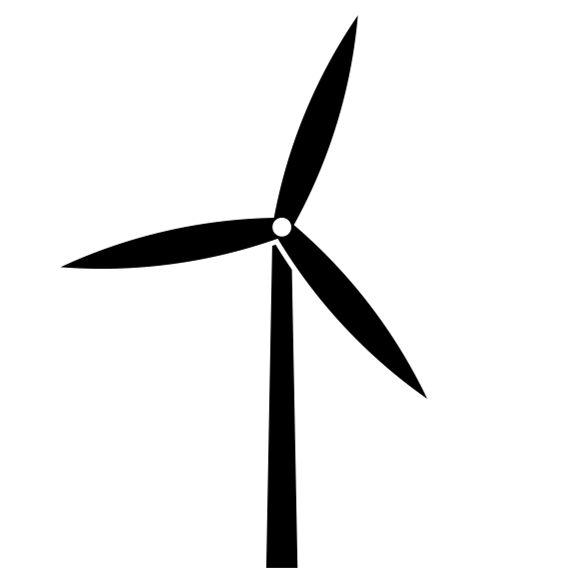
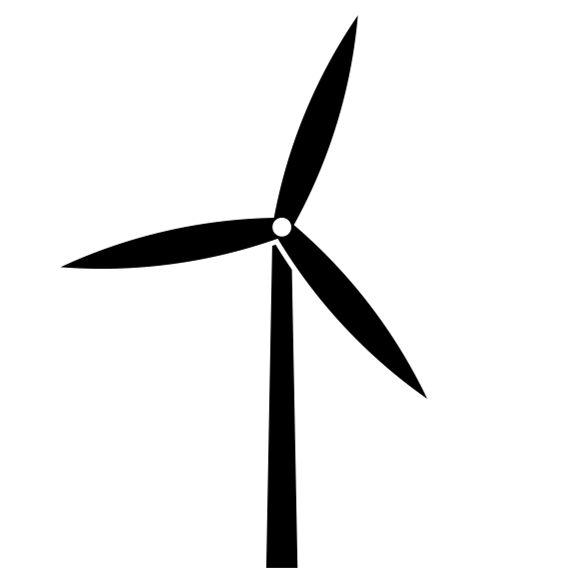
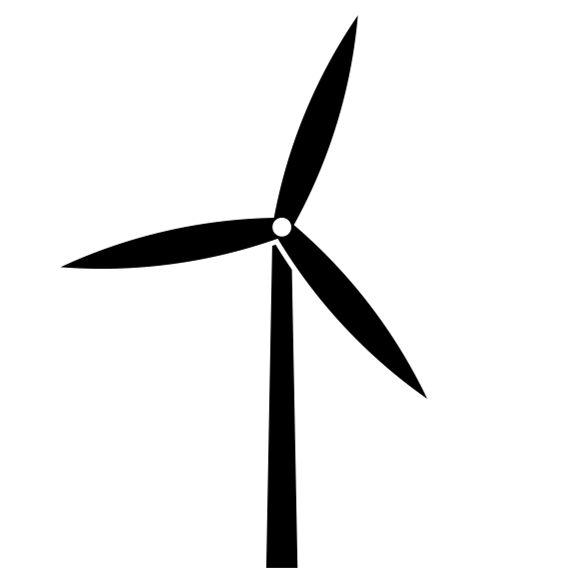
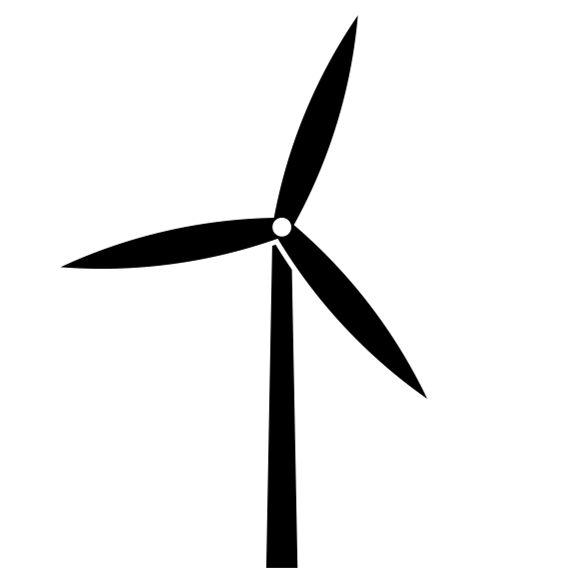
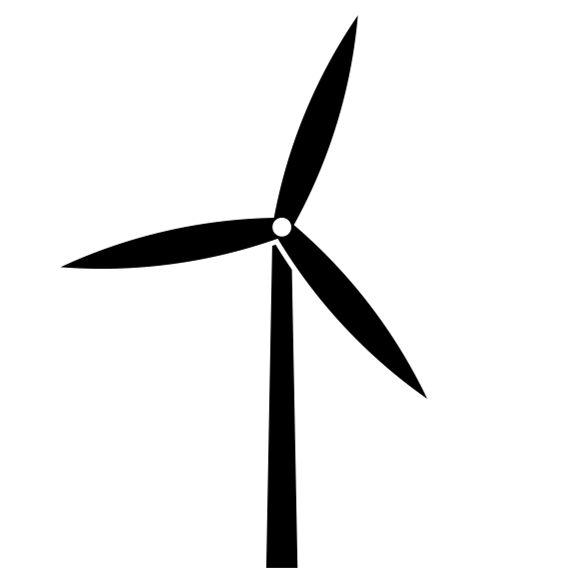
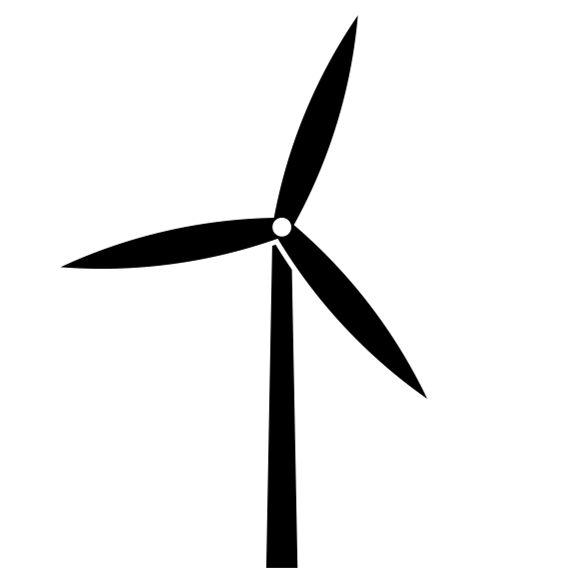
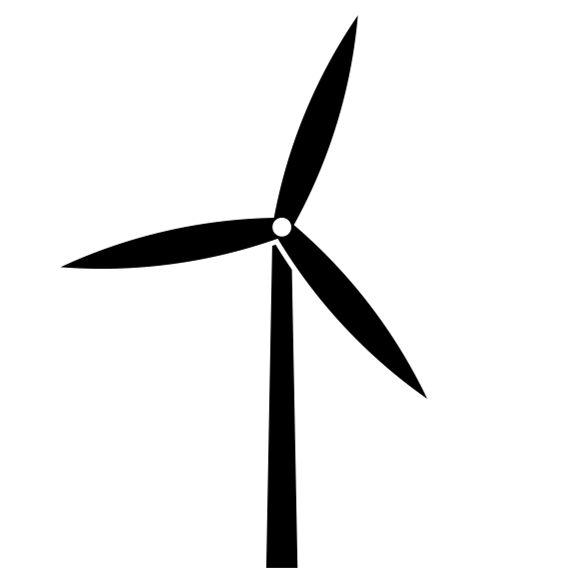
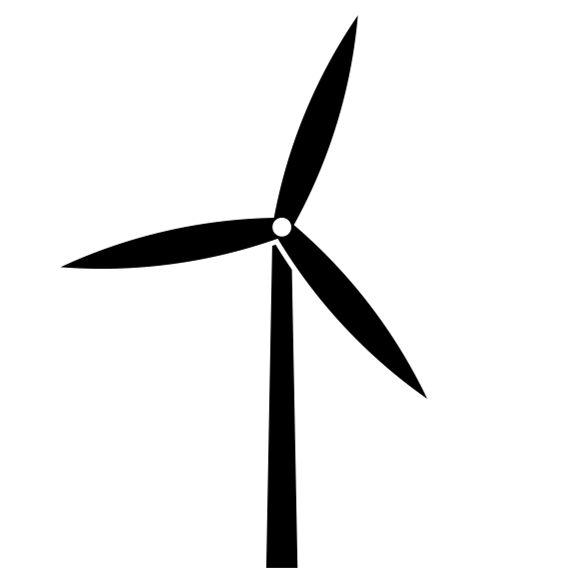
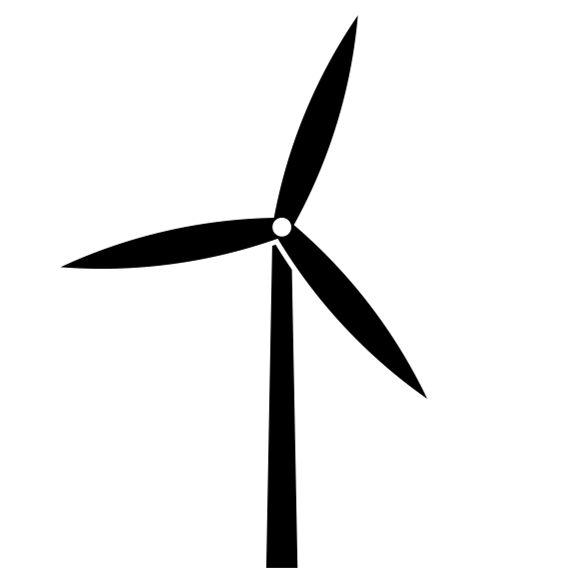
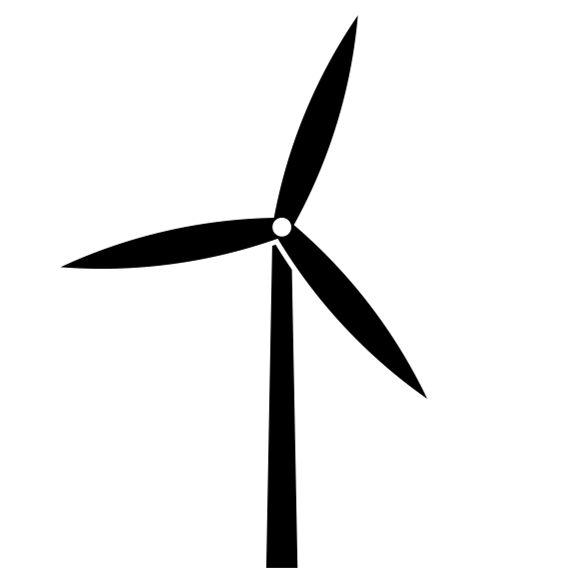
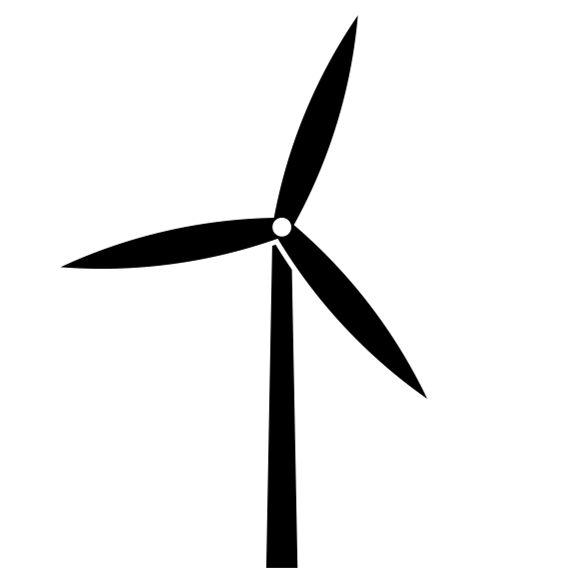
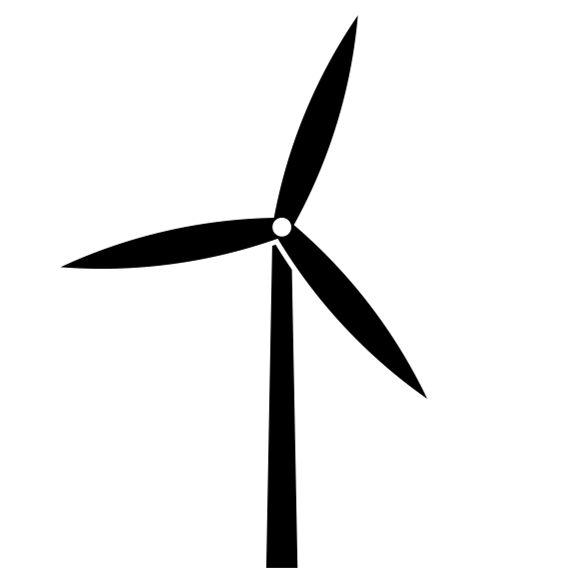
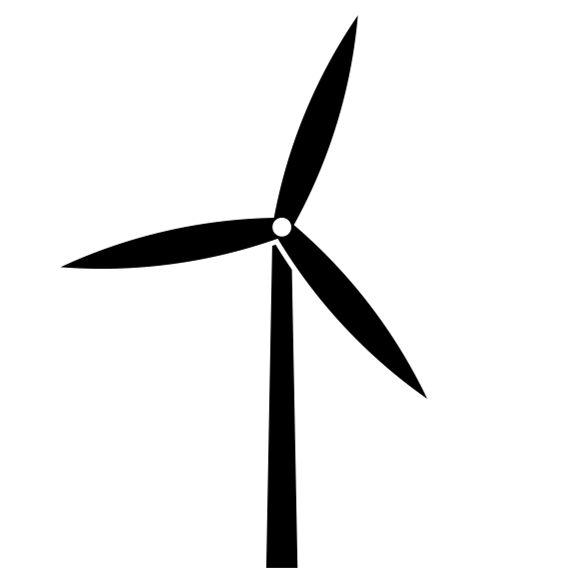
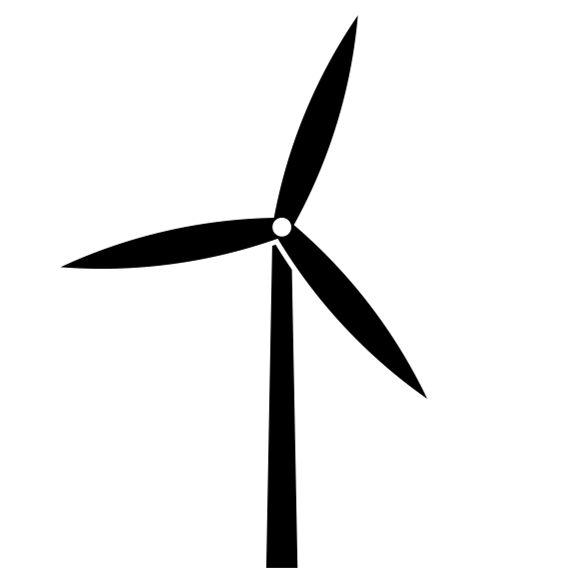
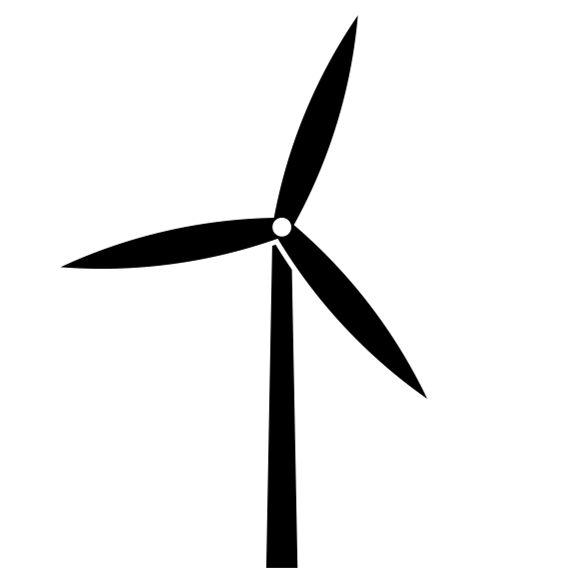
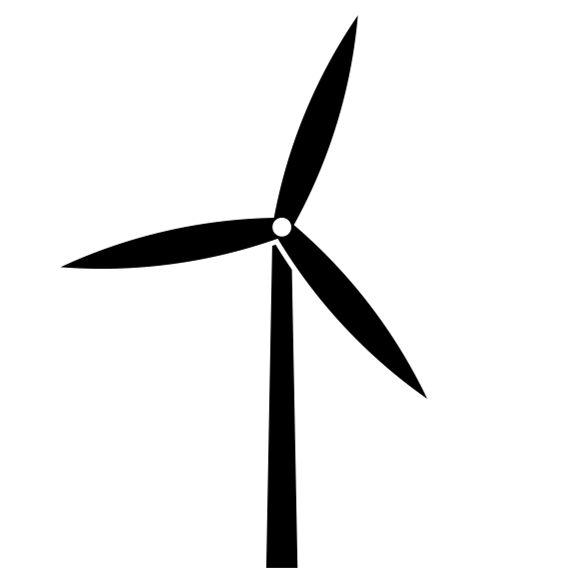
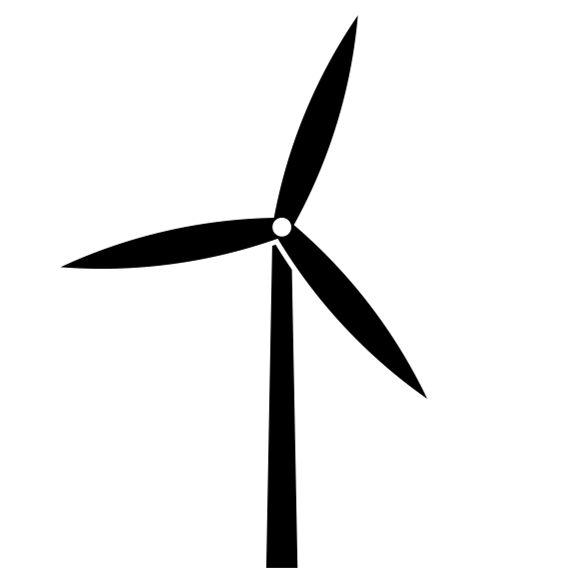
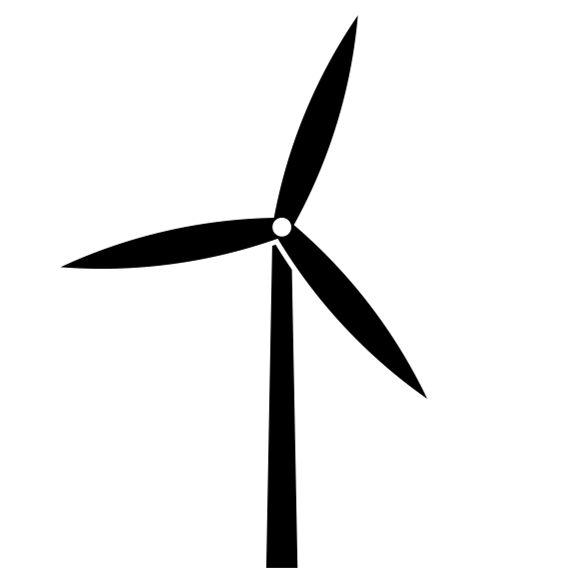
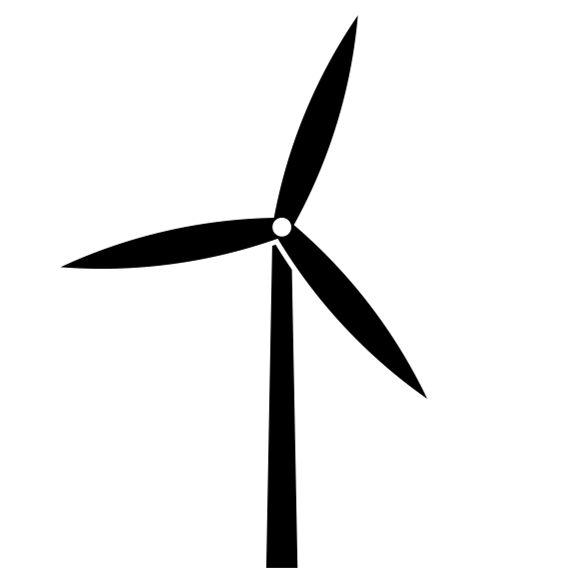
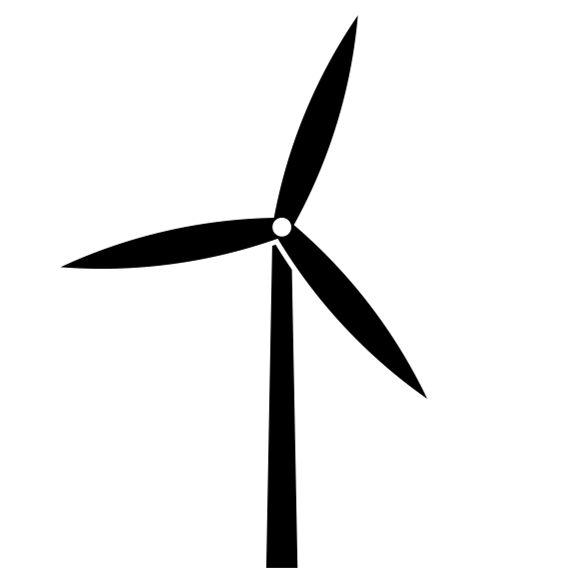
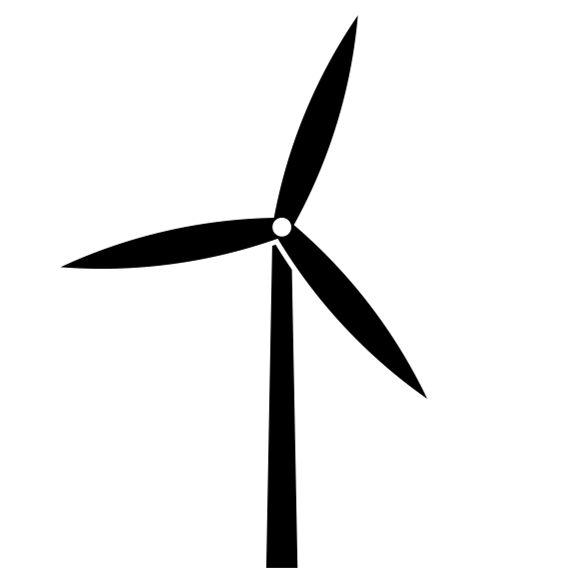
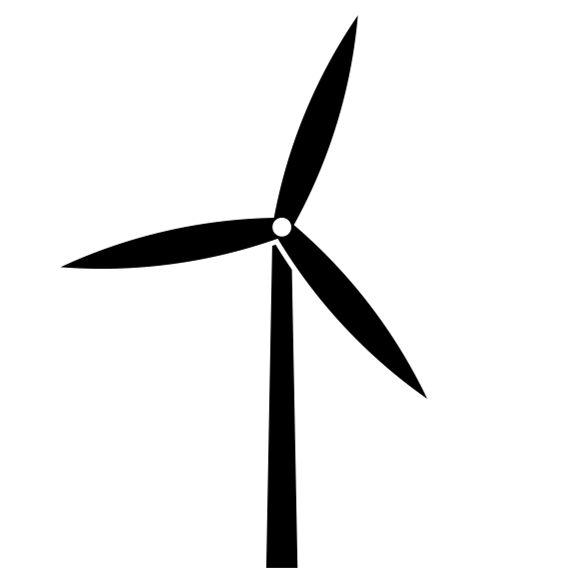
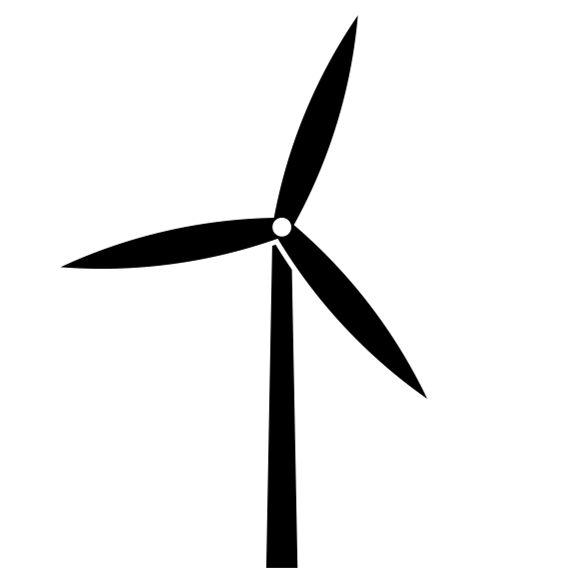
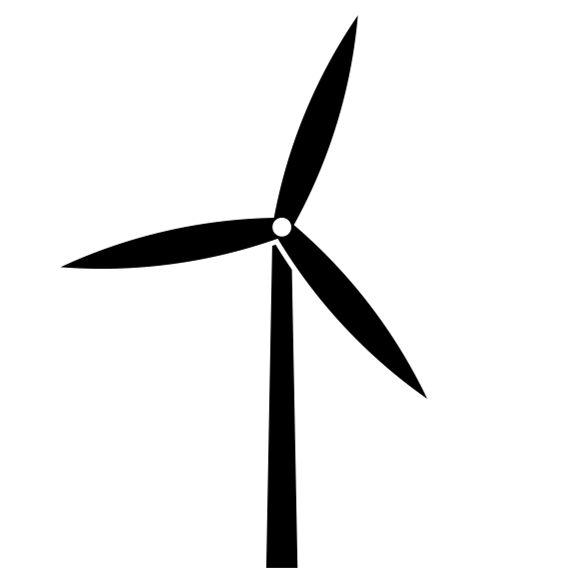
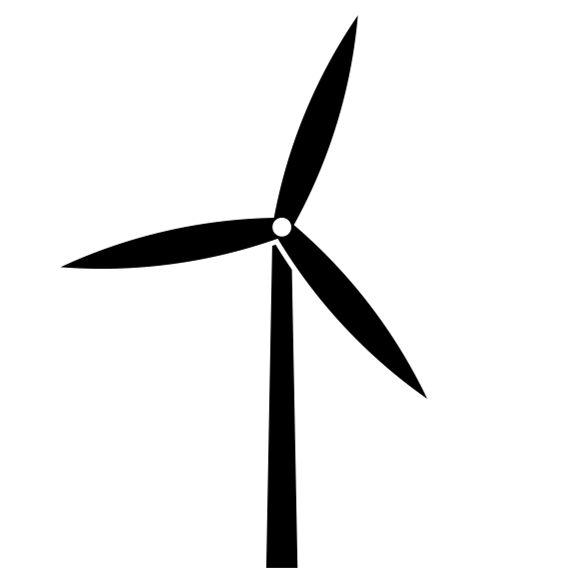
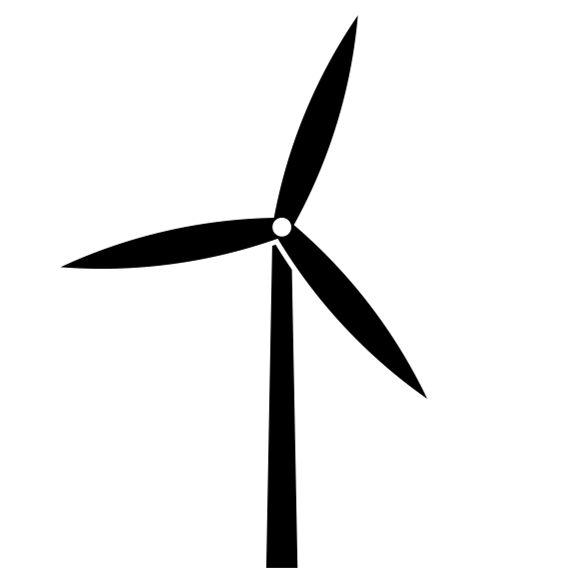
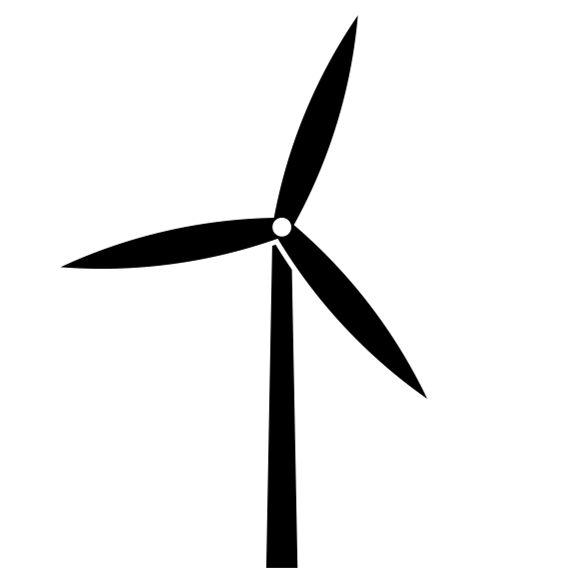
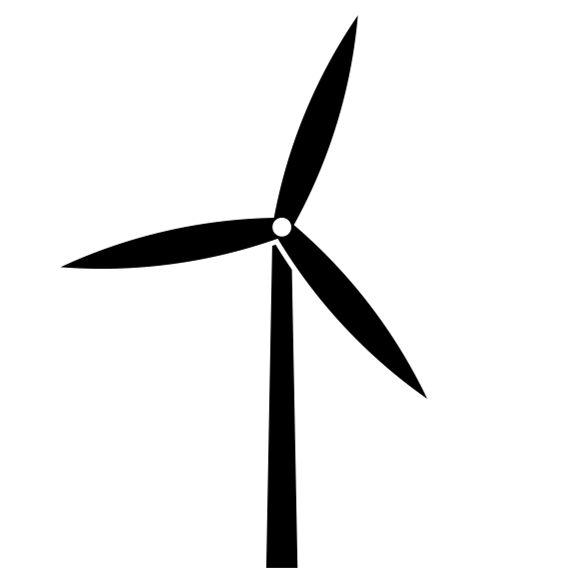
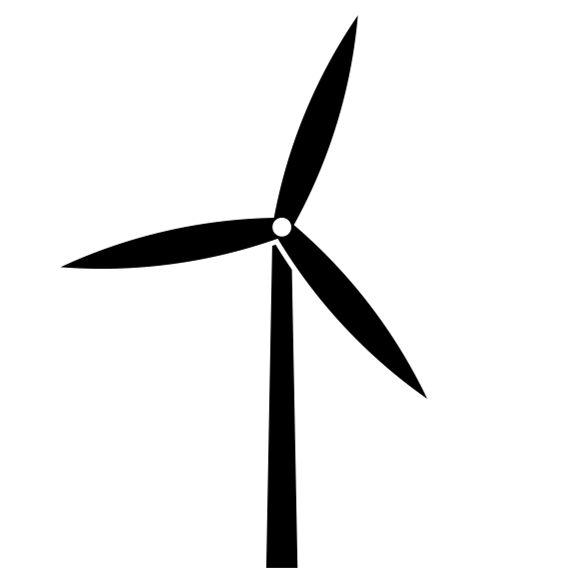
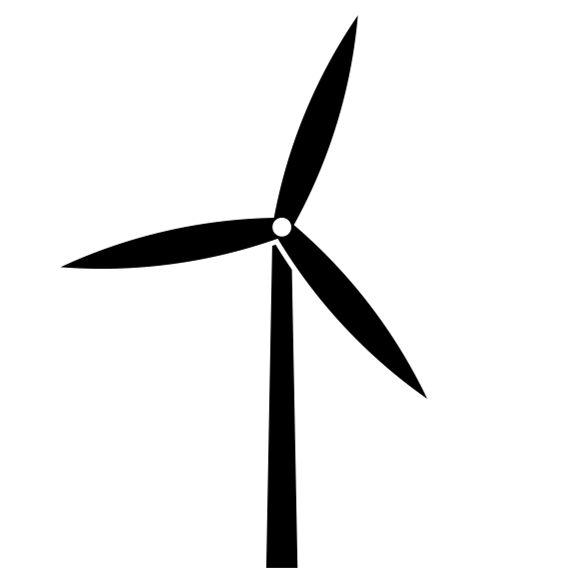
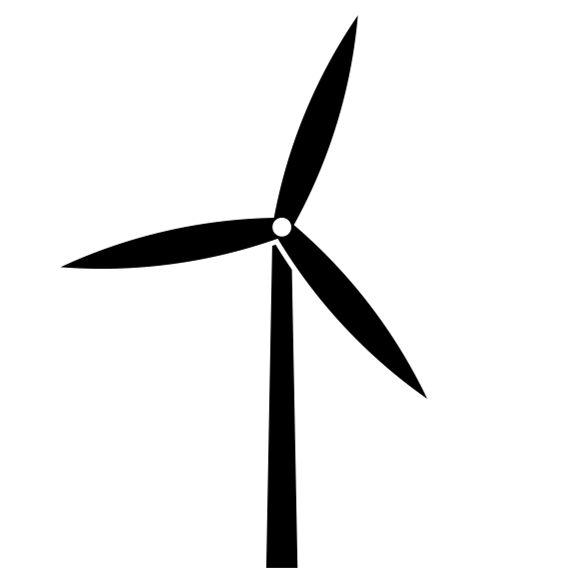
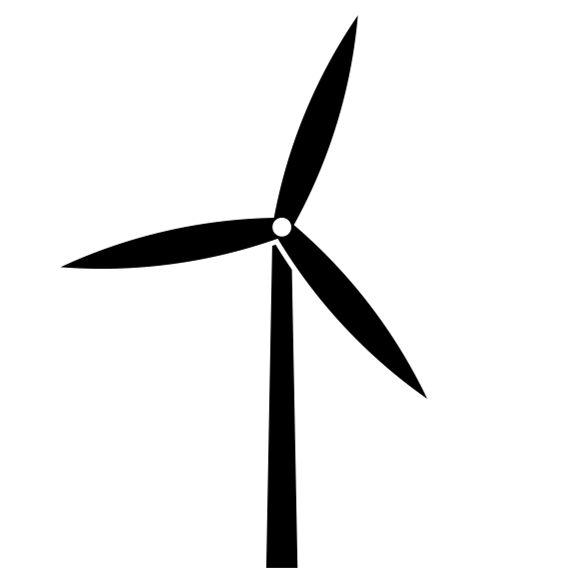
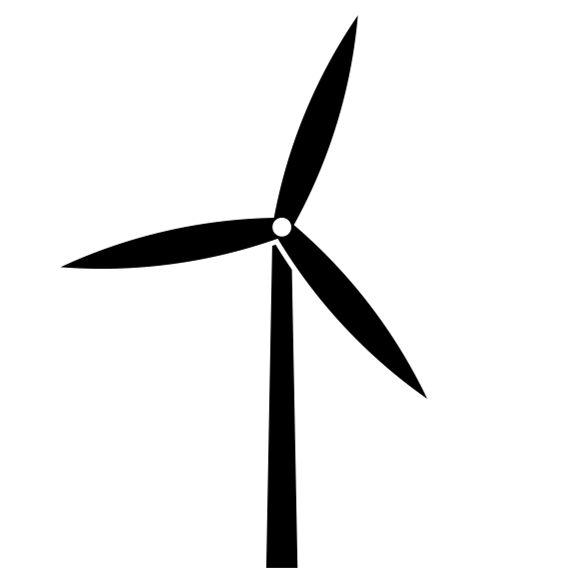
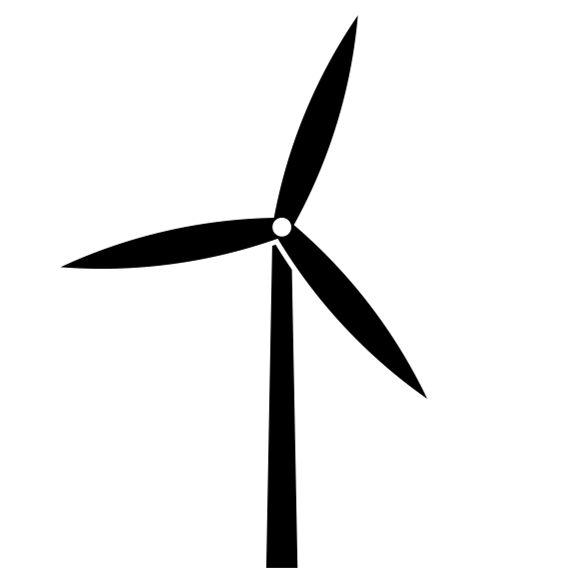
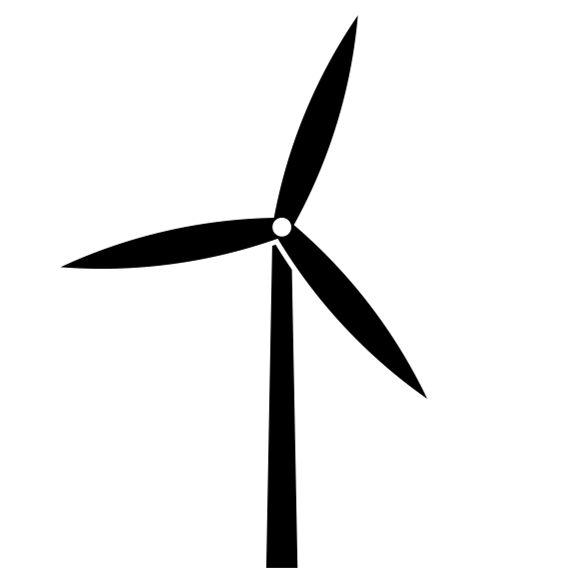
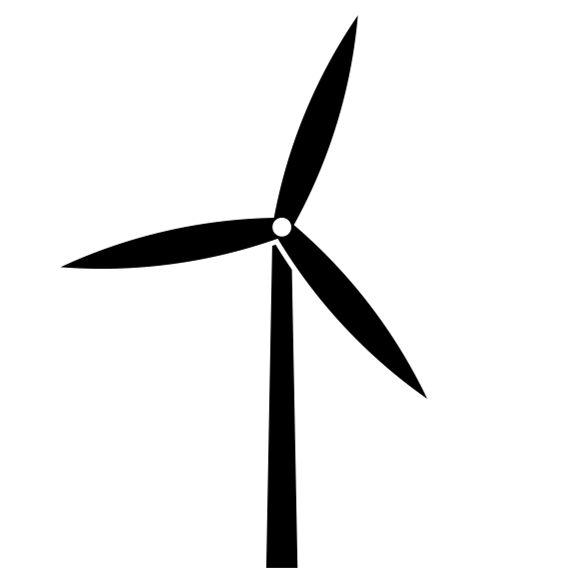
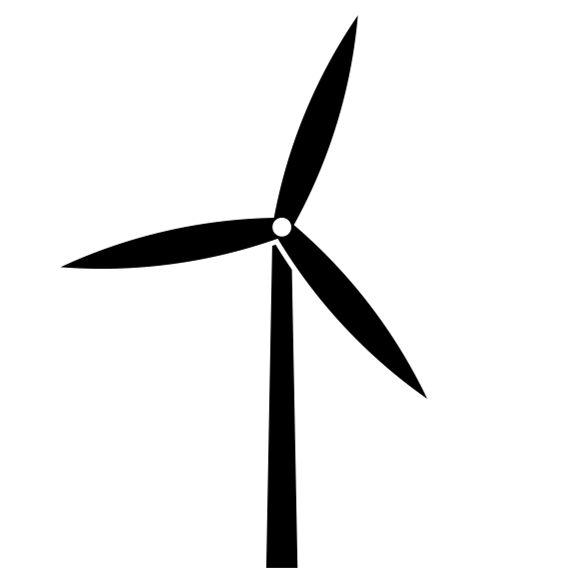
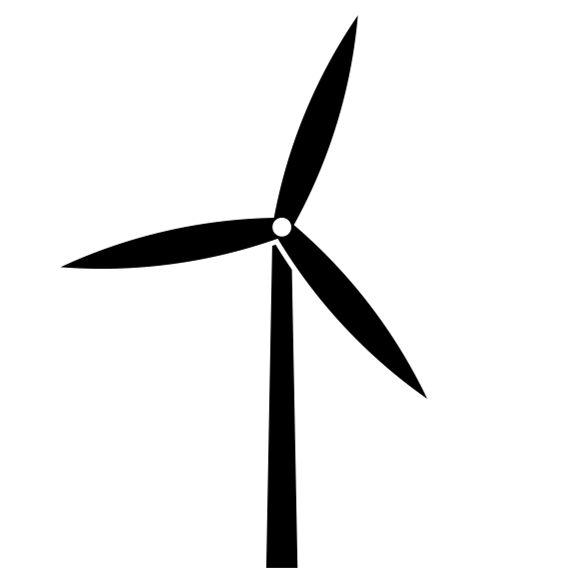
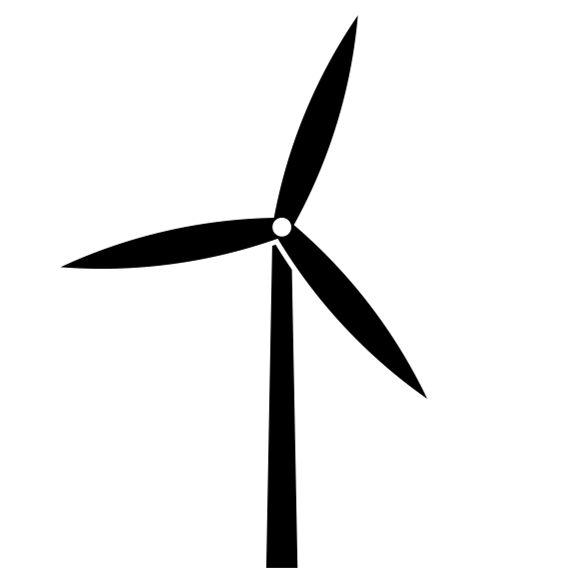
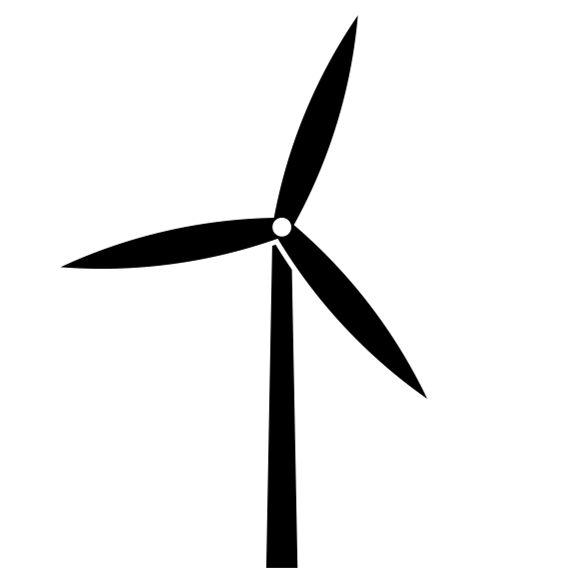
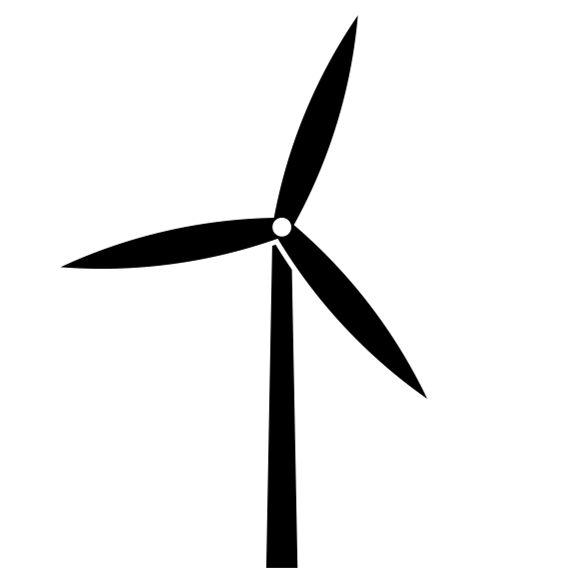
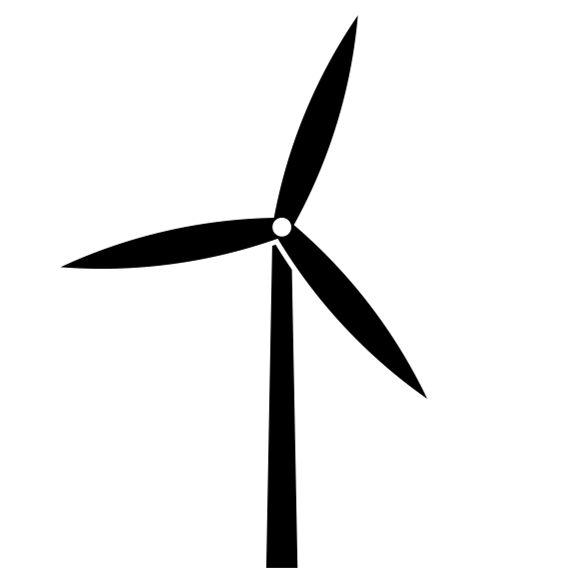
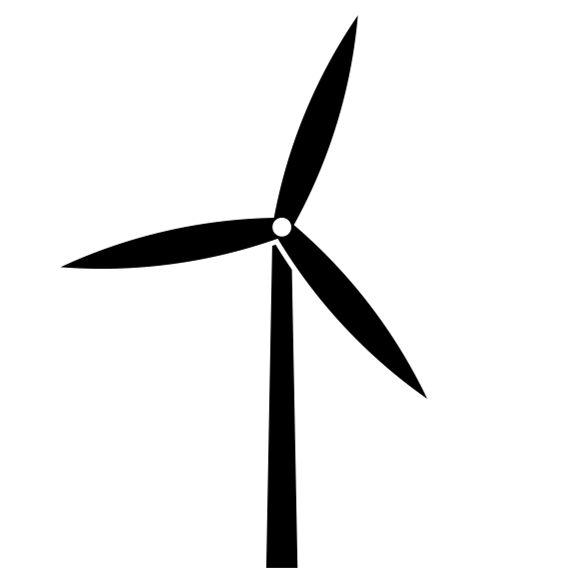
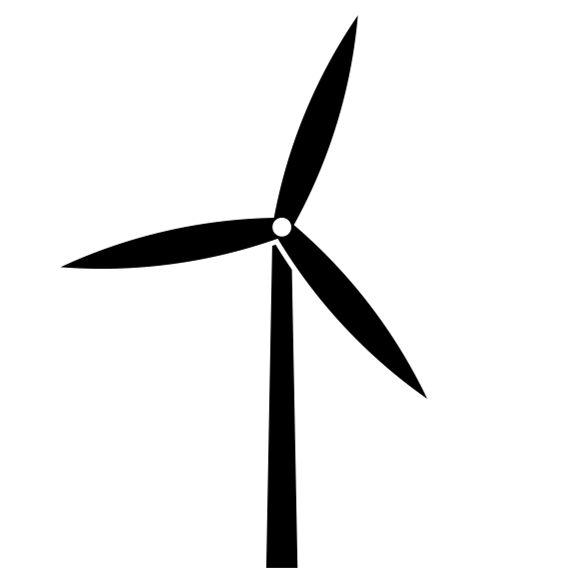
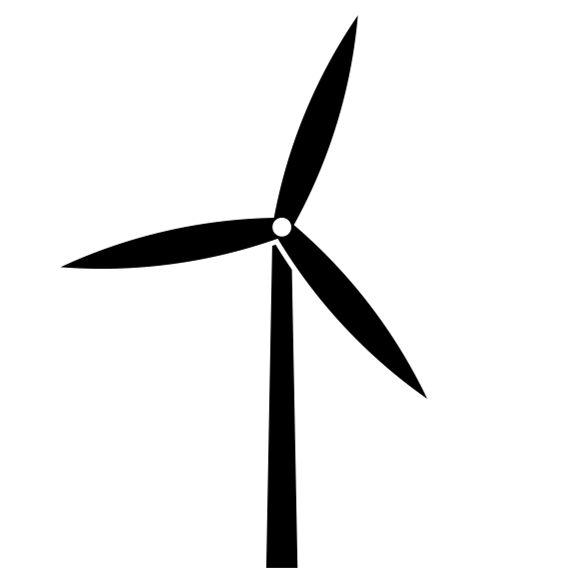
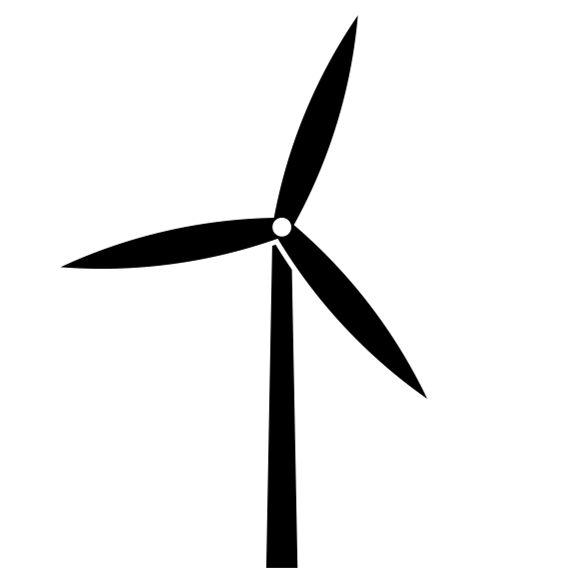
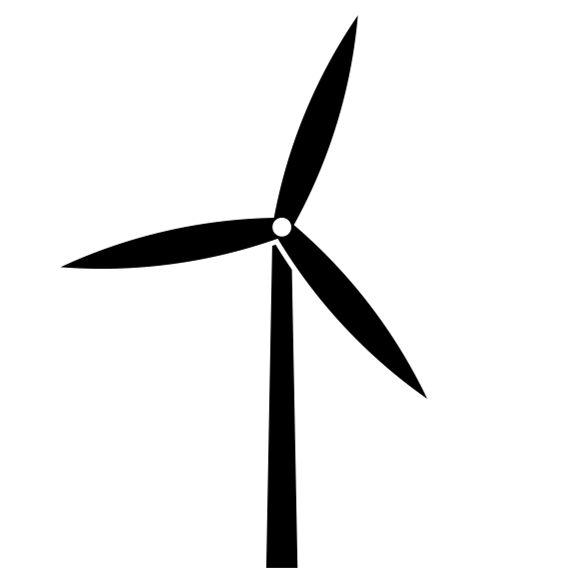
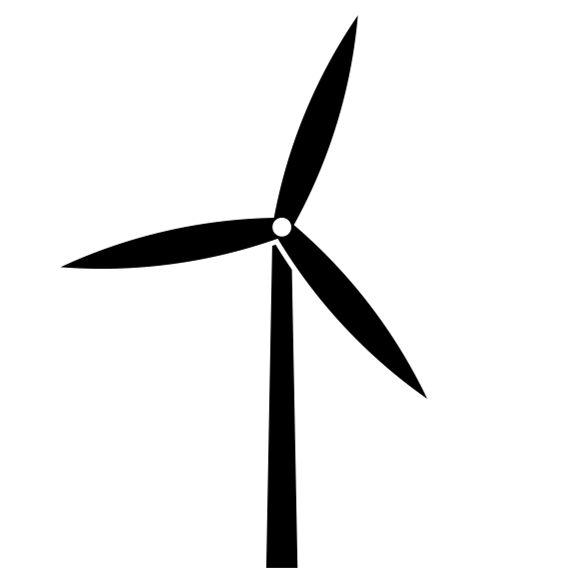
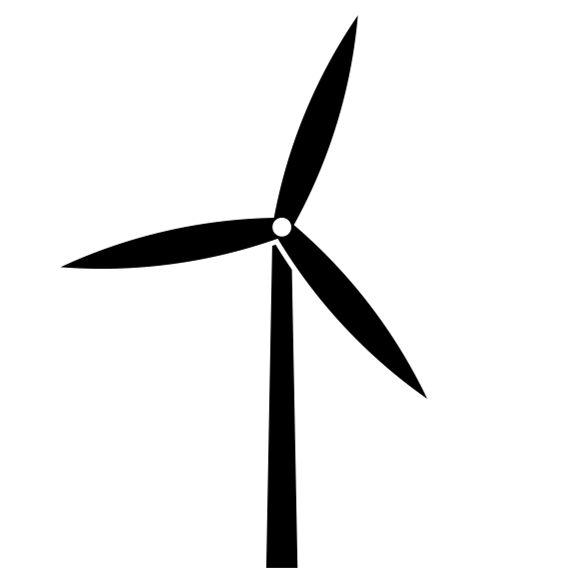
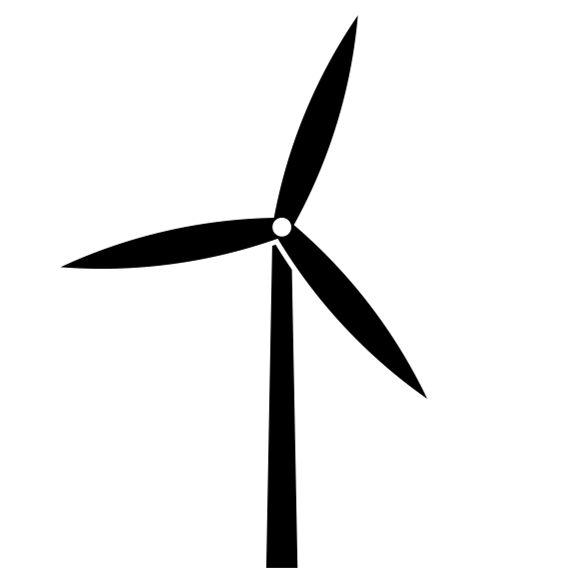
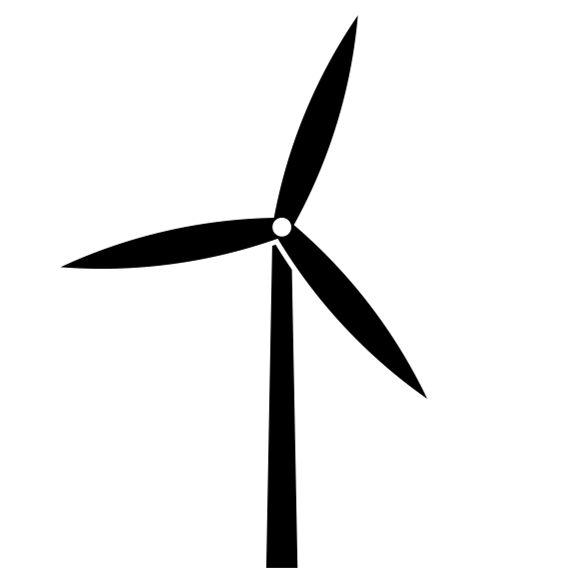
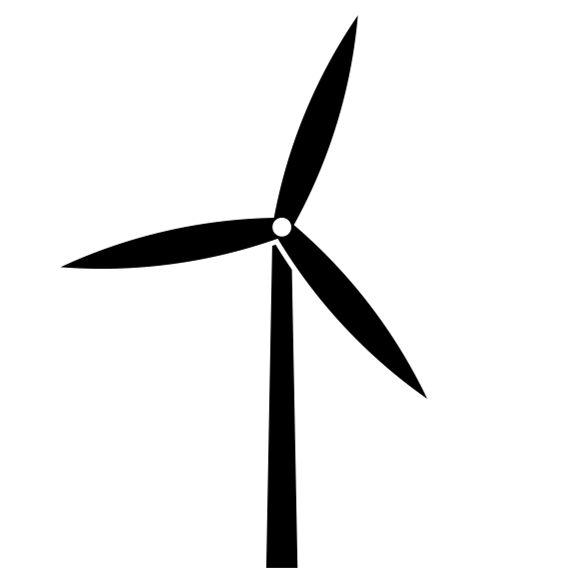
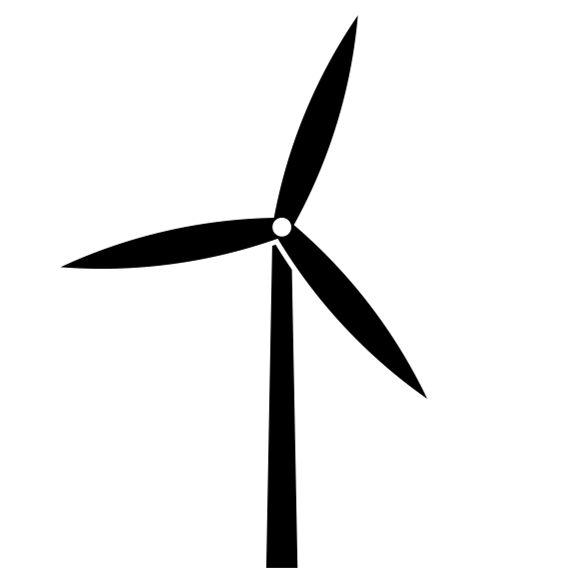
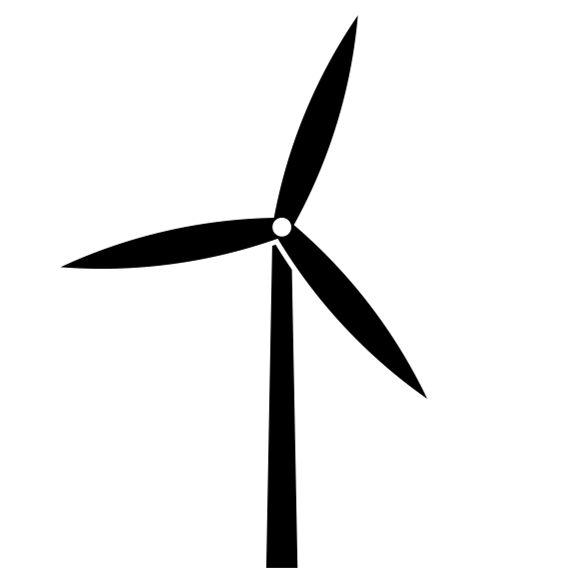
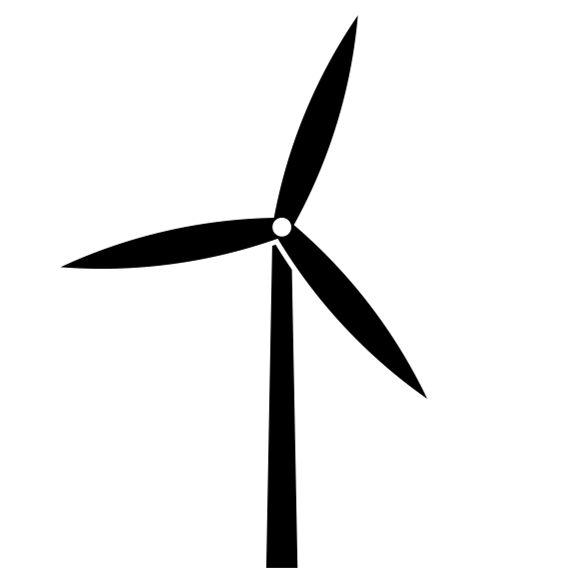
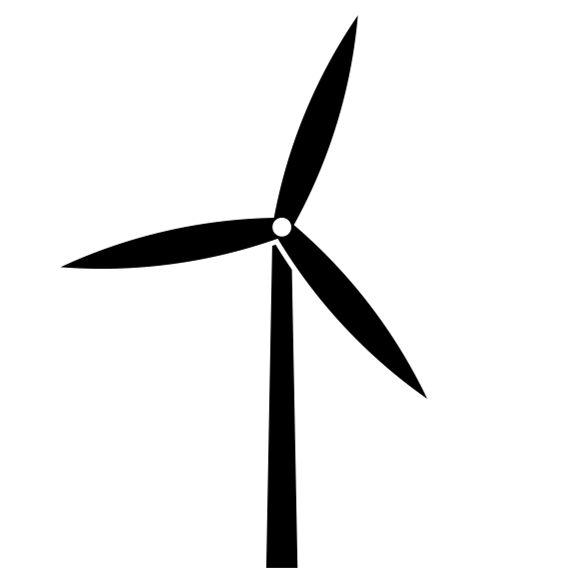
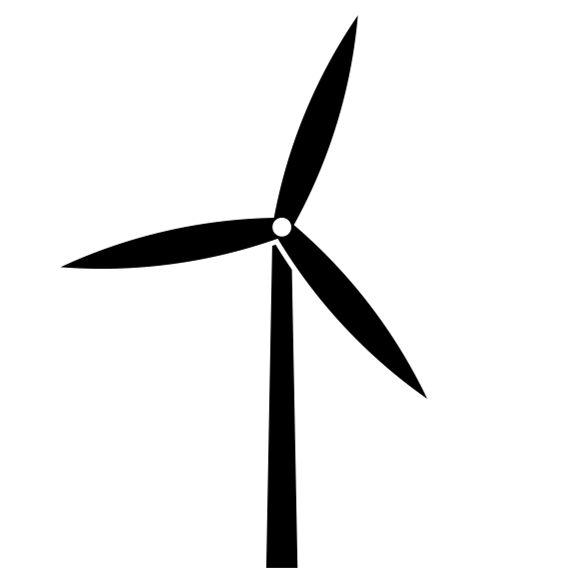
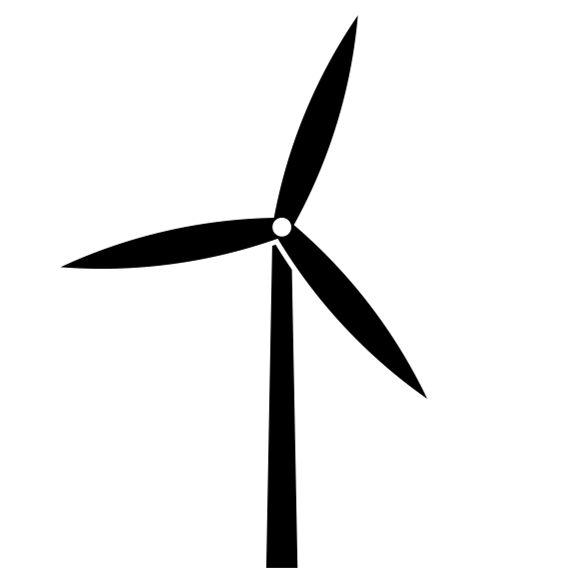
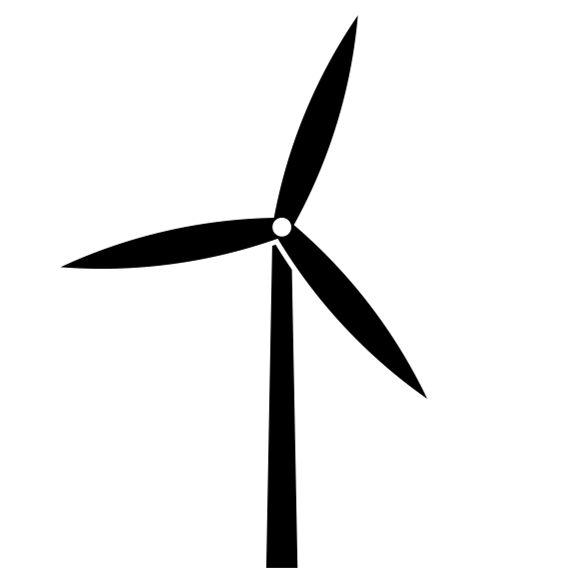
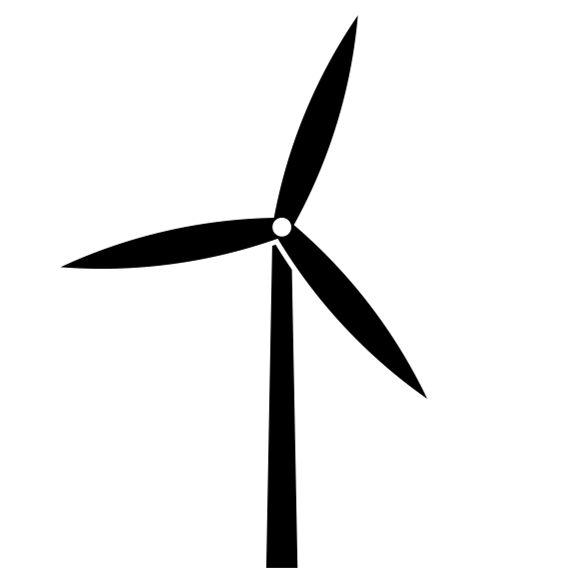

In [6]:
australia_map = folium.Map(location=[-30, 150], zoom_start=4, tiles='CartoDB positron')
icon_path = '../images/wind_turbine.png'

for index, row in df.iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(40, 40))
    folium.Marker(
        [row['Latitude'], 
         row['Longitude']],
         popup=row['Farm Name'],
         icon=icon_image
    ).add_to(australia_map)


css_filter = """
<style>
    .leaflet-tile {
        filter: brightness(80%) saturate(70%);
    }
</style>
"""

australia_map.get_root().html.add_child(folium.Element(css_filter))


australia_map


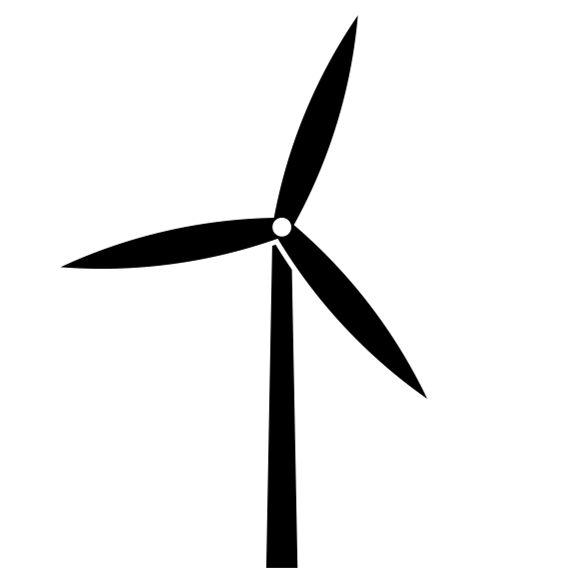
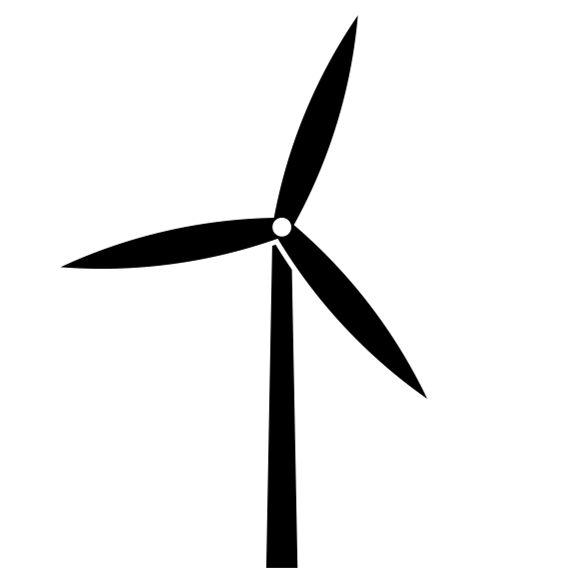
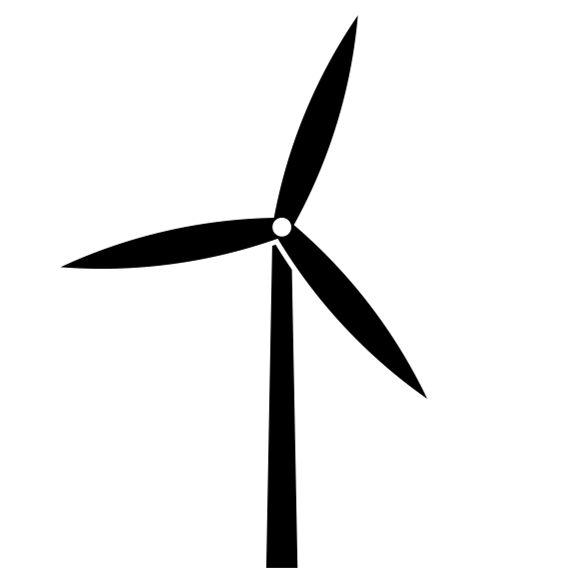
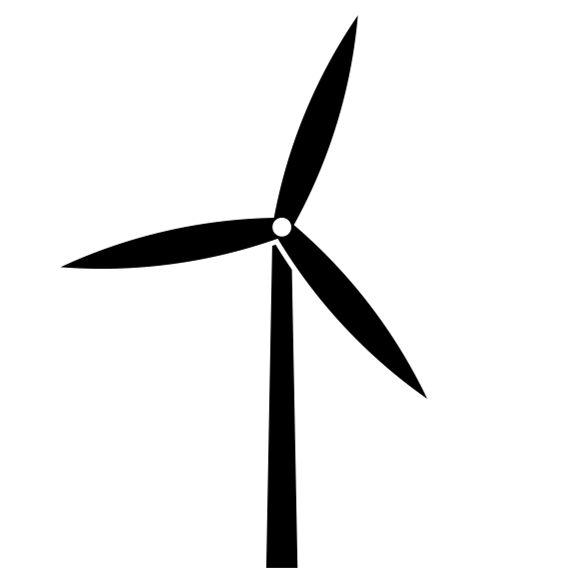
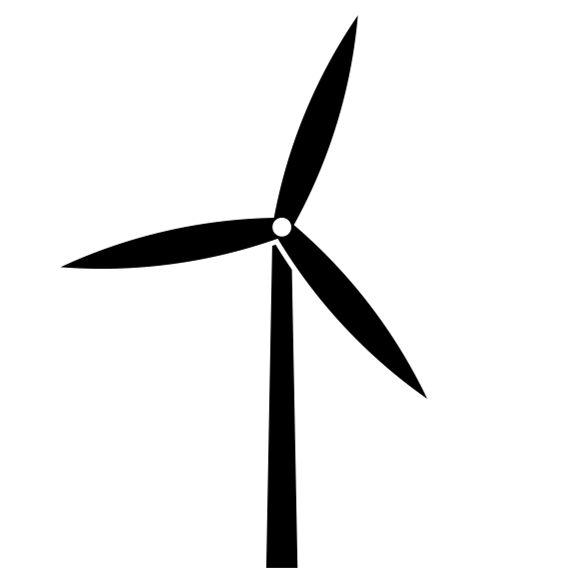

In [71]:
australia_map = folium.Map(location=[-35, 150], zoom_start=5.5, tiles='CartoDB positron')

icon_path = '../images/wind_turbine.png'

farms_explicite = ["DUNDWF1", "DUNDWF2", "DUNDWF3", "SALTCRK1", "MTGELWF1"]

adjusted_coordinates = {
    "DUNDWF1": {"Latitude": -37.855, "Longitude": 142.897},
    "DUNDWF2": {"Latitude": -37.8, "Longitude": 142.8},
    "DUNDWF3": {"Latitude": -37.84, "Longitude": 142.7},
    "SALTCRK1": {"Latitude": -37.945000, "Longitude": 142.630000},
    "MTGELWF1": {"Latitude": -38.259140, "Longitude": 143.801150}
}
for farm in farms_explicite:
    if farm in adjusted_coordinates:
        df.loc[df['Abbreviation'] == farm, 'Latitude'] = adjusted_coordinates[farm]['Latitude']
        df.loc[df['Abbreviation'] == farm, 'Longitude'] = adjusted_coordinates[farm]['Longitude']

for index, row in df[df['Abbreviation'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(70, 70))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)

australia_map


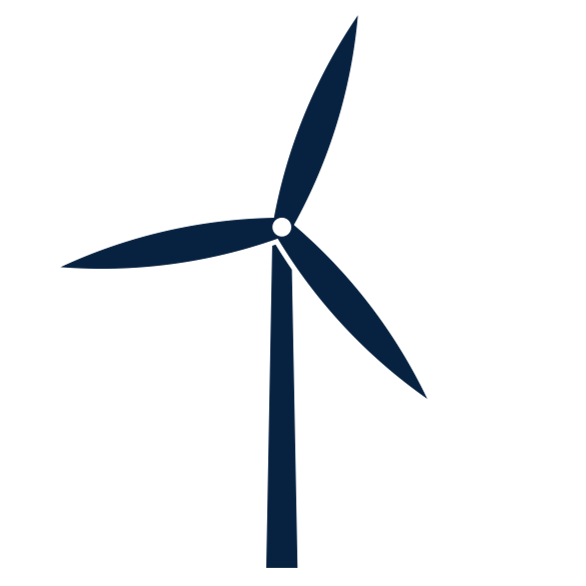
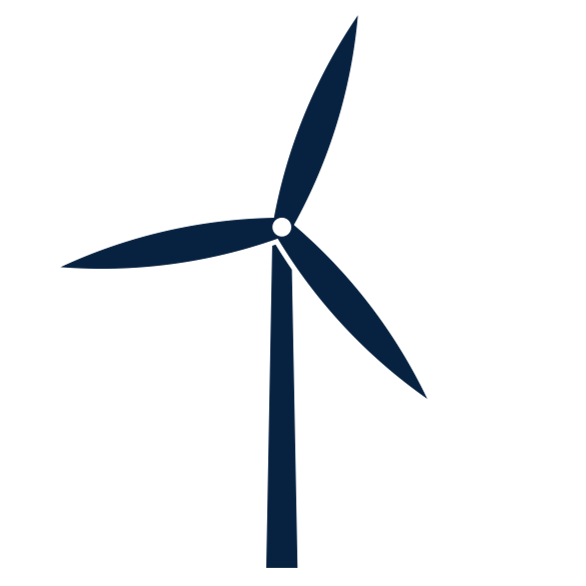
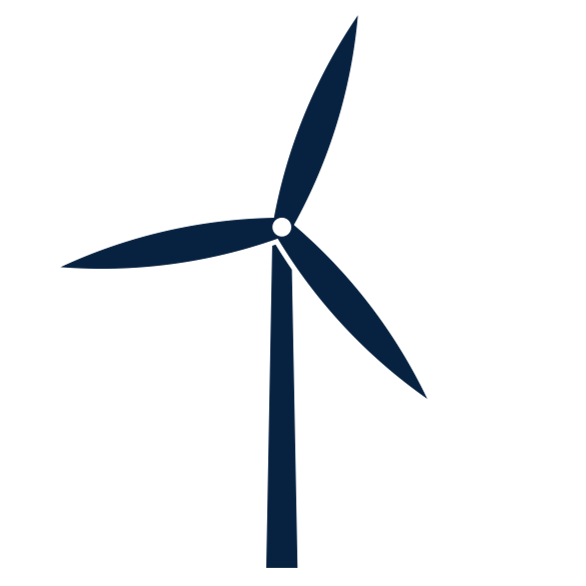
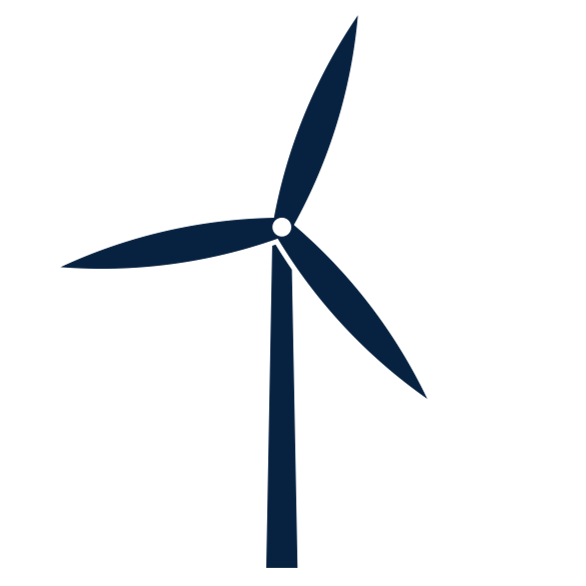
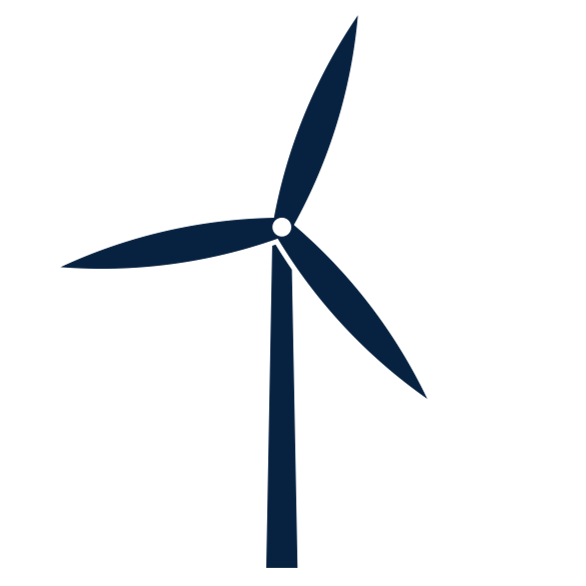
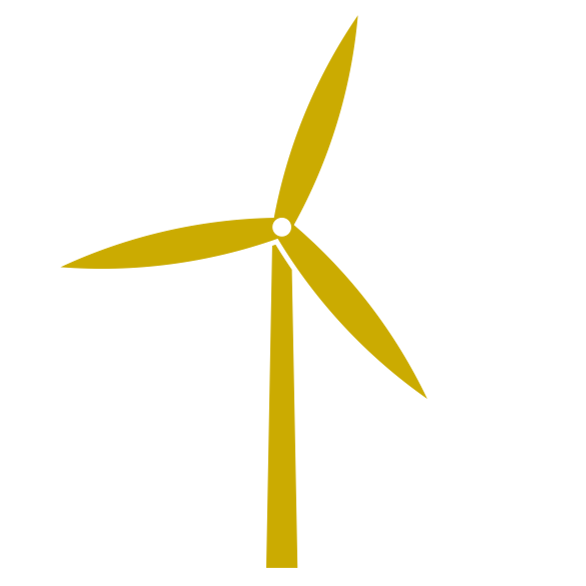
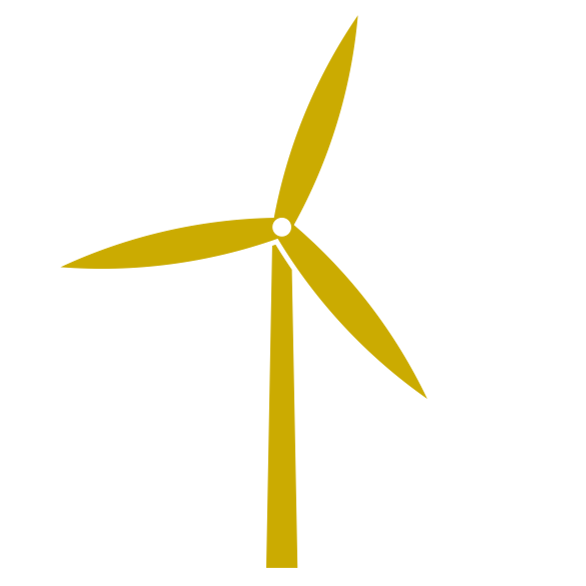
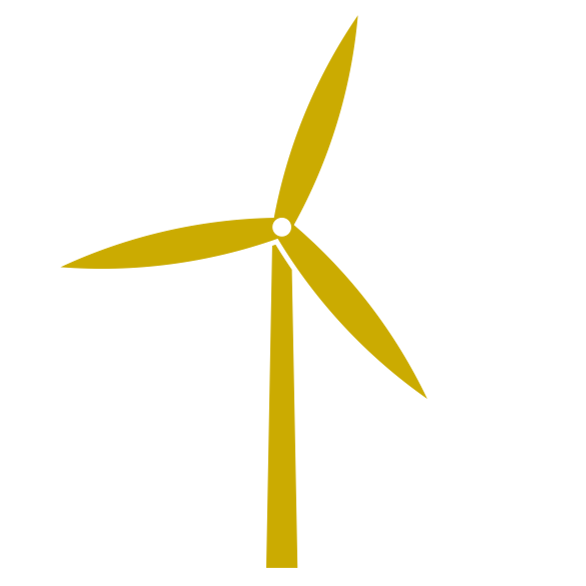
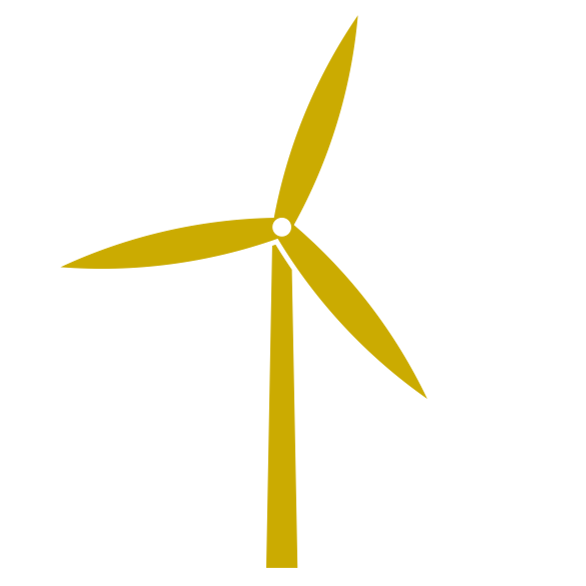
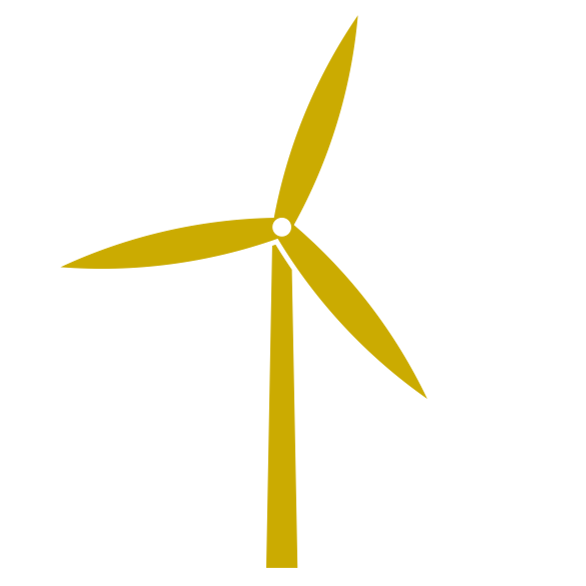
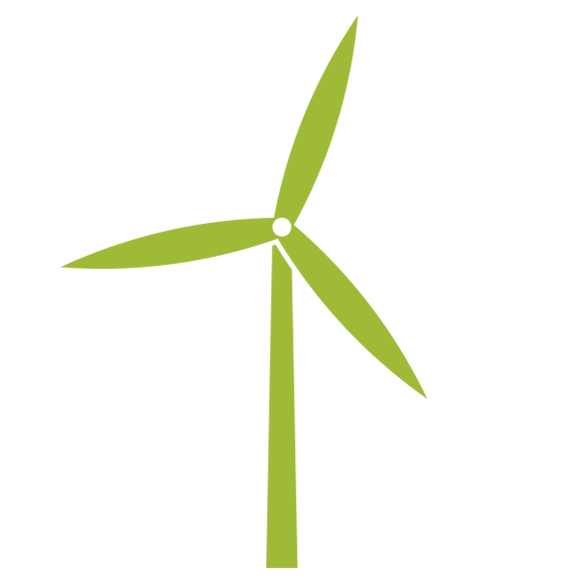
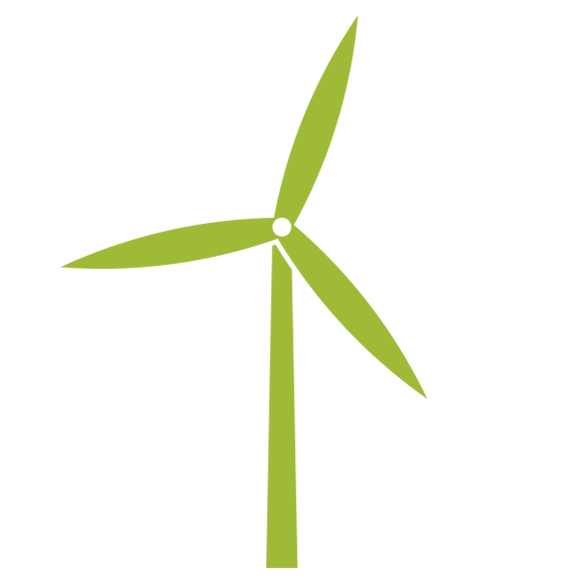
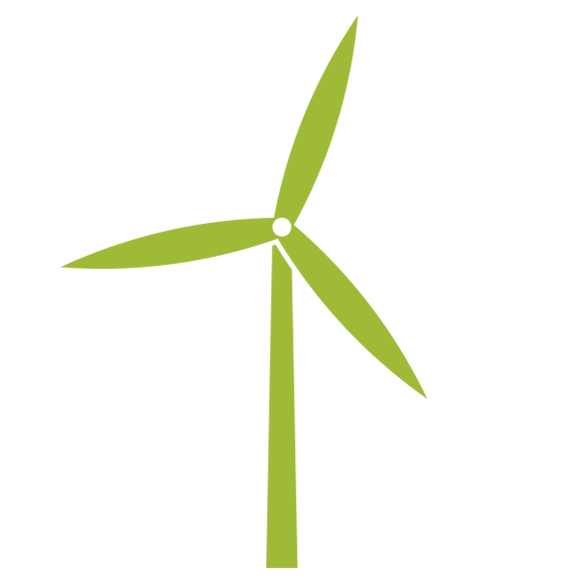
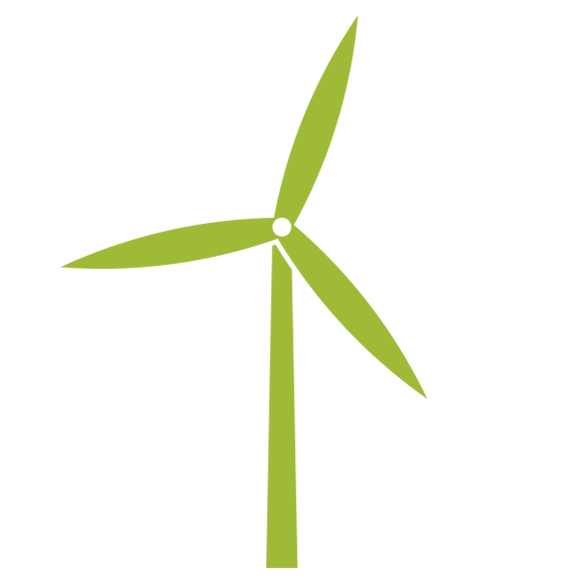
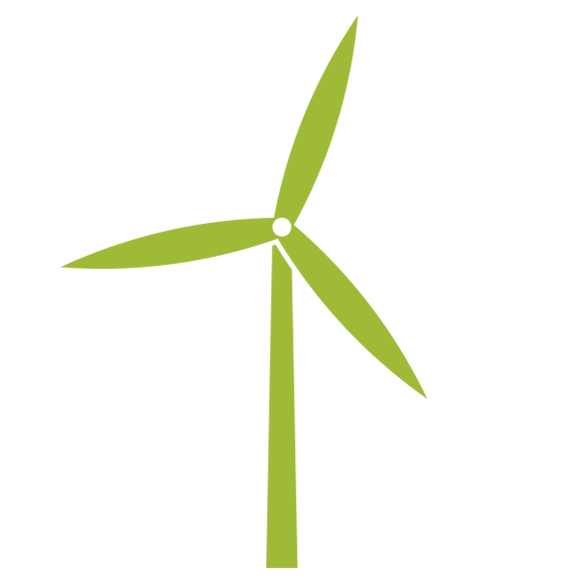

In [112]:
australia_map = folium.Map(location=[-37.8, 143.13], zoom_start=9, tiles='CartoDB positron')

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-blue-dark.png'

farms_explicite = ['Macarthur Wind Farm',
        'Mortons Lane Wind Farm',
        'Oaklands Hill Wind Farm',
        'Salt Creek Wind Farm',
        'Mortlake South Wind Farm']

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-yellow-dark.png'

farms_explicite = ['Mt Mercer Wind Farm',
        'Elaine Wind Farm',
        'Yendon Wind Farm',
        'Moorabool Wind Farm',
        'Yaloak South Wind Farm'
]

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
    
icon_path = '../images/wind_turbines_icons/turbine_icon_tum-green.png'

farms_explicite = [
        'Bulgana Green Power Hub',
        'Crowlands Wind Farm',
        'Challicum Hills Wind Farm',
        'Ararat Wind Farm',
        'Waubra Wind Farm']

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
    

australia_map


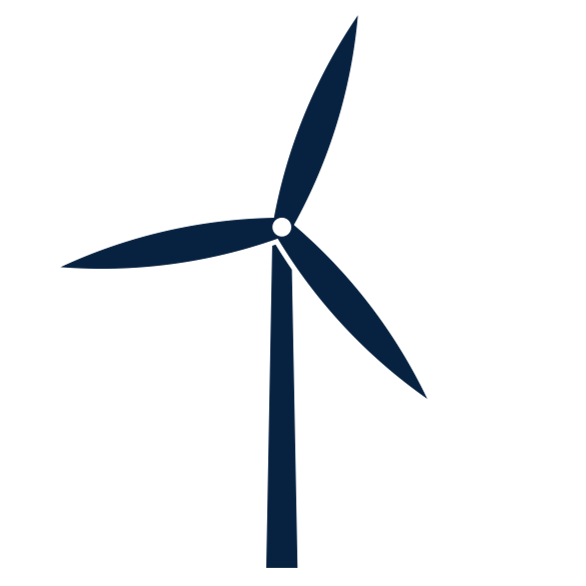
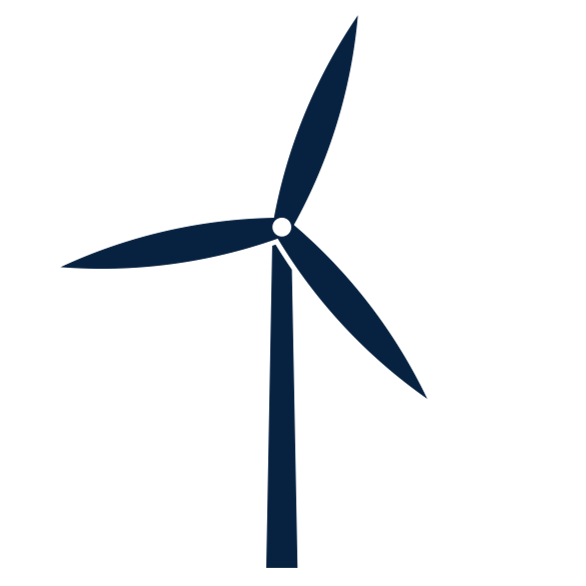
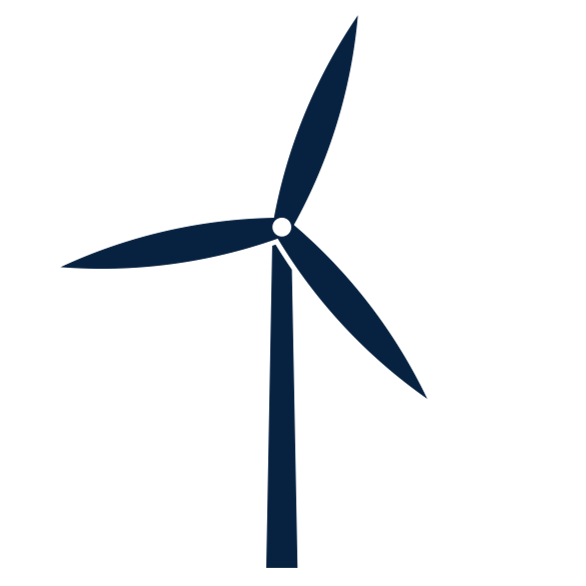
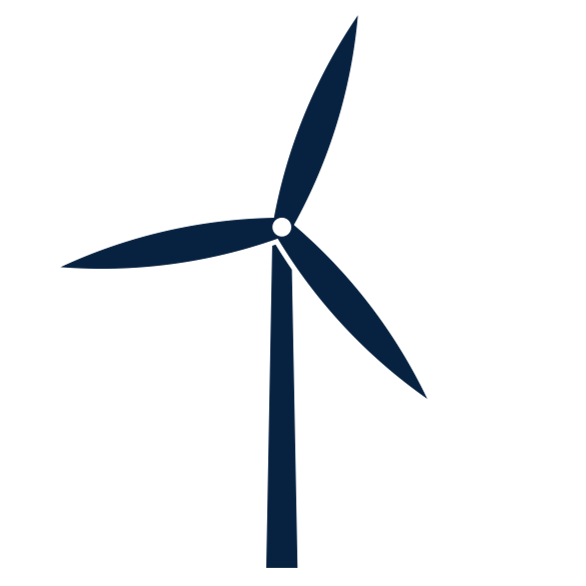
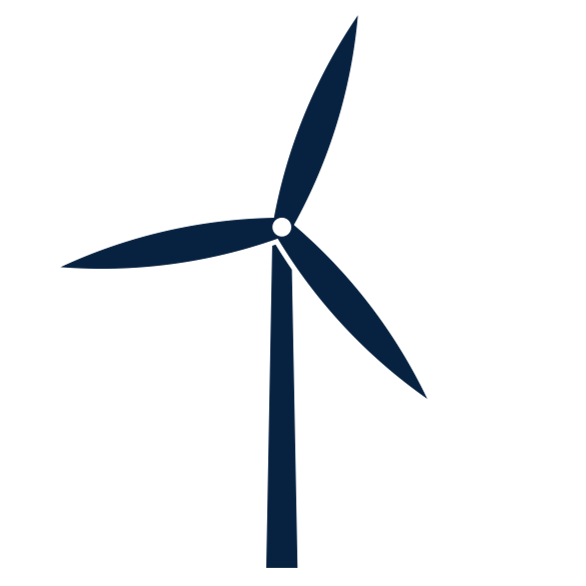
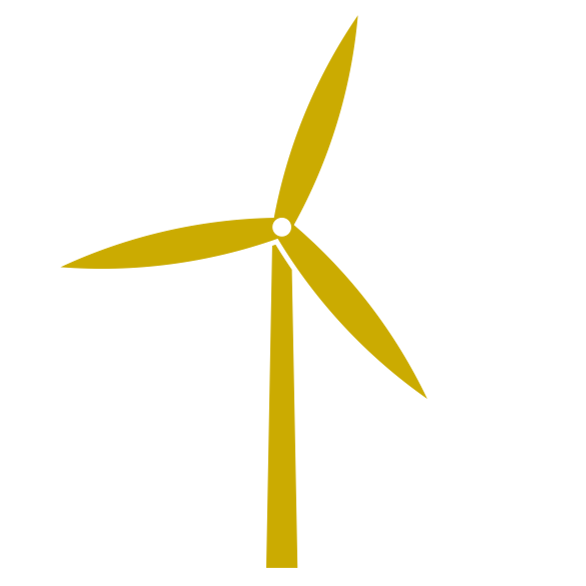
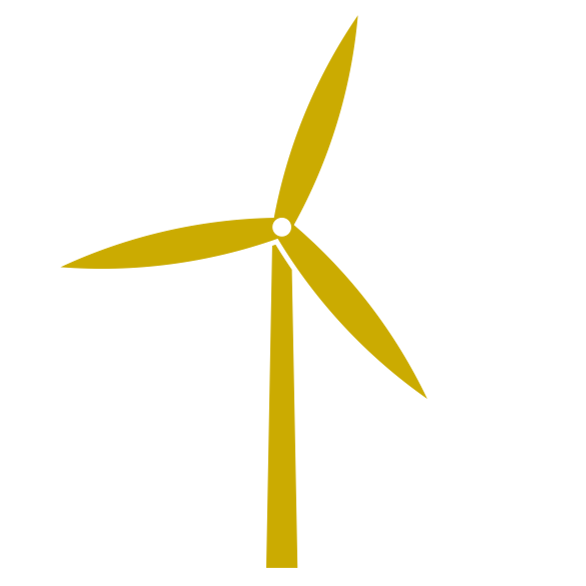
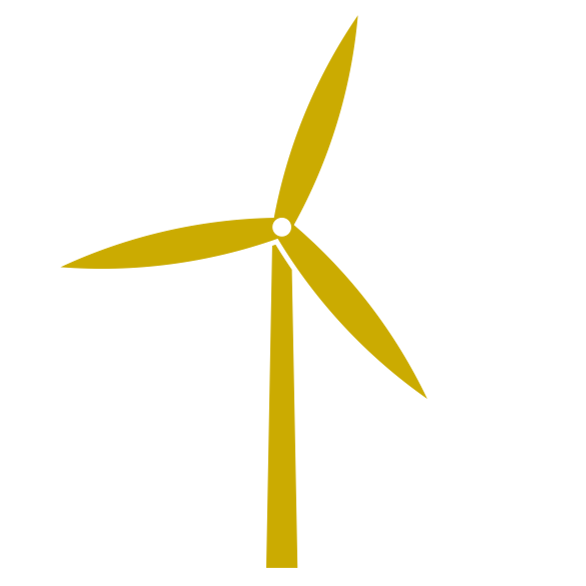
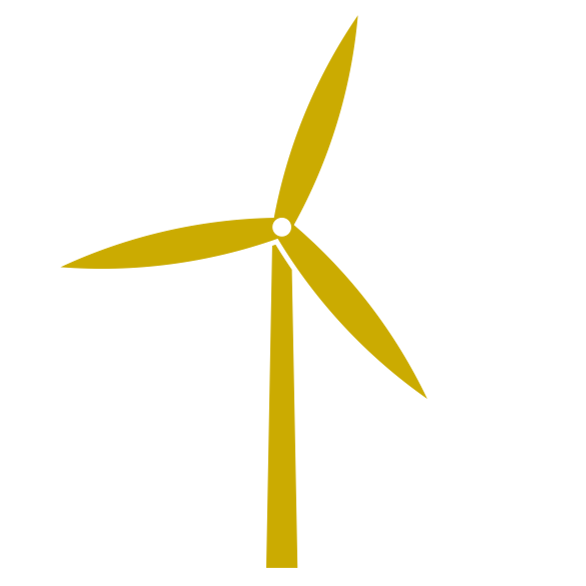
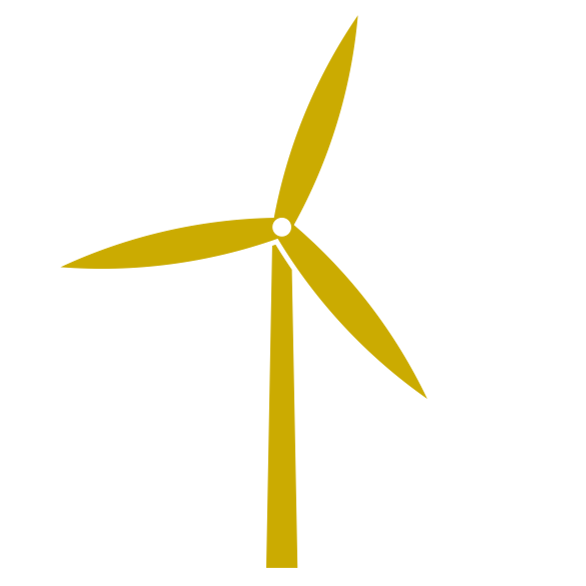
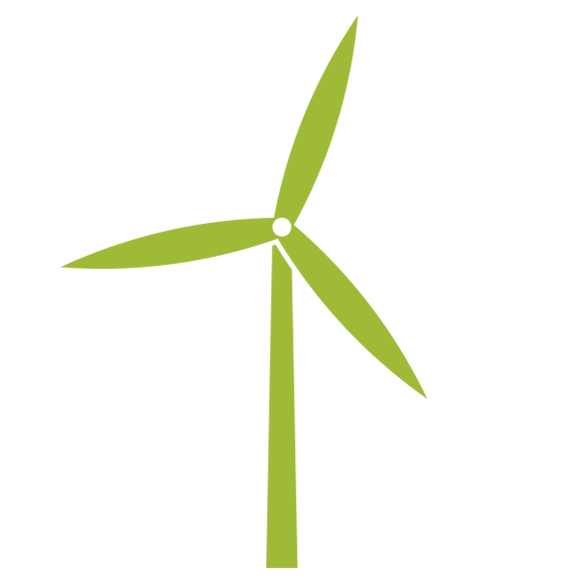
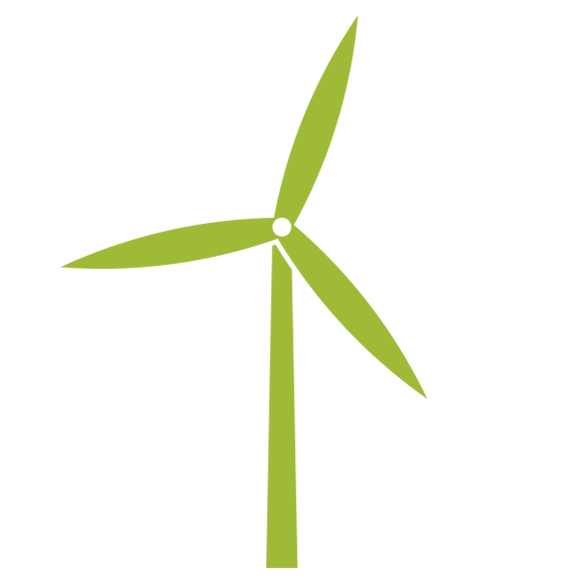
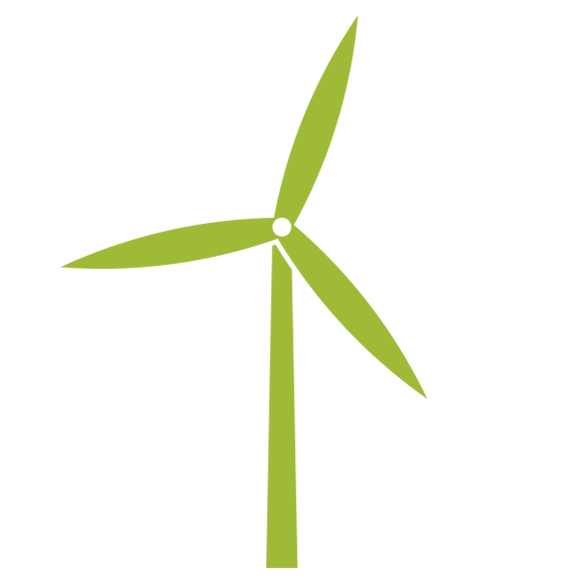
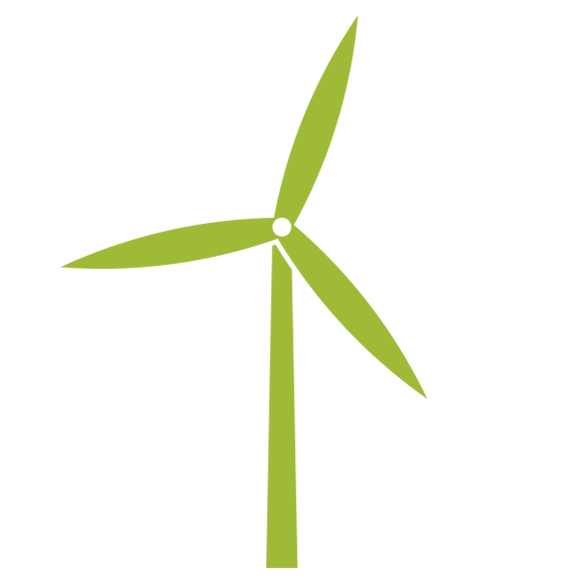
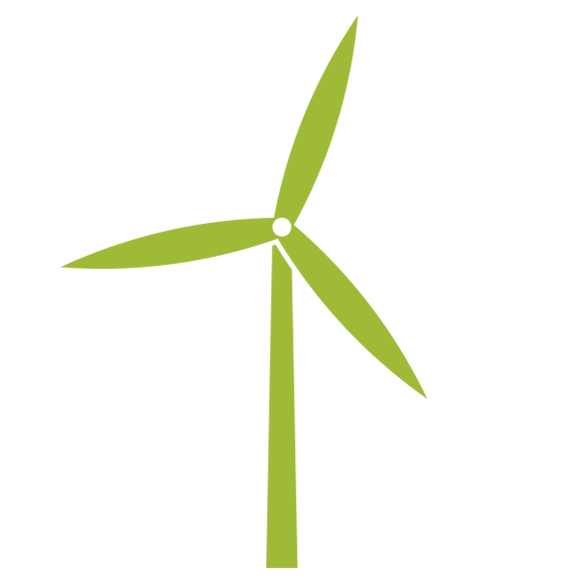

In [99]:
australia_map = folium.Map(location=[-37.8, 143.13], zoom_start=9, tiles='CartoDB positron')

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-blue-dark.png'

farms_explicite = ['Waubra Wind Farm',
        'Oaklands Hill Wind Farm',
        'Salt Creek Wind Farm',
        'Yendon Wind Farm',
        'Moorabool Wind Farm']

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-yellow-dark.png'

farms_explicite = ['Mortlake South Wind Farm',
        'Yaloak South Wind Farm',
        'Bulgana Green Power Hub',
        'Ararat Wind Farm',
        'Challicum Hills Wind Farm'
]

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
    
icon_path = '../images/wind_turbines_icons/turbine_icon_tum-green.png'

farms_explicite = [
        'Crowlands Wind Farm',
        'Elaine Wind Farm',
        'Macarthur Wind Farm',
        'Mortons Lane Wind Farm',
        'Mt Mercer Wind Farm']

for index, row in df[df['Farm Name'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
australia_map

In [74]:
import pandas as pd

farms_of_interest = [
    'Macarthur Wind Farm', 'Mortons Lane Wind Farm', 'Oaklands Hill Wind Farm', 
    'Salt Creek Wind Farm', 'Mortlake South Wind Farm', 'Mt Mercer Wind Farm', 
    'Elaine Wind Farm', 'Yendon Wind Farm', 'Moorabool Wind Farm', 'Yaloak South Wind Farm', 
    'Bulgana Green Power Hub', 'Crowlands Wind Farm', 'Challicum Hills Wind Farm', 
    'Ararat Wind Farm', 'Waubra Wind Farm'
]
excel_file_path = '../data/wind_farm_data/locations_wind_farms.xlsx'
filtered_df = df[df['Farm Name'].isin(farms_of_interest)]
abbreviations = filtered_df[['Abbreviation', 'Farm Name']]
abbreviation_list = abbreviations['Abbreviation'].tolist()

def load_and_concatenate_datasets(train_filepath, test_filepath):
    train_df = pd.read_parquet(train_filepath)
    test_df = pd.read_parquet(test_filepath)
    train_df['Dataset'] = 'Train'
    test_df['Dataset'] = 'Test'
    return pd.concat([train_df, test_df], ignore_index=True)

train_filepath = '../data/wind_farm_data/wind_data_train.parquet'
test_filepath = '../data/wind_farm_data/wind_data_test.parquet'
data = load_and_concatenate_datasets(train_filepath, test_filepath)
data = data.drop(['SETTLEMENTDATE', 'Dataset'], axis=1)
max_values = data.max()
filtered_max_values = max_values[abbreviation_list]
sorted_max_values = filtered_max_values.sort_values(ascending=False)
print(sorted_max_values)

MACARTH1    426.460020
MOORAWF1    306.750000
ARWF1       237.000000
BULGANA1    204.560000
WAUBRAWF    186.979004
MRTLSWF1    145.640000
YENDWF1     142.980010
MERCER01    130.771000
ELAINWF1     83.600000
CROWLWF1     81.625090
OAKLAND1     67.100000
CHALLHWF     57.999897
SALTCRK1     53.390000
YSWF1        29.200001
MLWF1        20.084999
dtype: float64



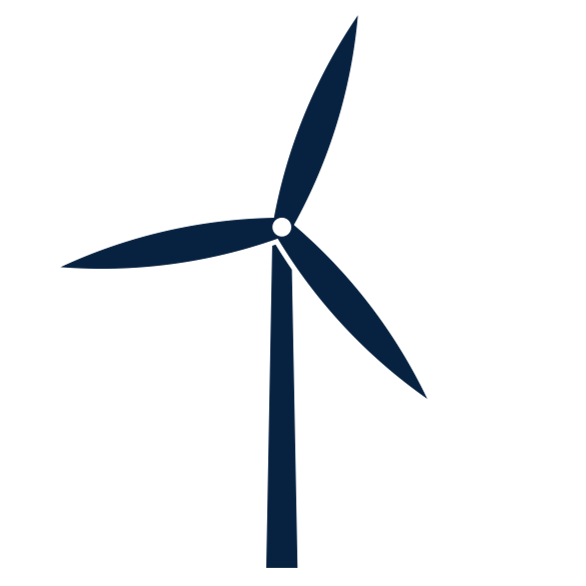
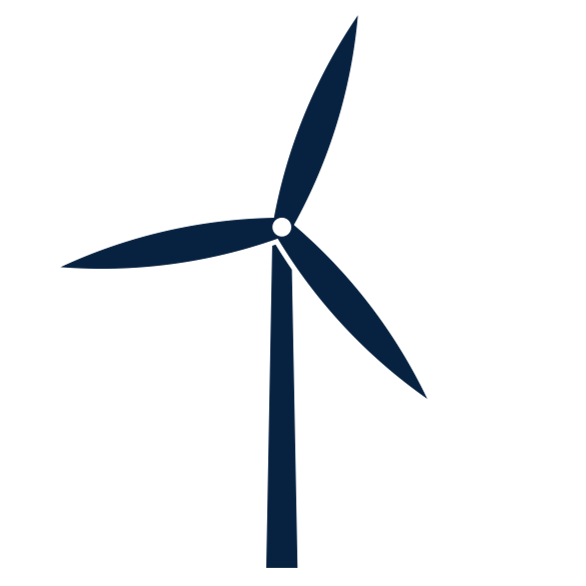
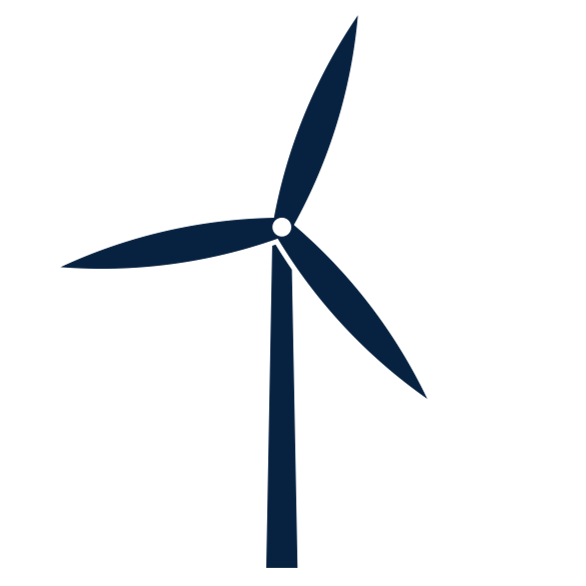
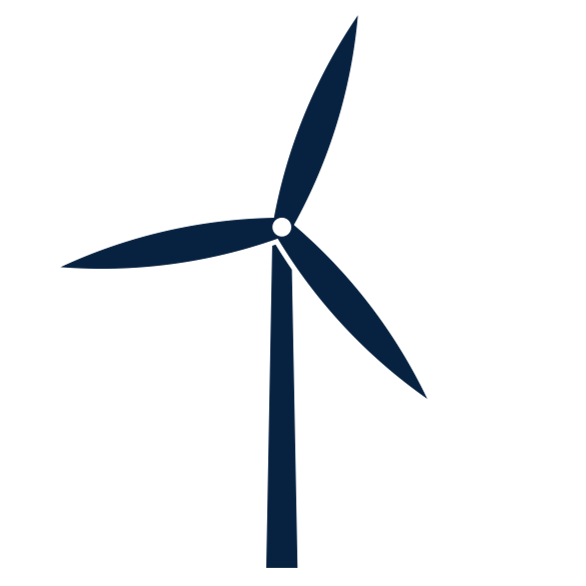
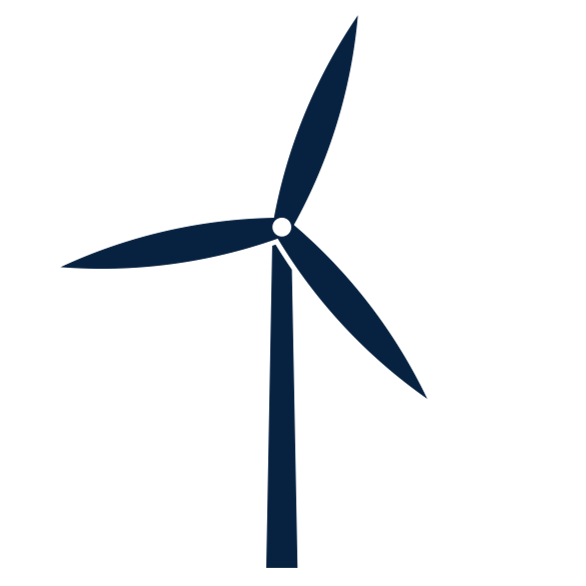
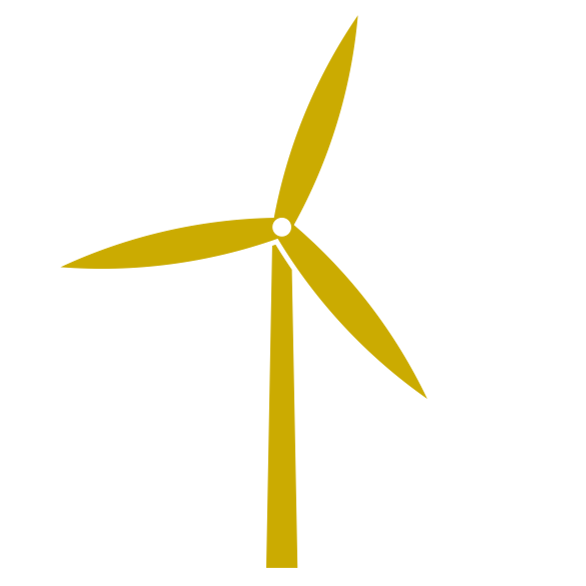
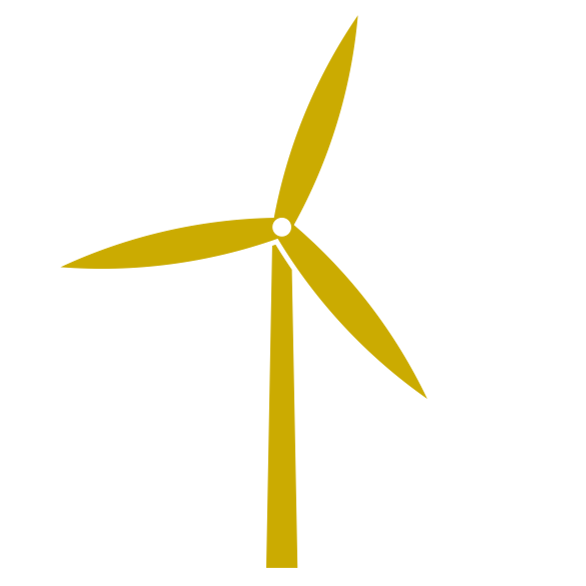
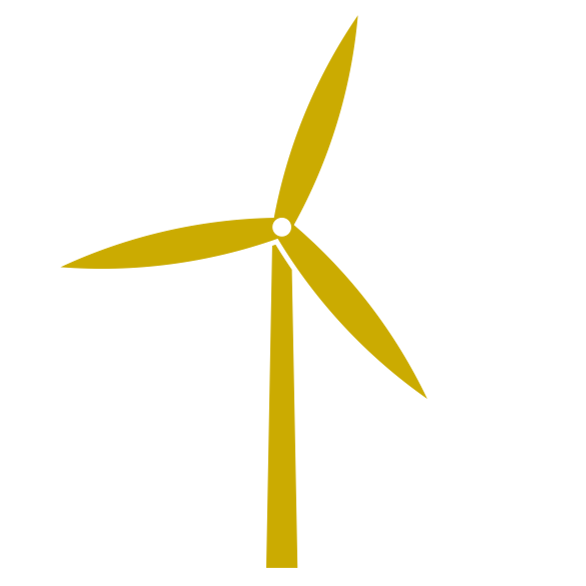
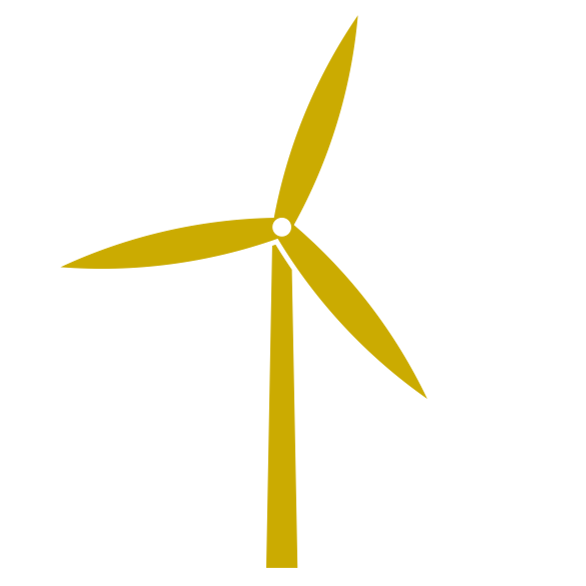
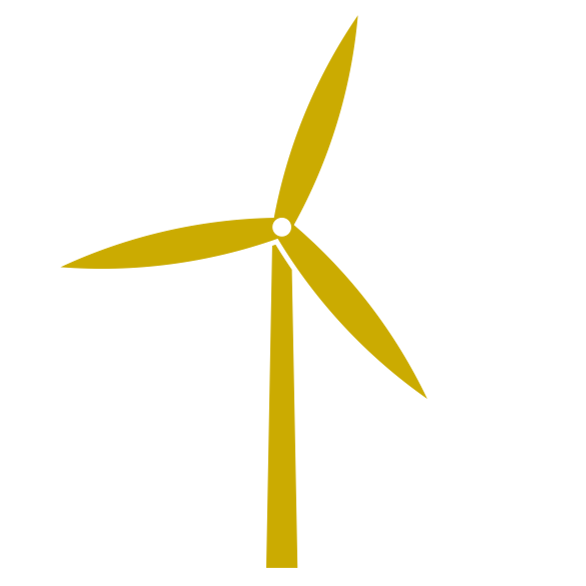
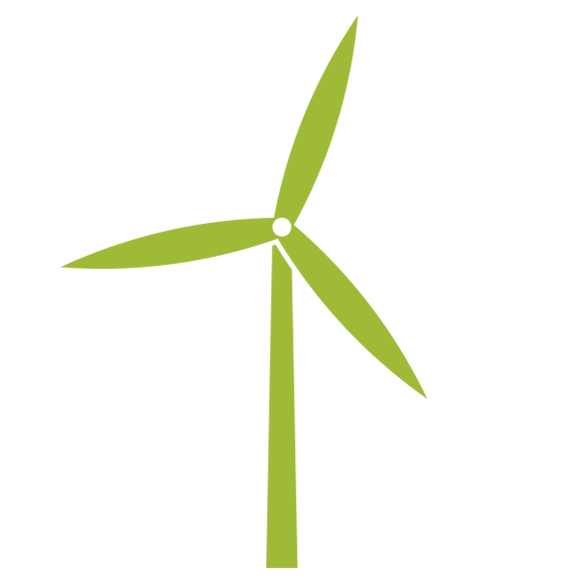
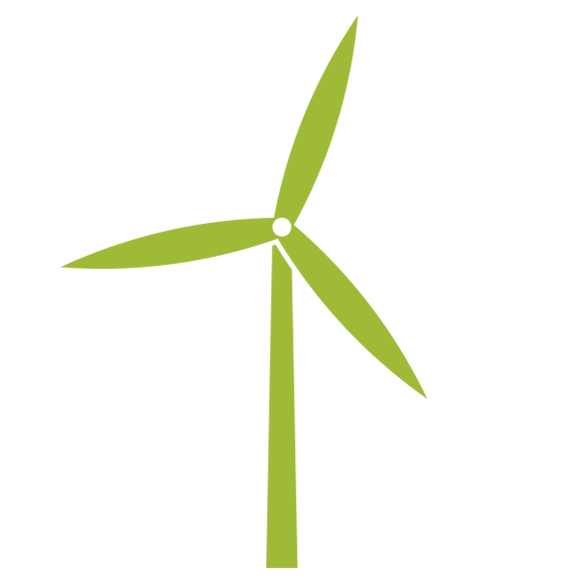
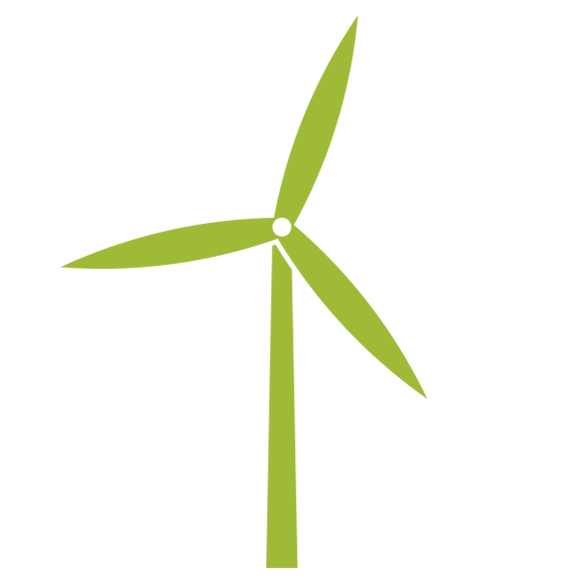
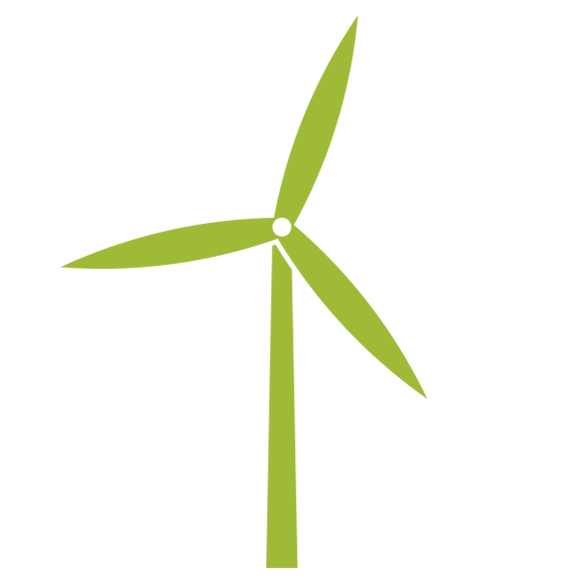
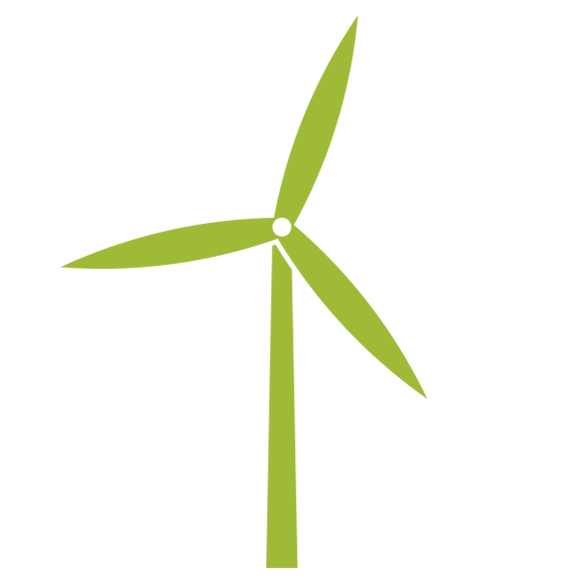

In [96]:
australia_map = folium.Map(location=[-37.8, 143.13], zoom_start=9, tiles='CartoDB positron')

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-blue-dark.png'

farms_explicite = ['MACARTH1',
        'MOORAWF1',
        'ARWF1',
        'WAUBRAWF',
        'BULGANA1']

for index, row in df[df['Abbreviation'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)

icon_path = '../images/wind_turbines_icons/turbine_icon_tum-yellow-dark.png'

farms_explicite = ['YENDWF1',
        'MERCER01',
        'ELAINWF1',
        'CROWLWF1',
        'MRTLSWF1'
]

for index, row in df[df['Abbreviation'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
    
icon_path = '../images/wind_turbines_icons/turbine_icon_tum-green.png'

farms_explicite = [
        'CHALLHWF',
        'SALTCRK1',
        'YSWF1',
        'MLWF1',
        'OAKLAND1']

for index, row in df[df['Abbreviation'].isin(farms_explicite)].iterrows():
    icon_image = folium.CustomIcon(icon_path, icon_size=(120, 120))
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=row['Farm Name'],
        icon=icon_image
    ).add_to(australia_map)
australia_map


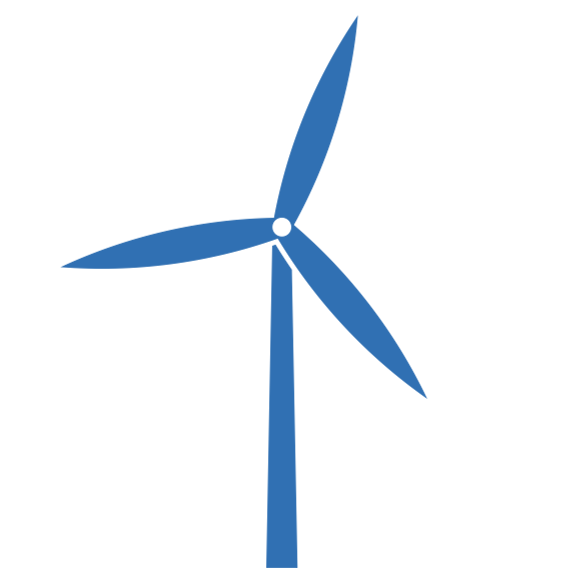
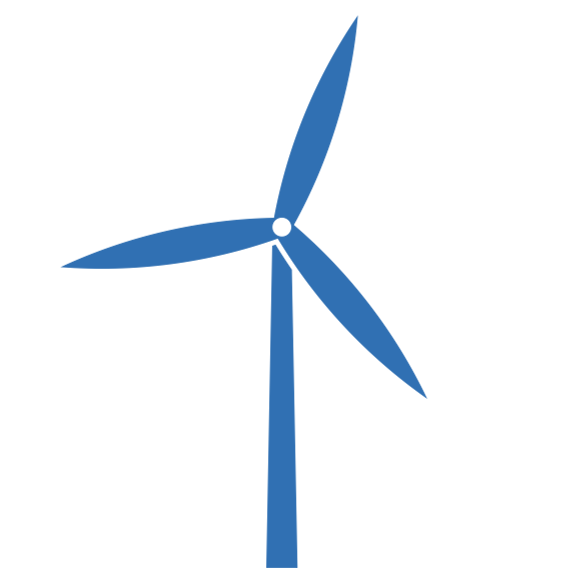
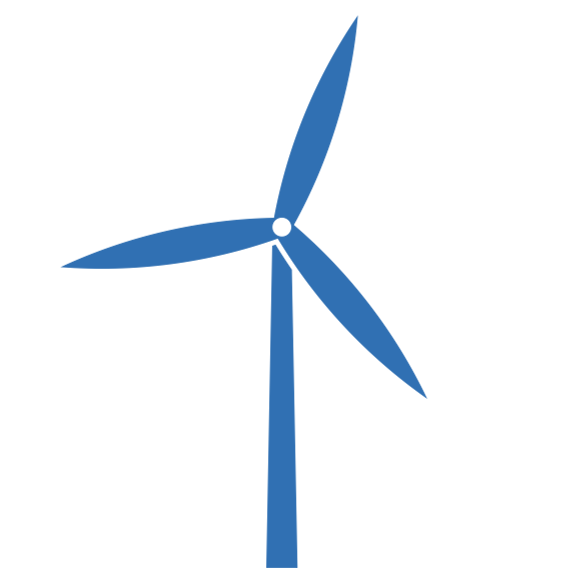
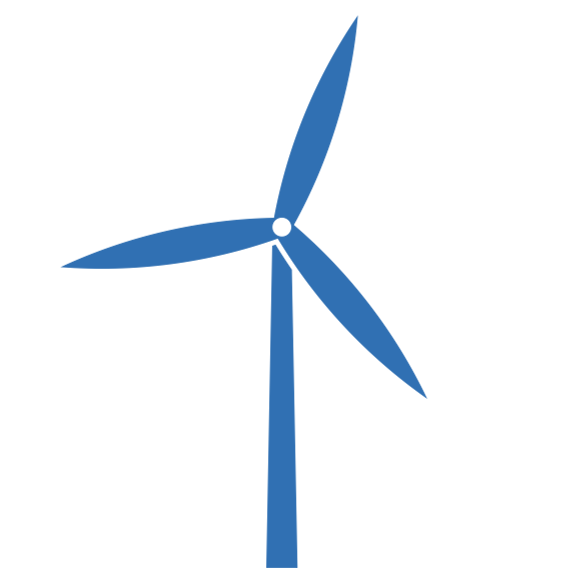
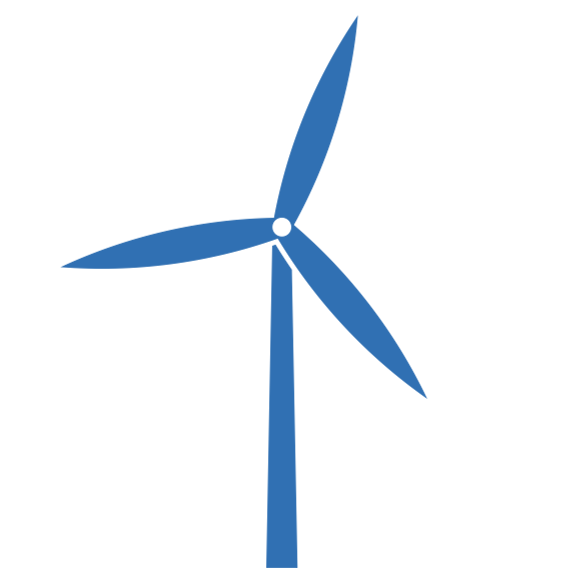
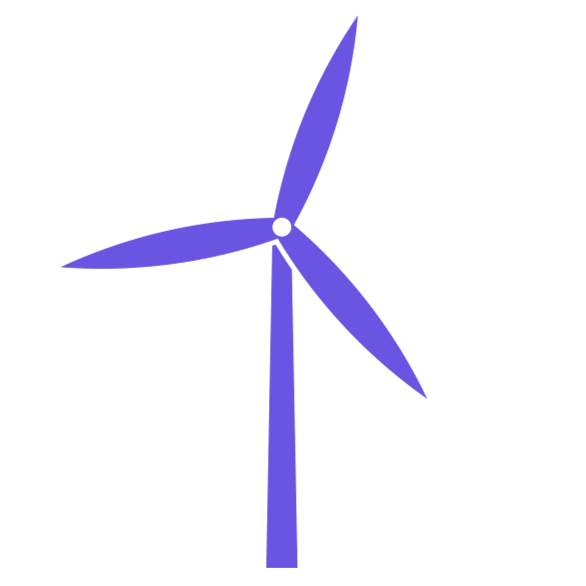
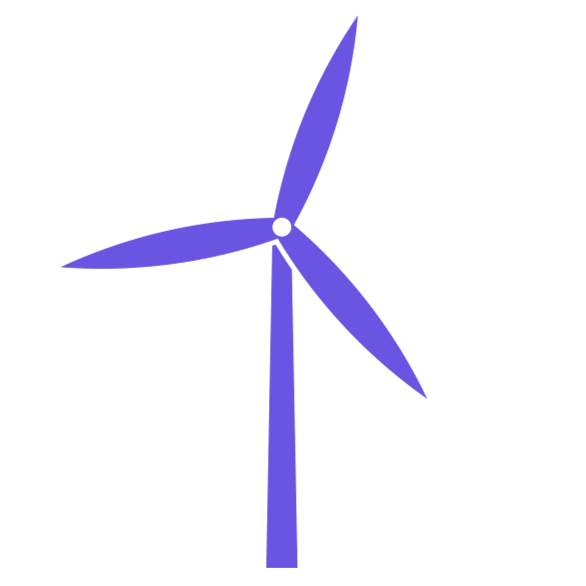
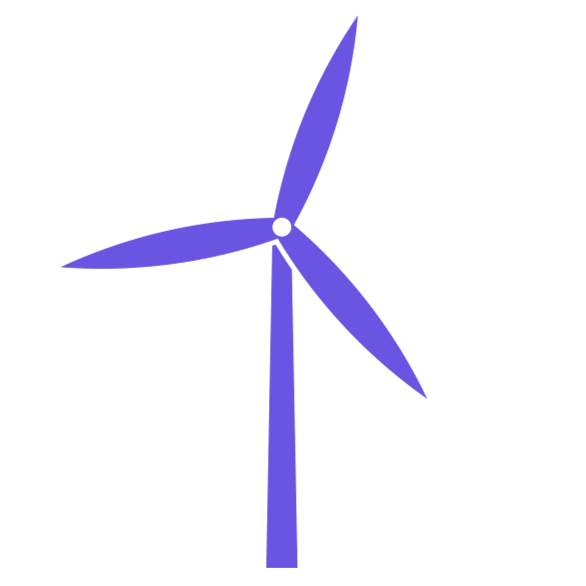
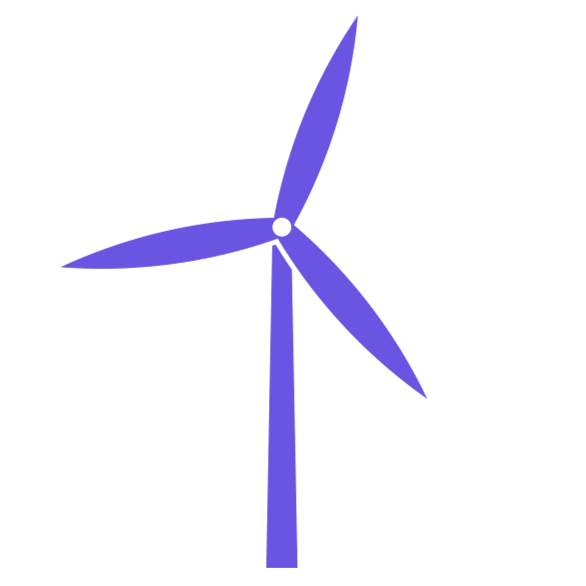
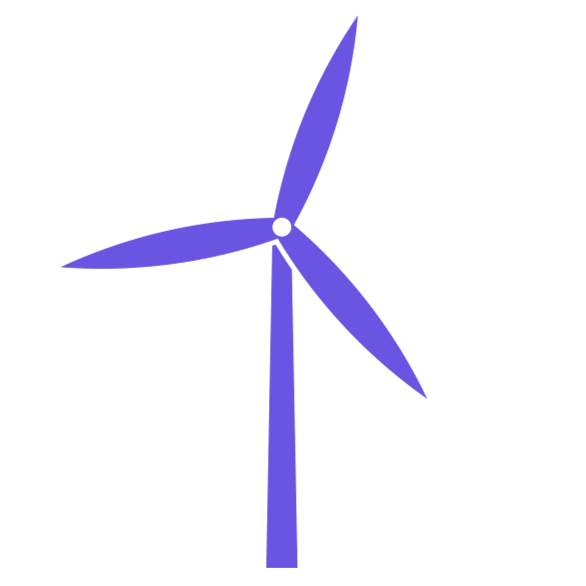
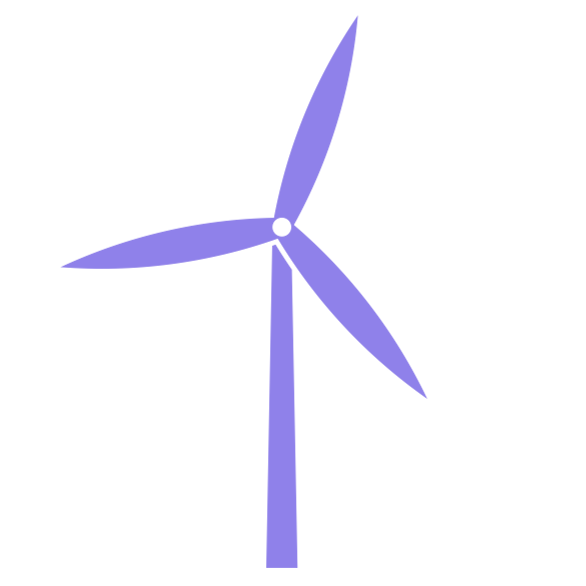
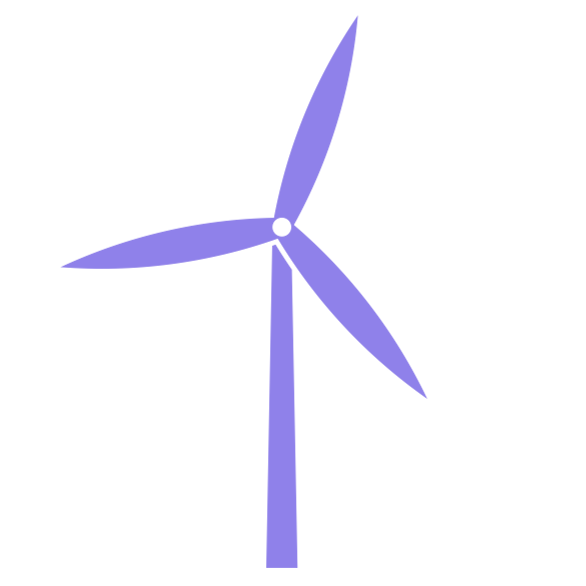
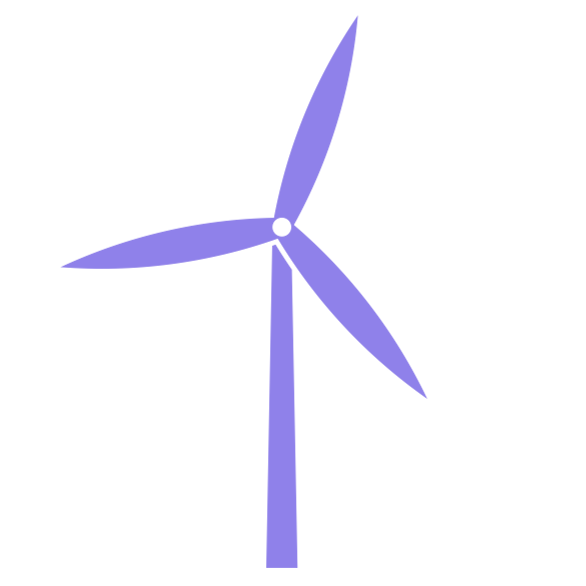
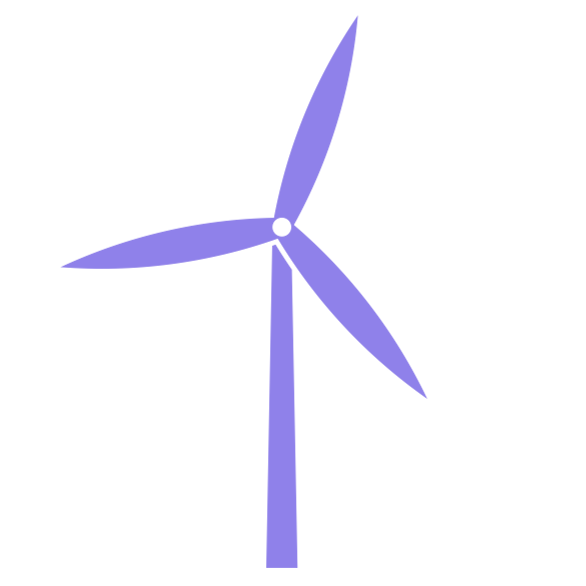
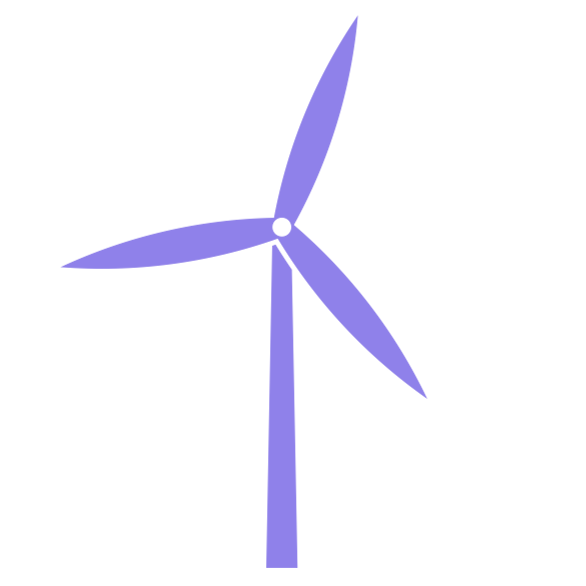
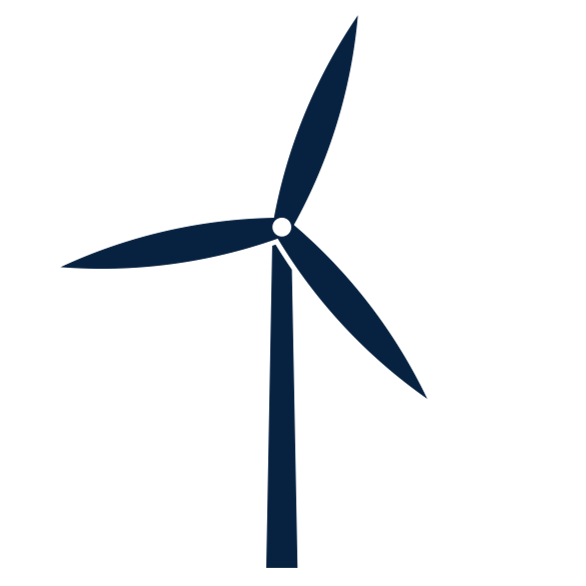
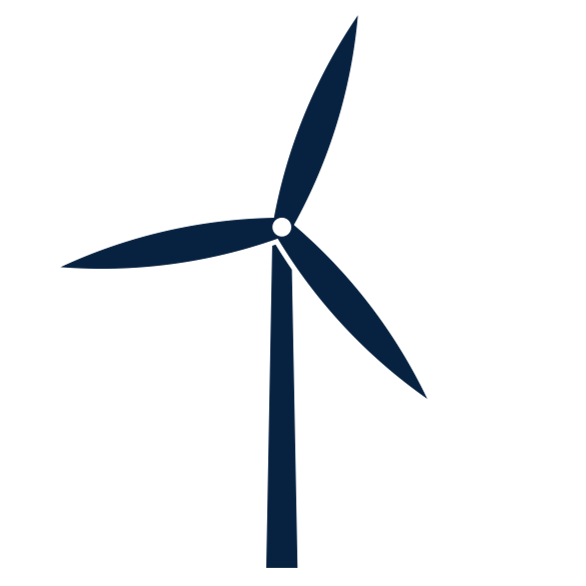
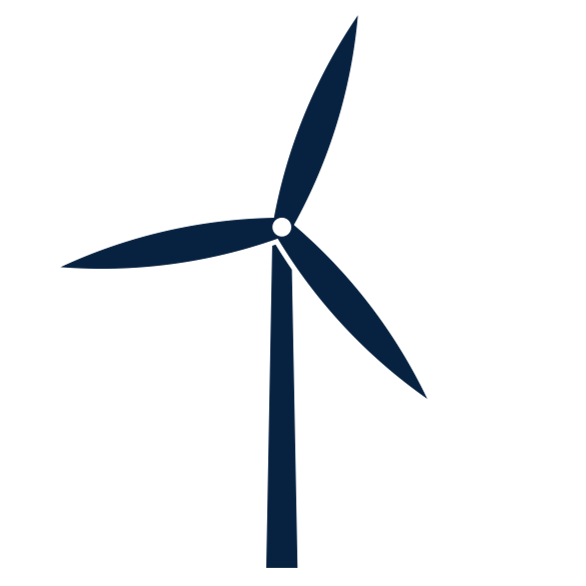
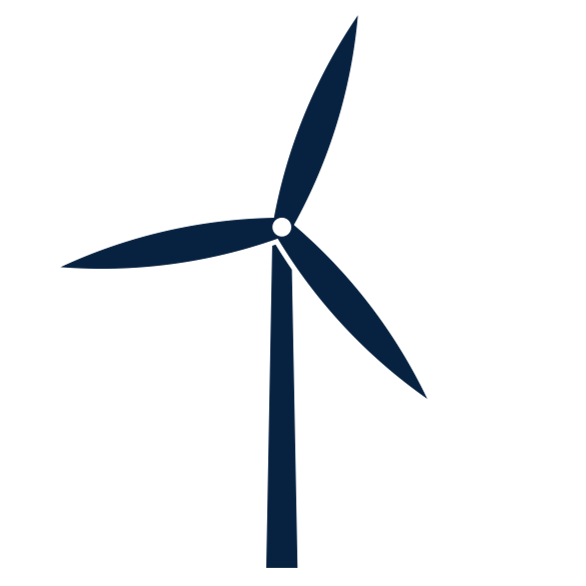
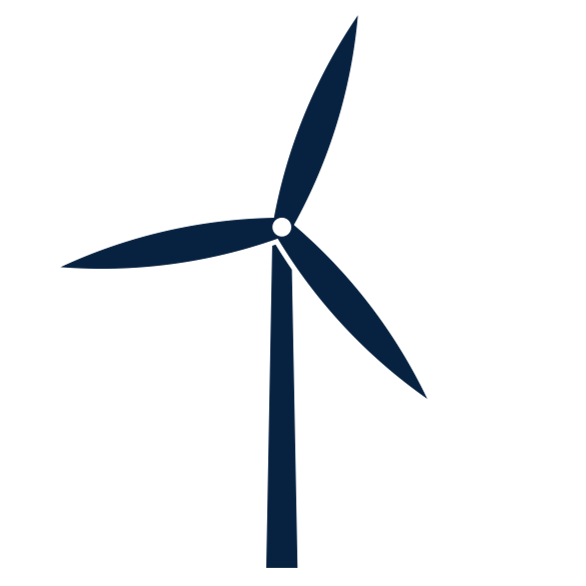
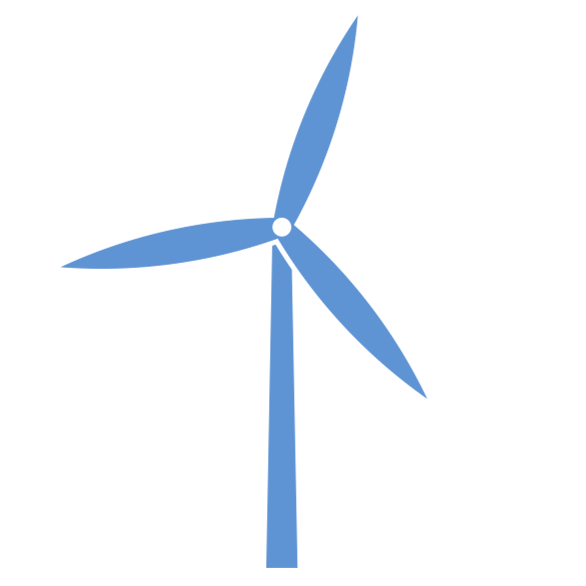
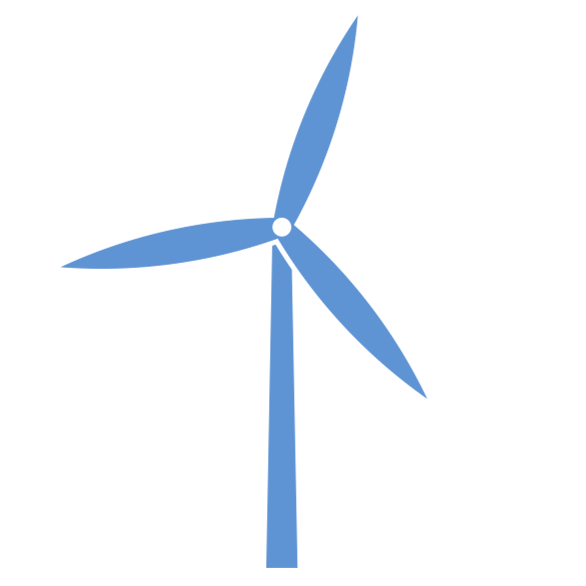
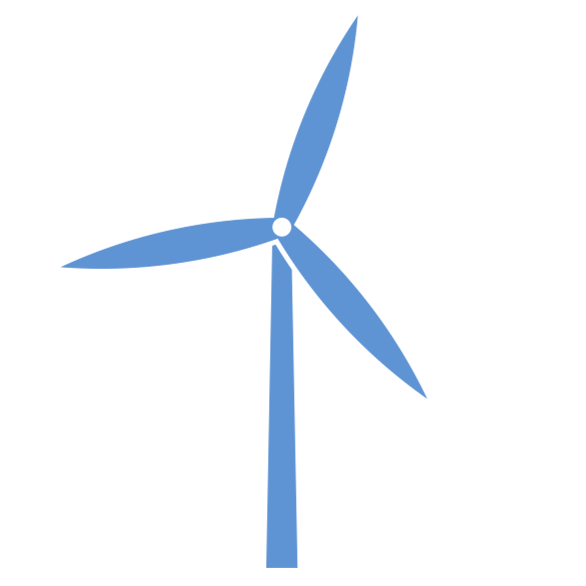
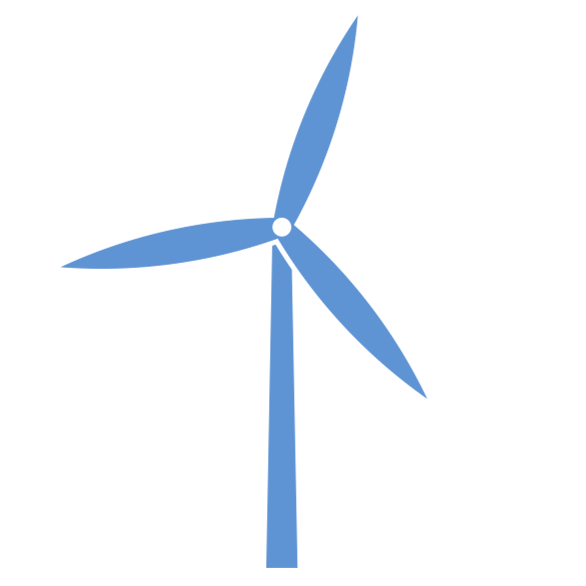
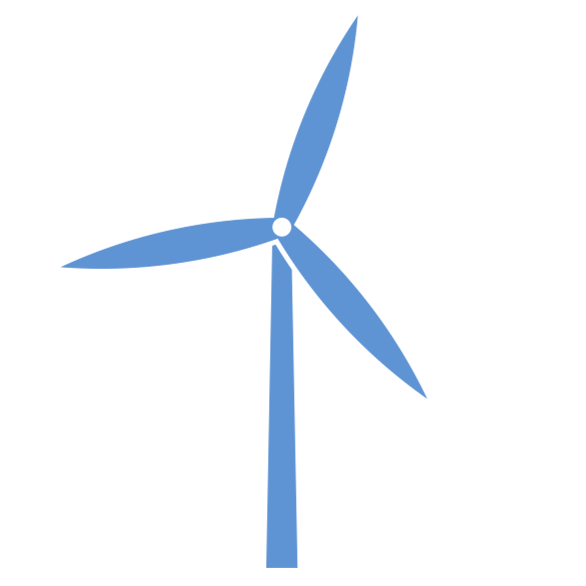
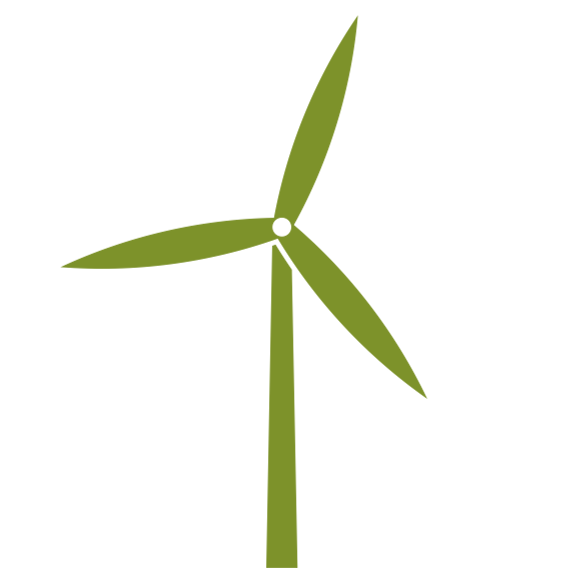
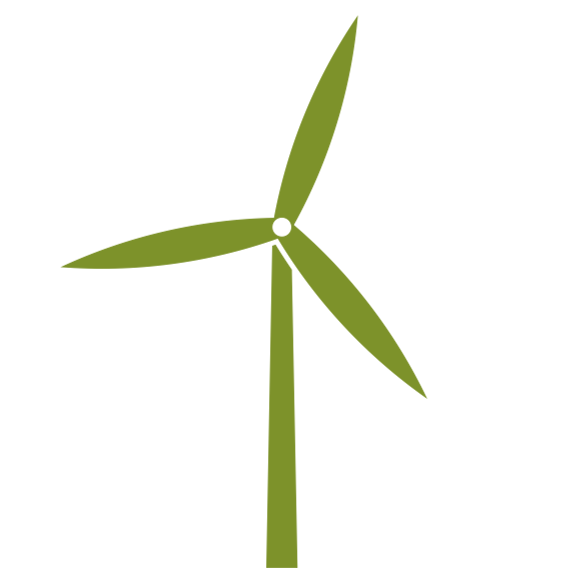
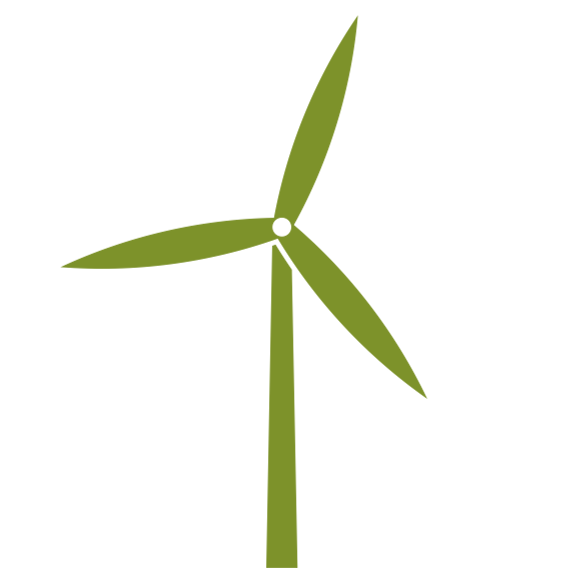
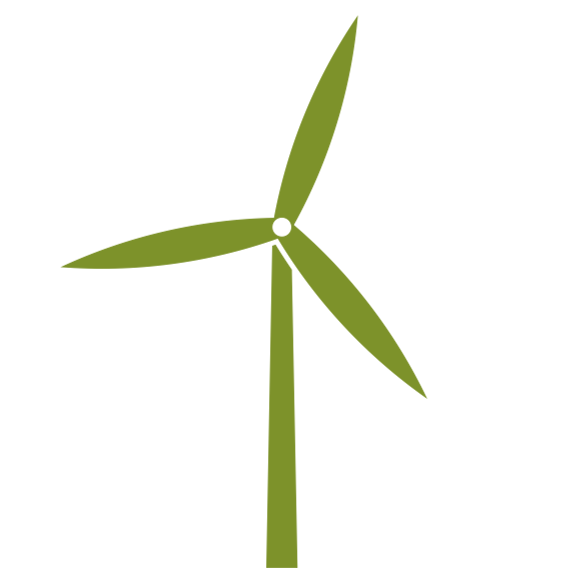
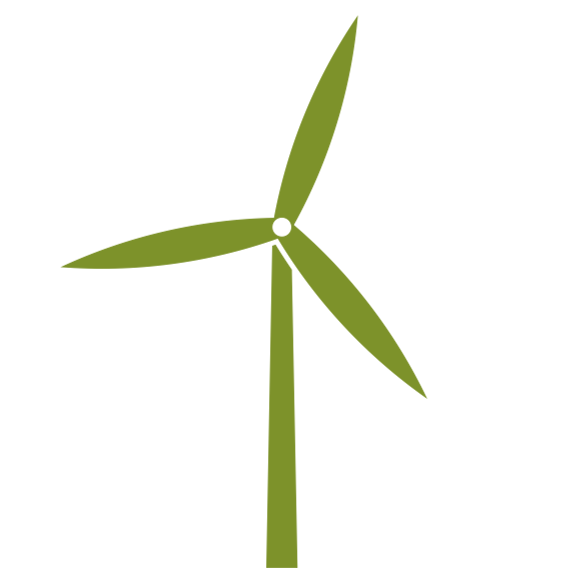
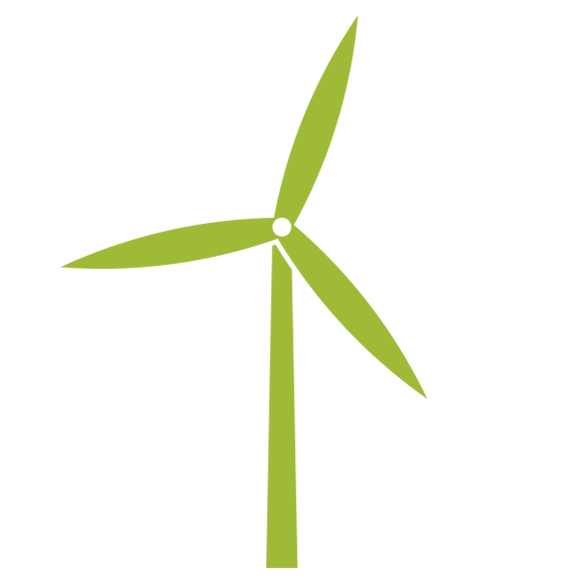
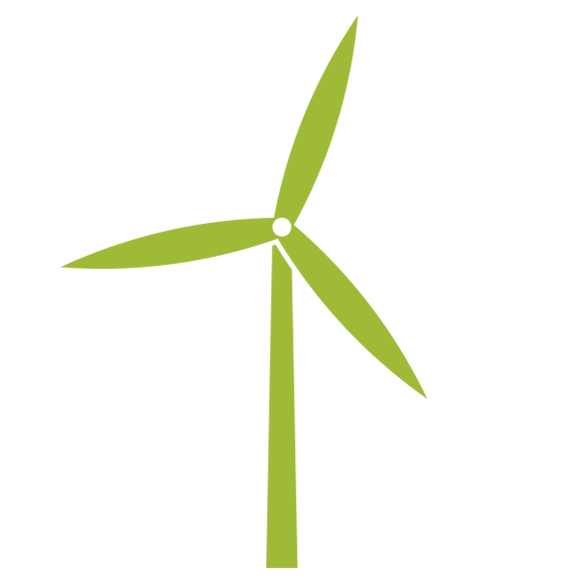
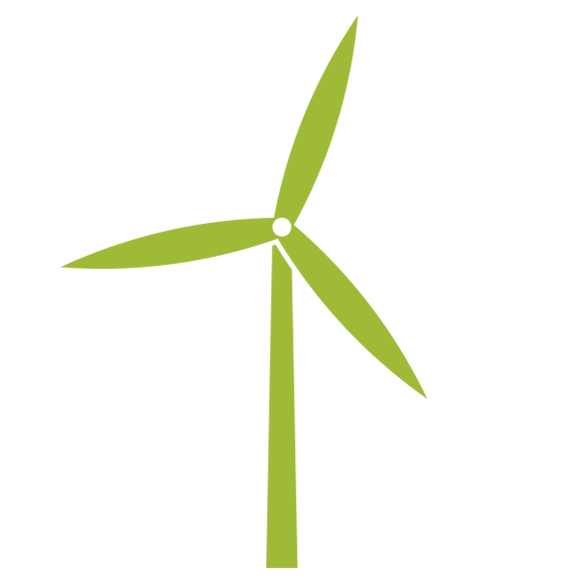
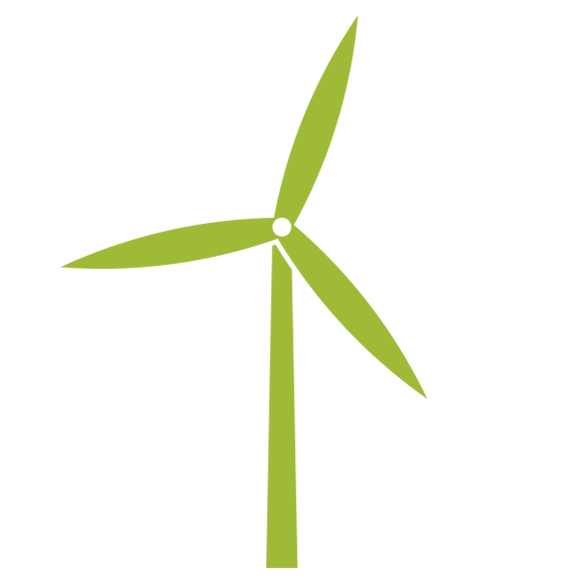
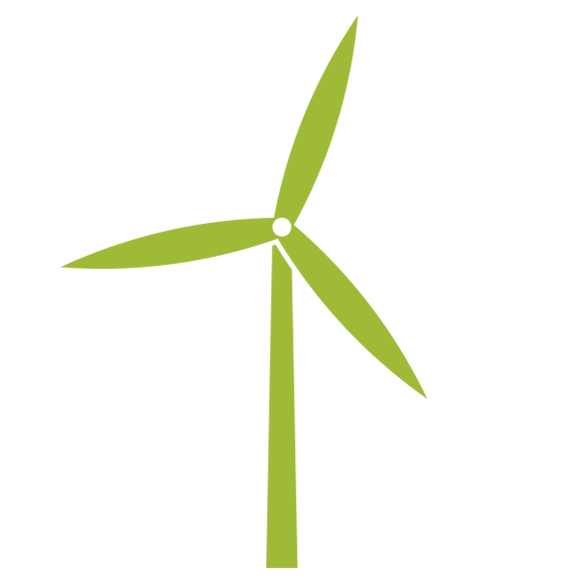
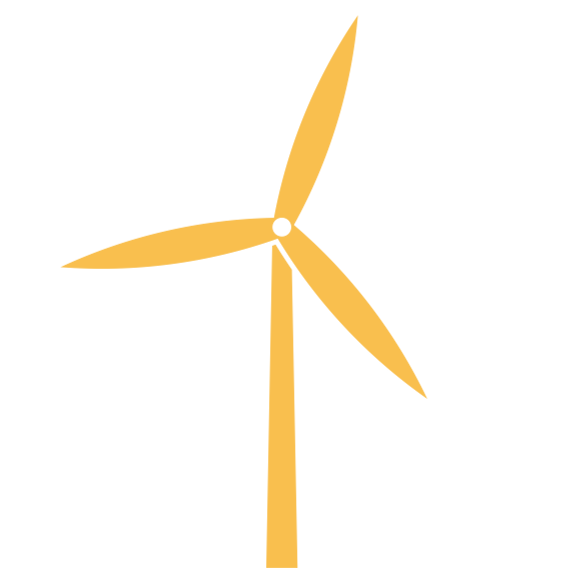
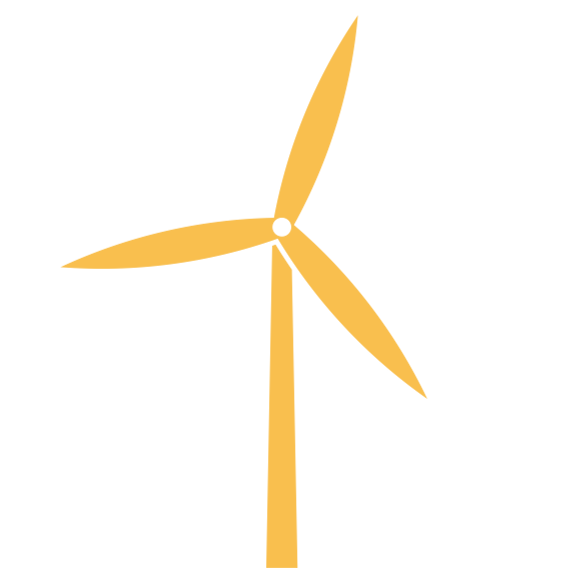
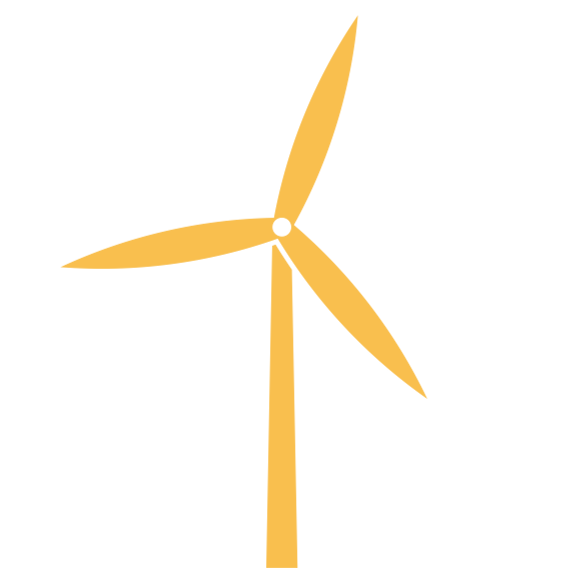
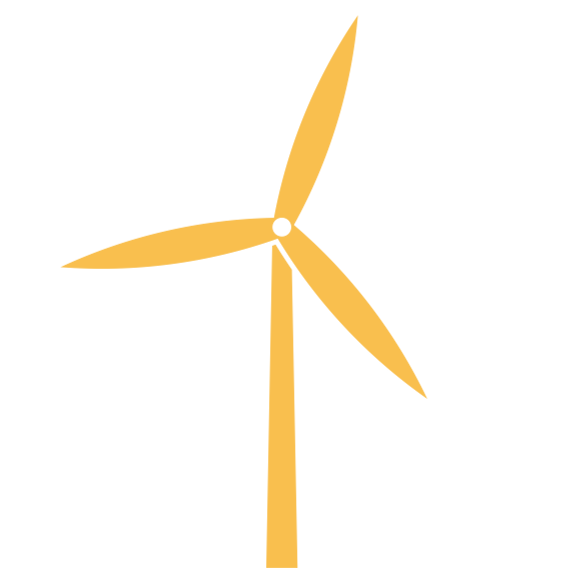
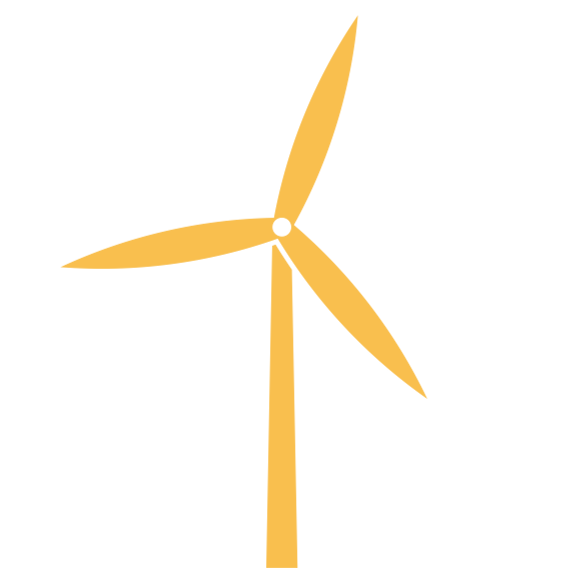
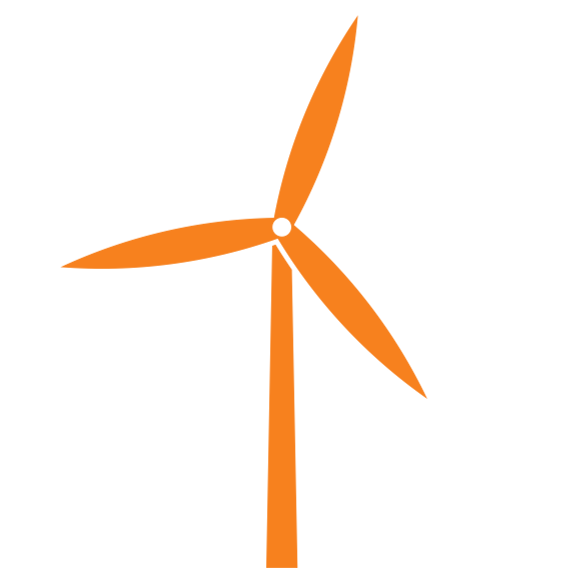
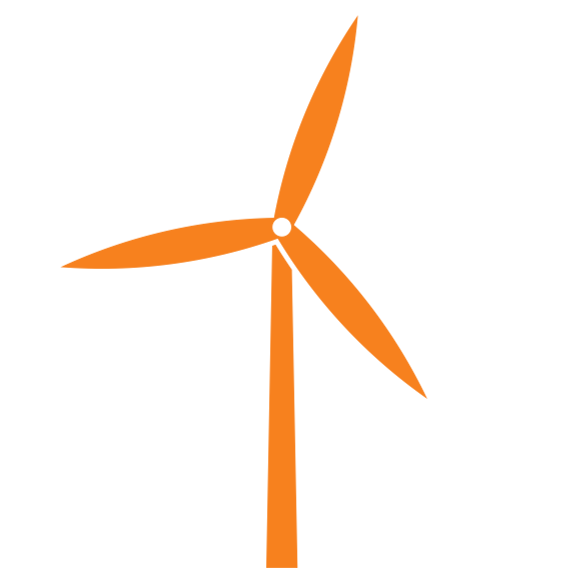
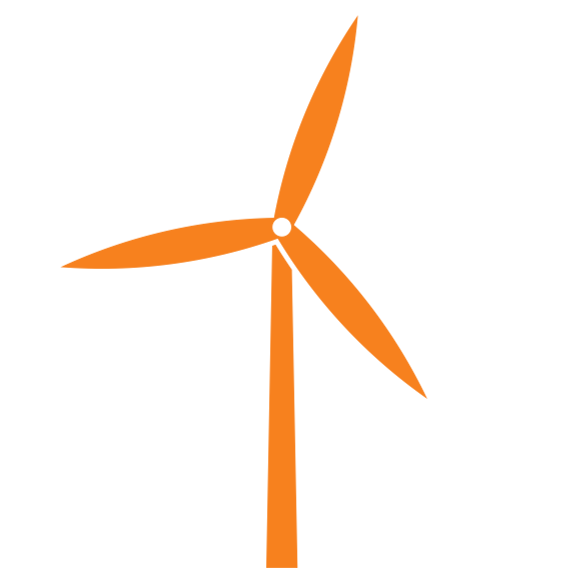
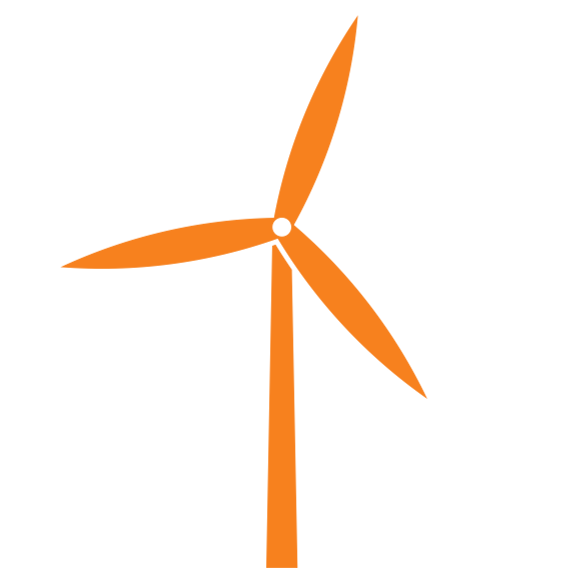
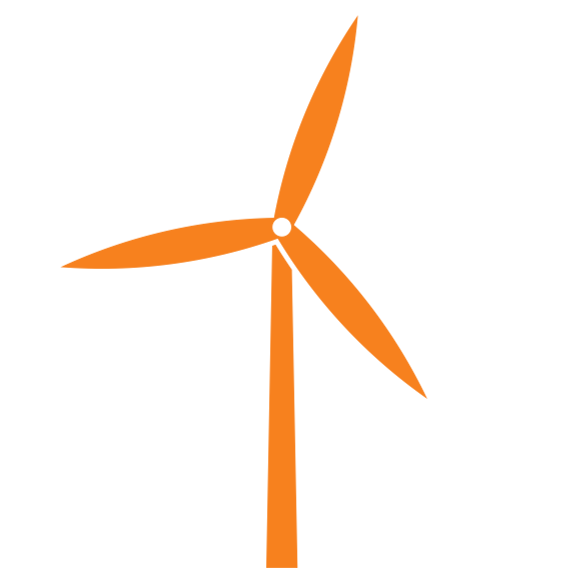
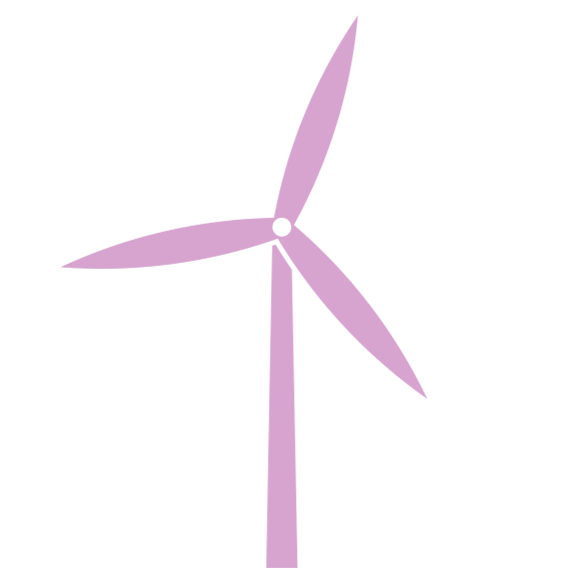
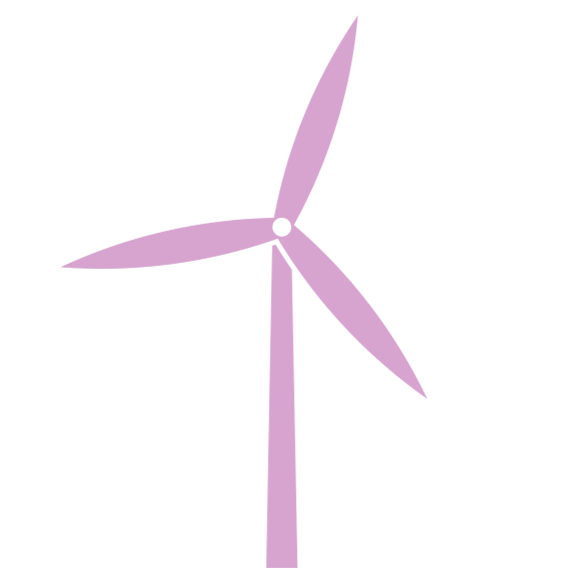
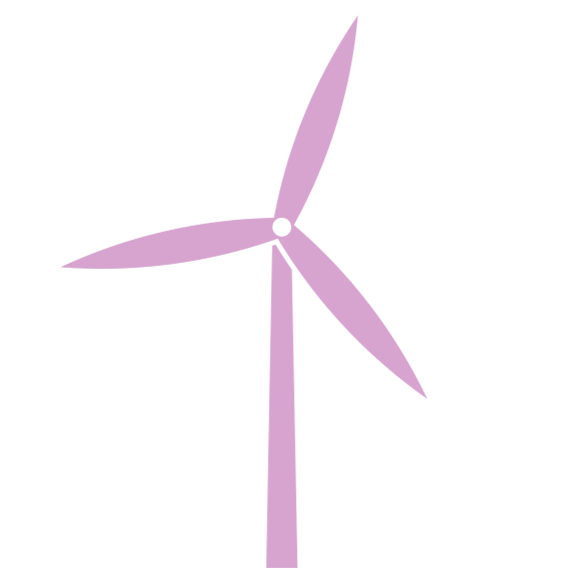
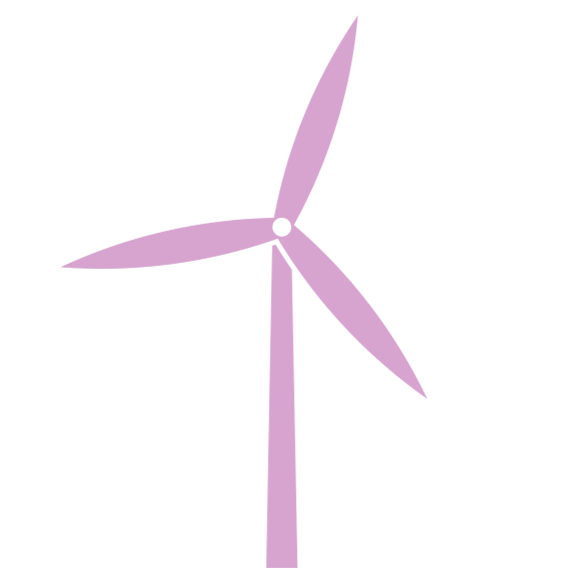
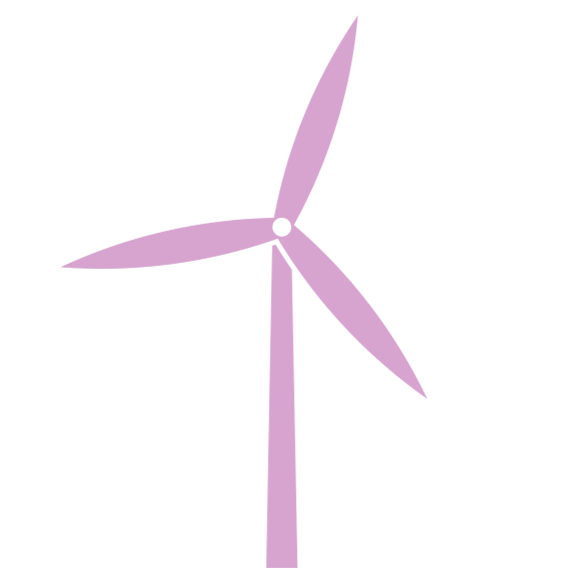
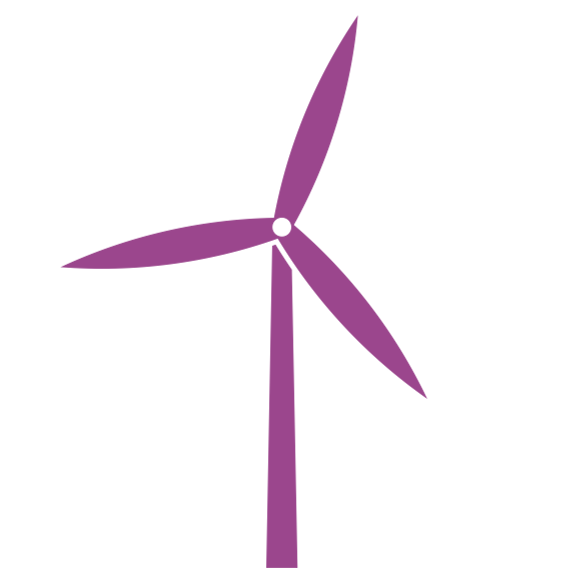
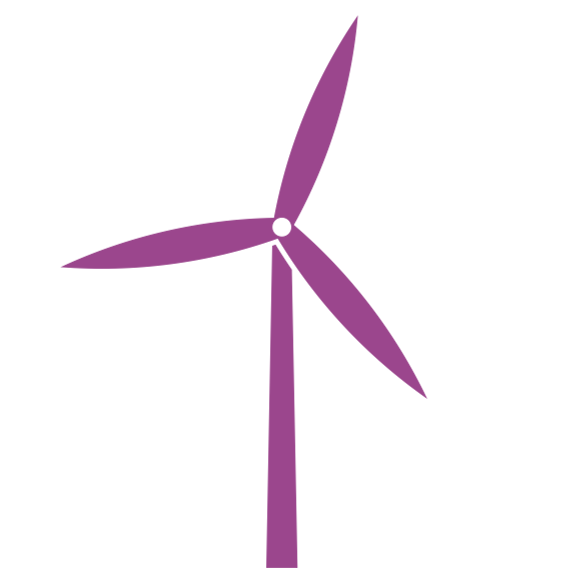
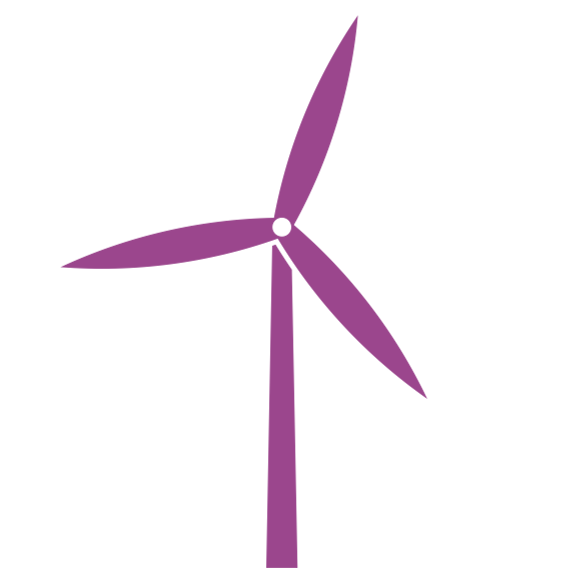
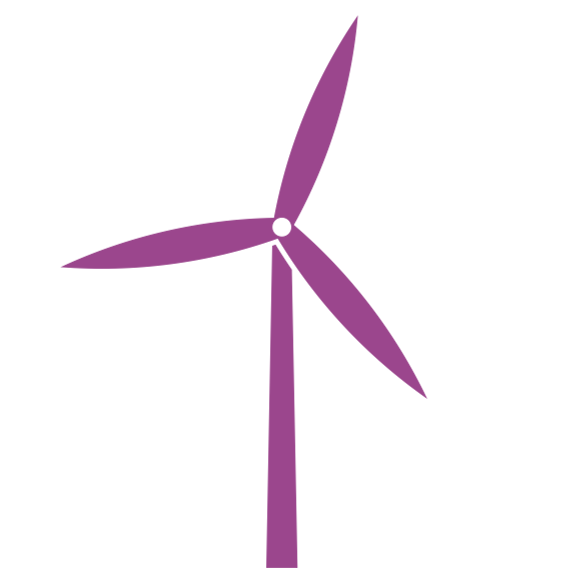
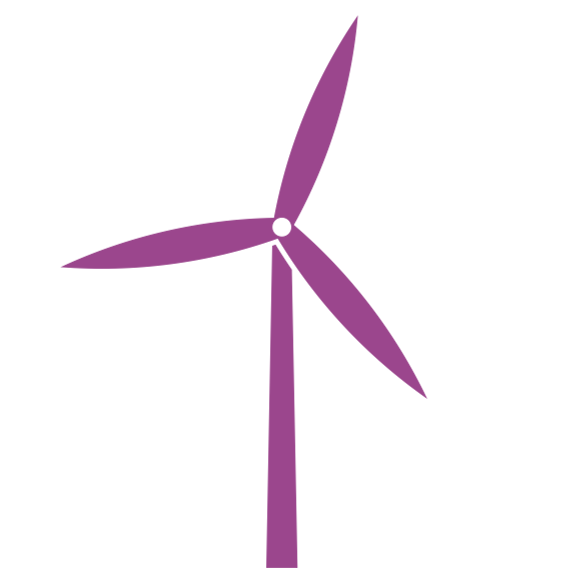
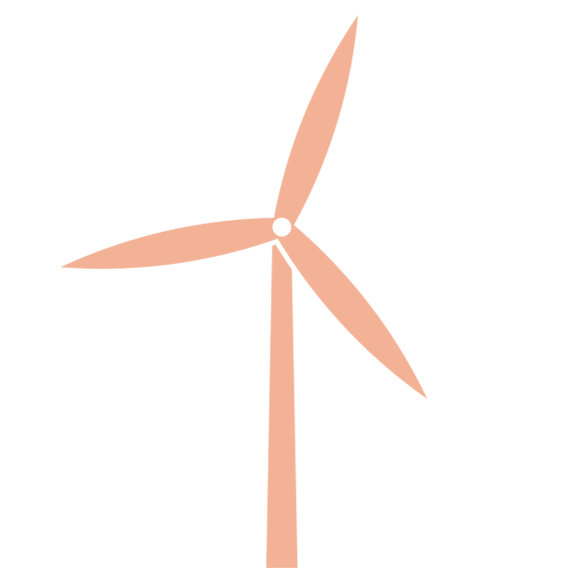
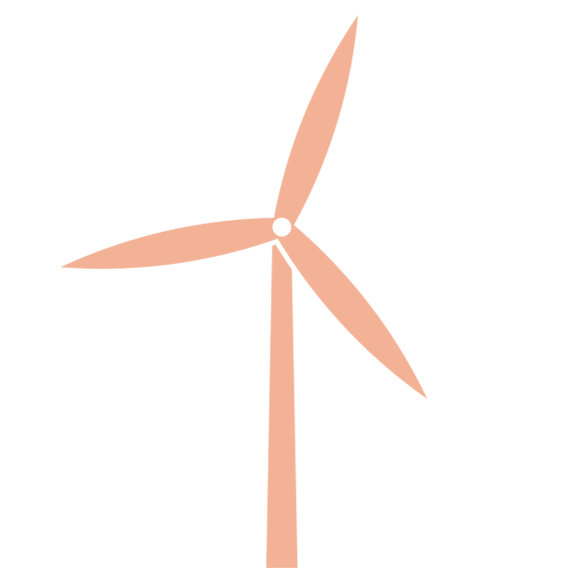
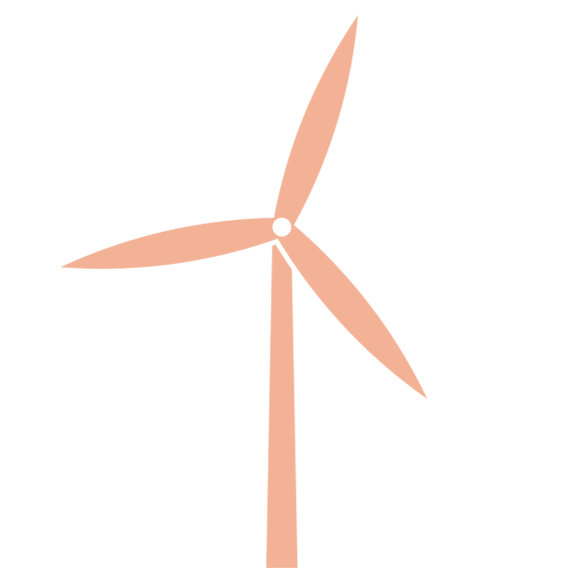
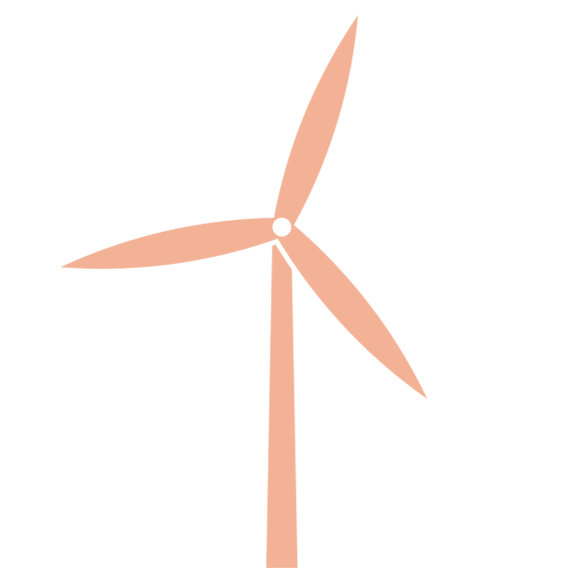
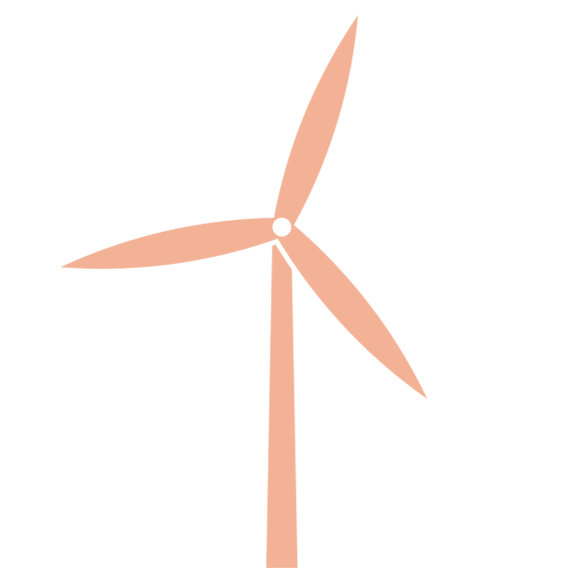
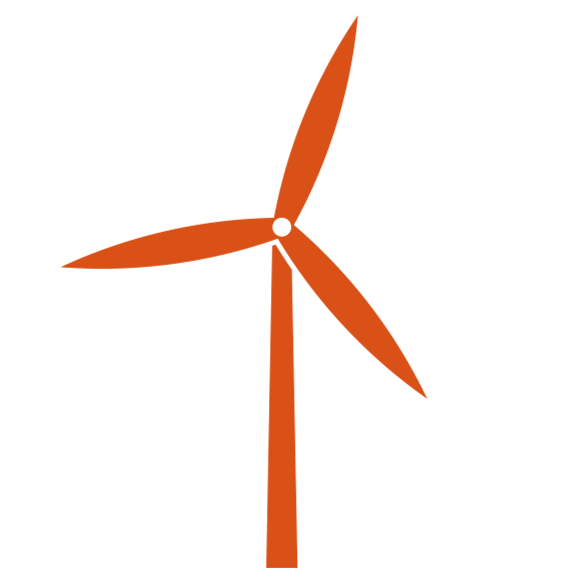
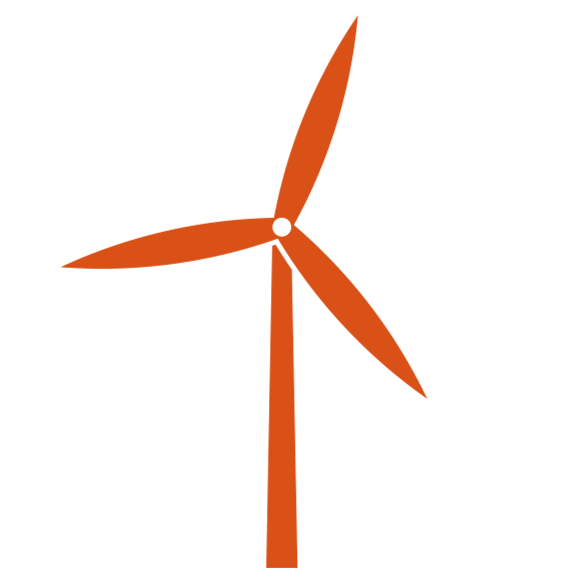
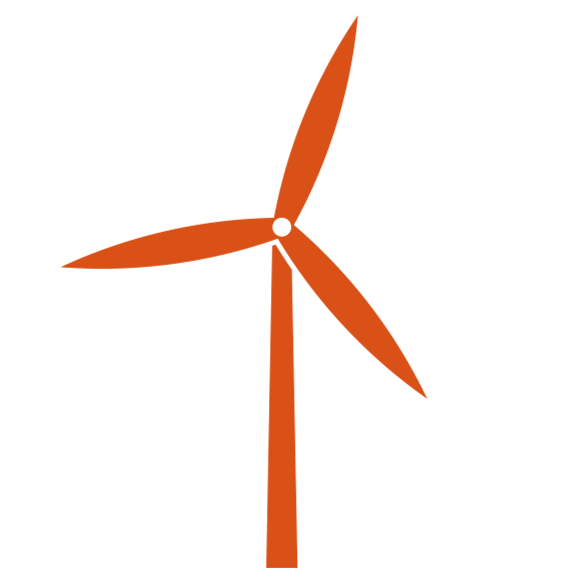
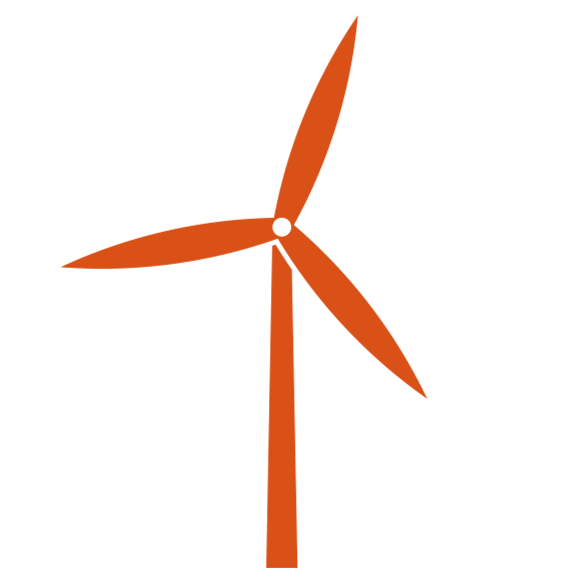
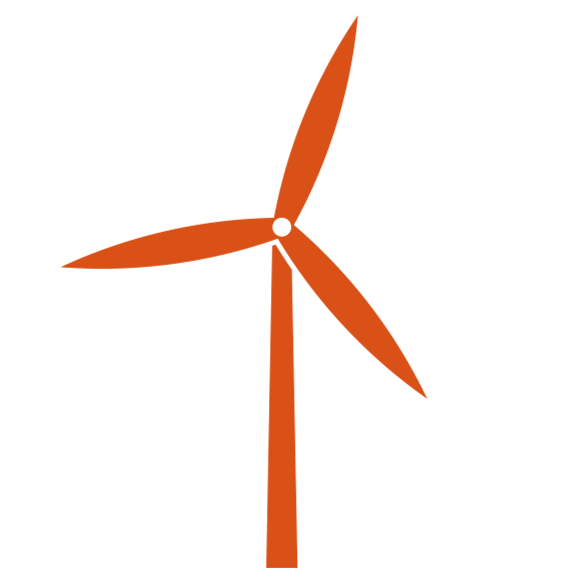
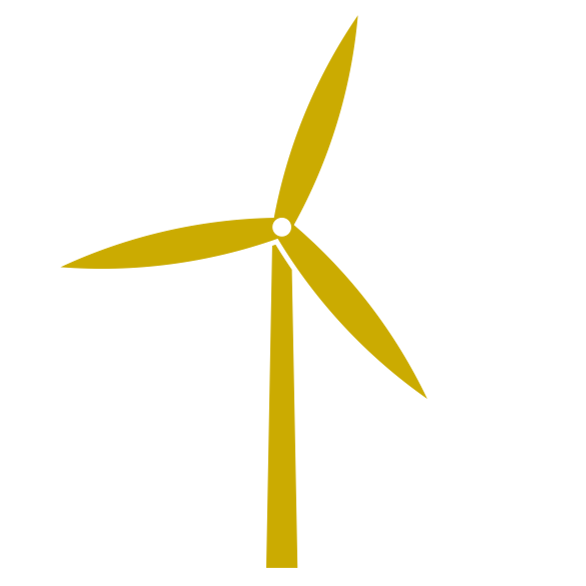
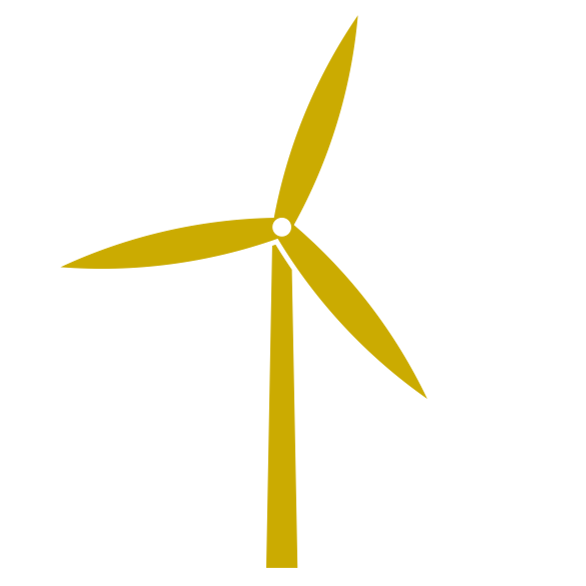
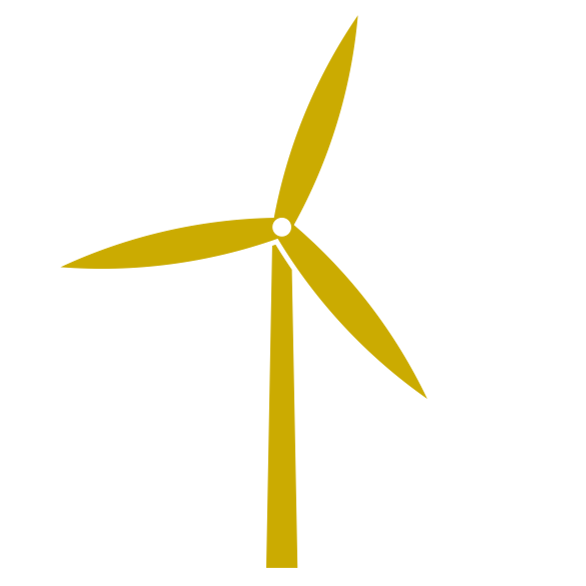
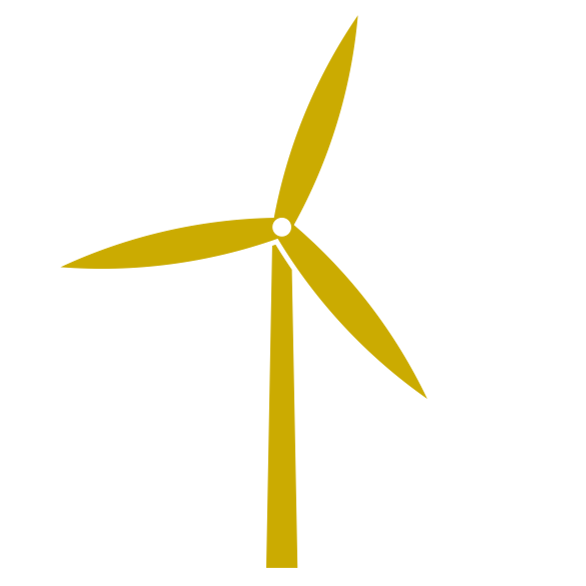
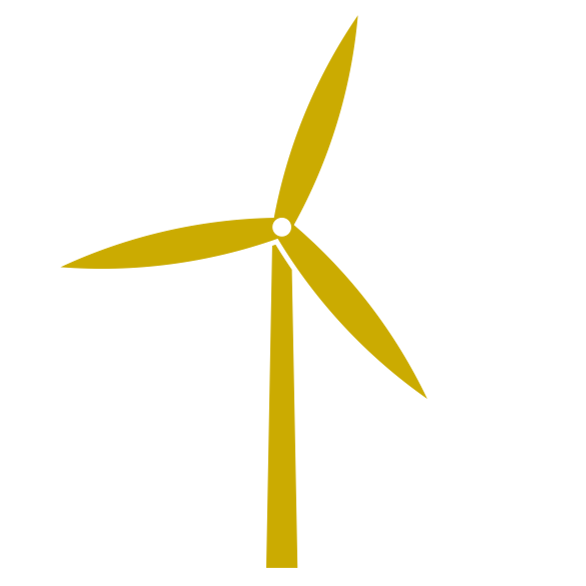
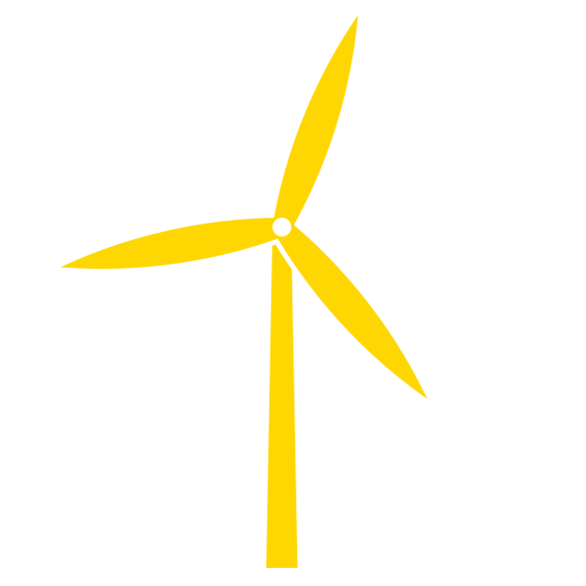
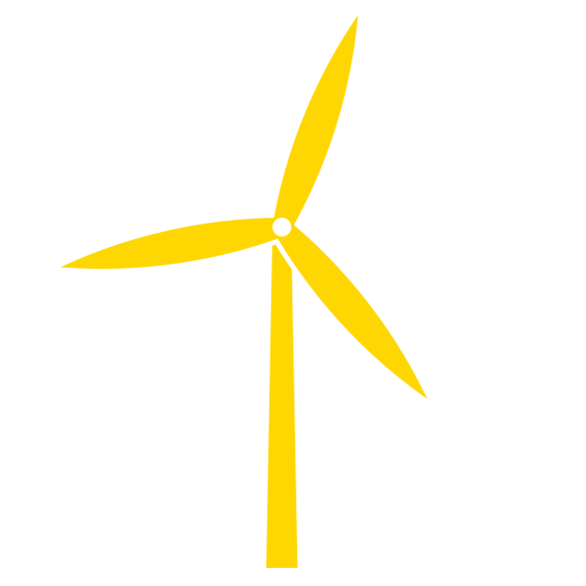
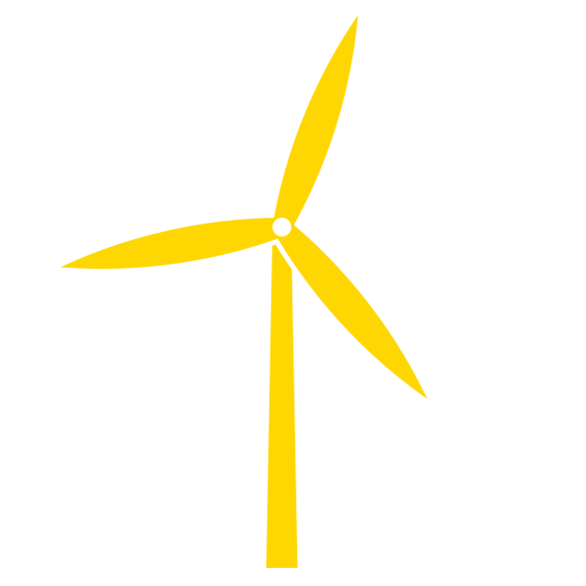
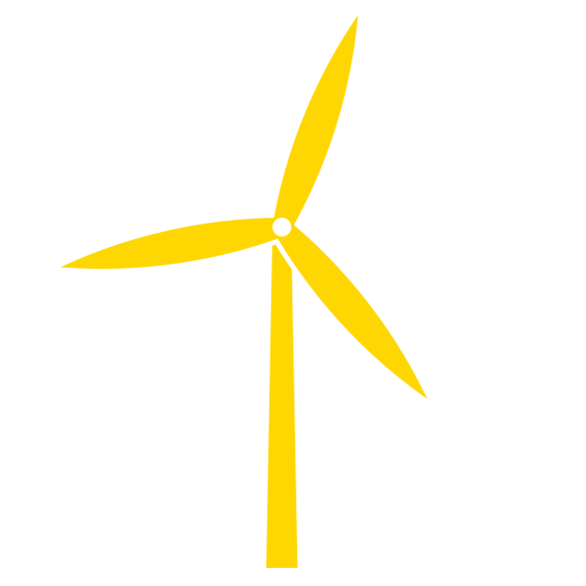
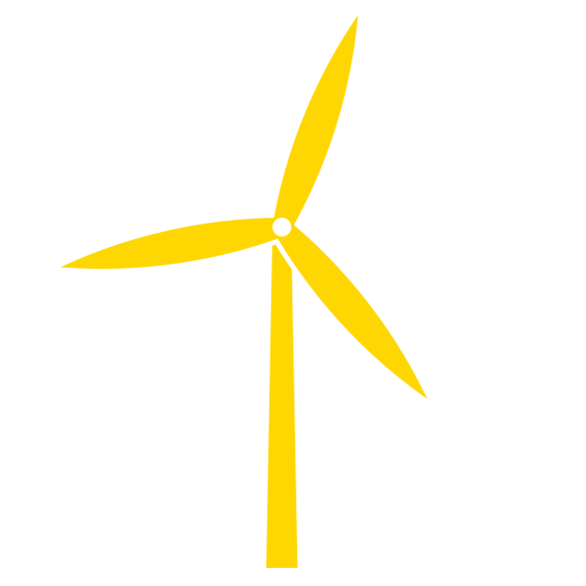

In [22]:
import pandas as pd
import folium
from timezonefinder import TimezoneFinder
import pytz
import os

icon_filenames = [
    'turbine_icon_tum-blue-brand.png',
    'turbine_icon_tum-blue-bright-dark.png',
    'turbine_icon_tum-blue-bright.png',
    'turbine_icon_tum-blue-dark.png',
    'turbine_icon_tum-blue-light.png',
    'turbine_icon_tum-green-dark.png',
    'turbine_icon_tum-green.png',
    'turbine_icon_tum-orange-1.png',
    'turbine_icon_tum-orange.png',
    'turbine_icon_tum-pink-2.png',
    'turbine_icon_tum-pink-dark.png',
    'turbine_icon_tum-red-2.png',
    'turbine_icon_tum-red-dark.png',
    'turbine_icon_tum-yellow-dark.png',
    'turbine_icon_tum-yellow.png'
]

excel_file_path = '../data/wind_farm_data/locations_wind_farms.xlsx'
df = pd.read_excel(excel_file_path)

tf = TimezoneFinder()

def get_timezone(lat, lon):
    timezone_str = tf.timezone_at(lat=lat, lng=lon)
    return pytz.timezone(timezone_str) if timezone_str else None

df['Timezone'] = df.apply(lambda row: get_timezone(row['Latitude'], row['Longitude']), axis=1)

n_clusters = 15
n_samples = n_clusters * 5  # 5 wind farms per cluster
sampled_df = df.sample(n_samples, random_state=42)  # Use a random state for reproducibility

australia_map = folium.Map(location=[-30, 150], zoom_start=4, tiles='CartoDB positron')

icons_dir_path = '../images/wind_turbines_icons'

for i in range(n_clusters):
    cluster = sampled_df.iloc[i*5:(i+1)*5]
    icon_path = os.path.join(icons_dir_path, icon_filenames[i])
    for _, row in cluster.iterrows():
        icon = folium.CustomIcon(icon_path, icon_size=(70, 70))
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['Farm Name'],
            icon=icon
        ).add_to(australia_map)

css_filter = """
<style>
    .leaflet-tile {
        filter: brightness(80%) saturate(70%);
    }
</style>
"""
australia_map.get_root().html.add_child(folium.Element(css_filter))

australia_map



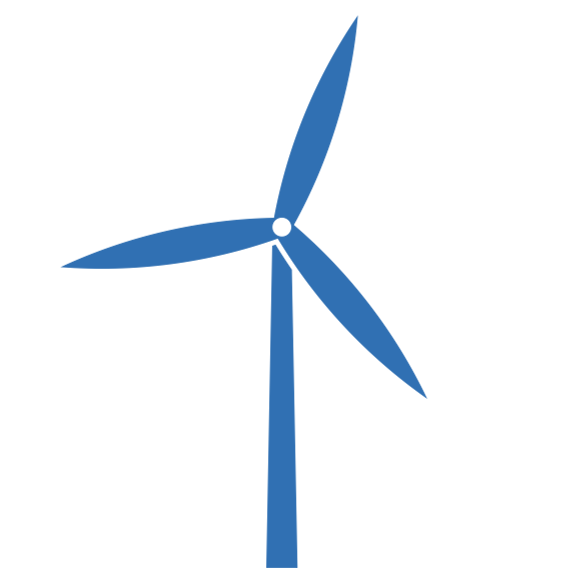
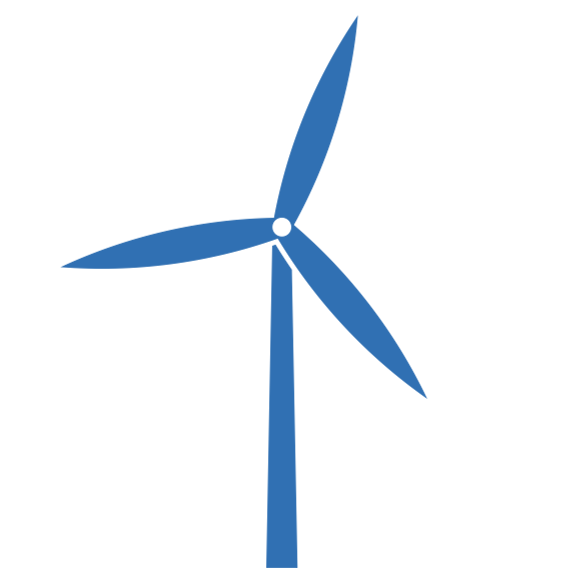
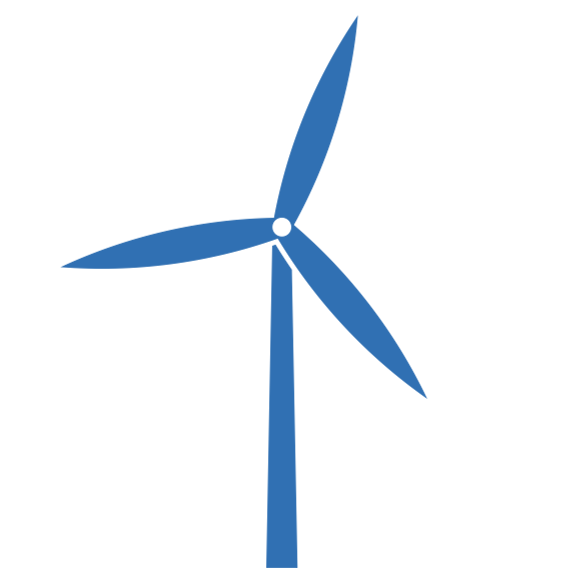
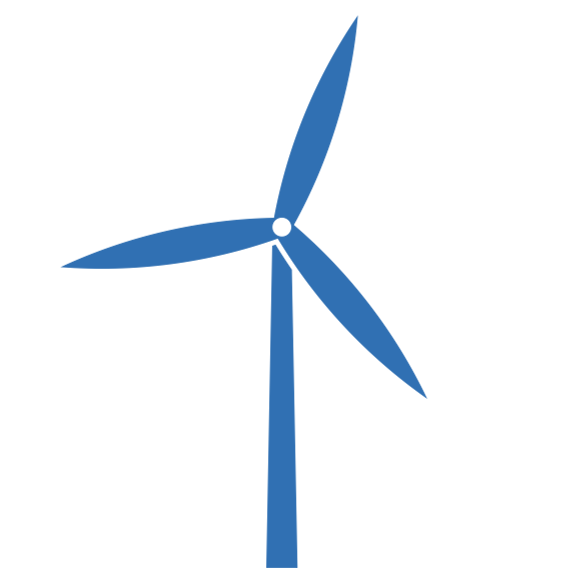
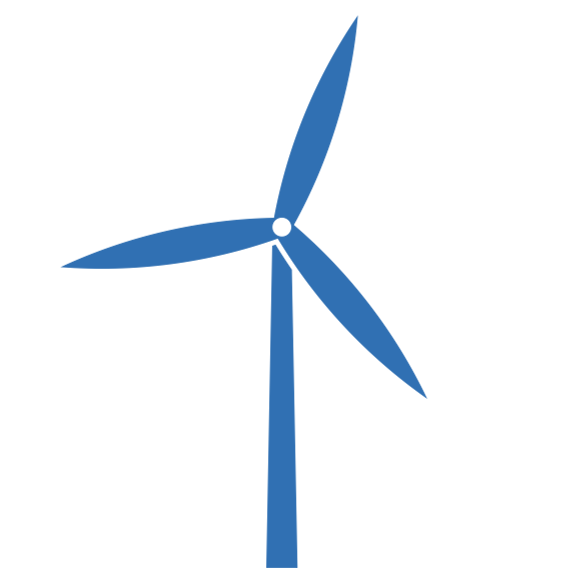
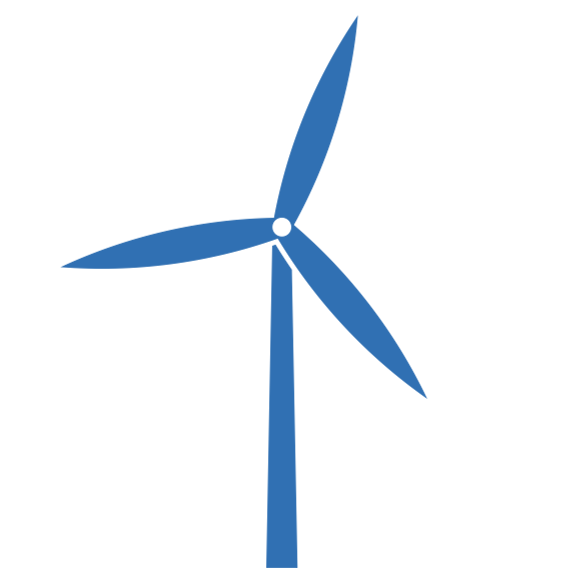
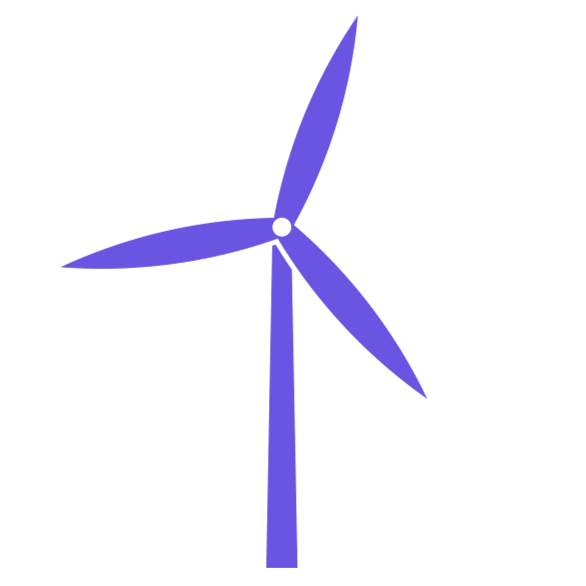
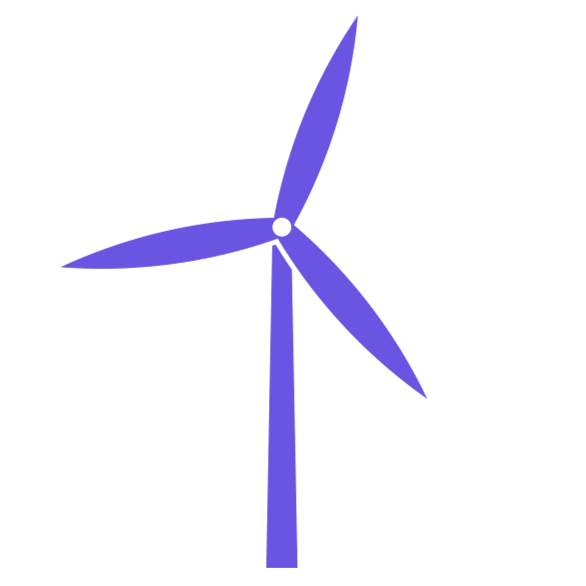
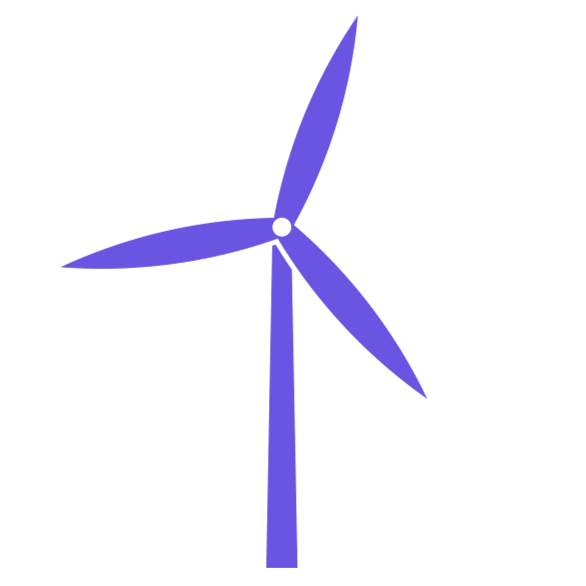
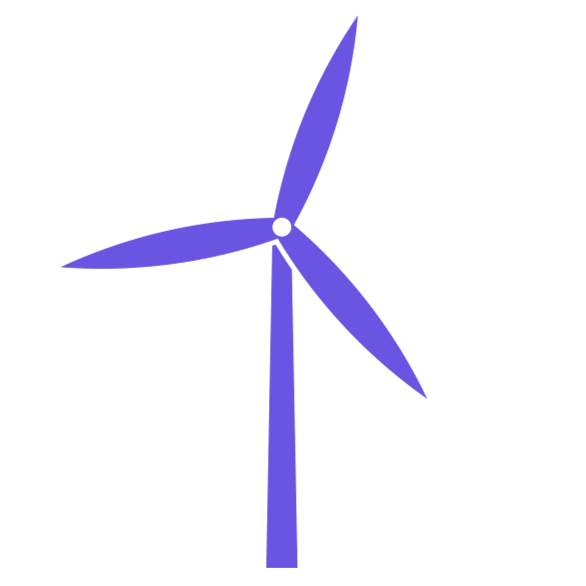
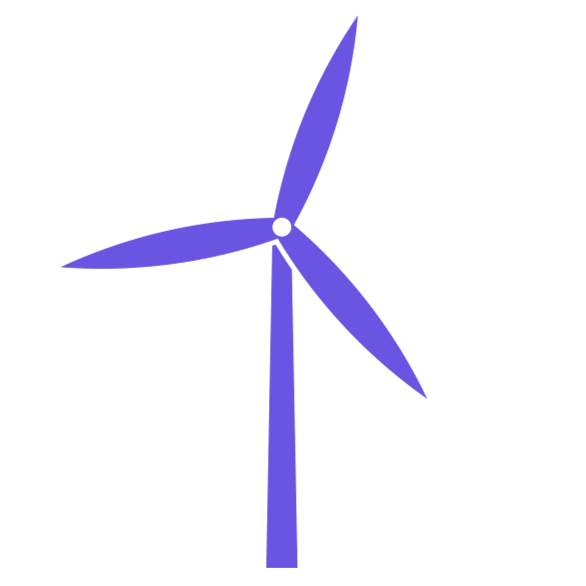
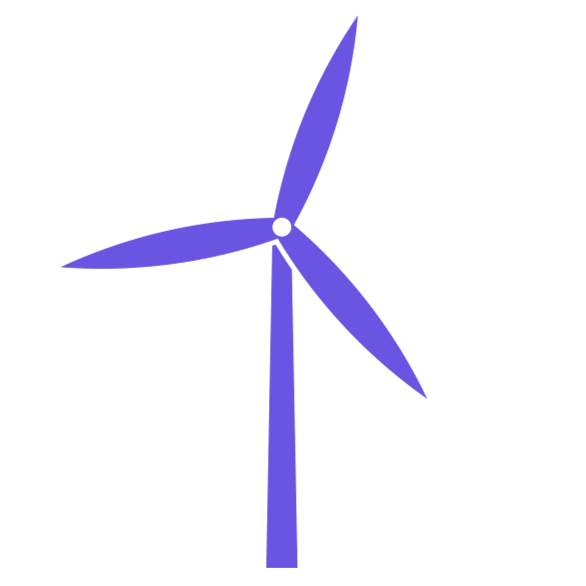
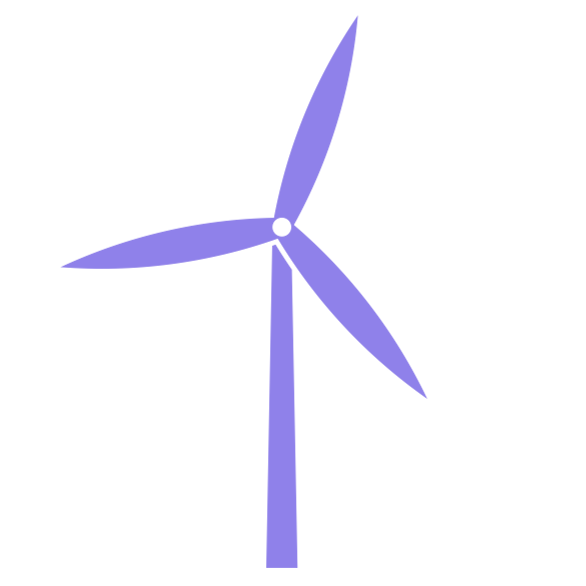
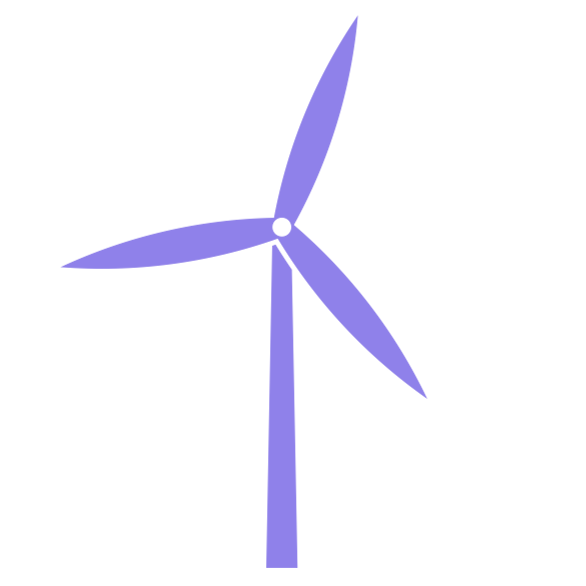
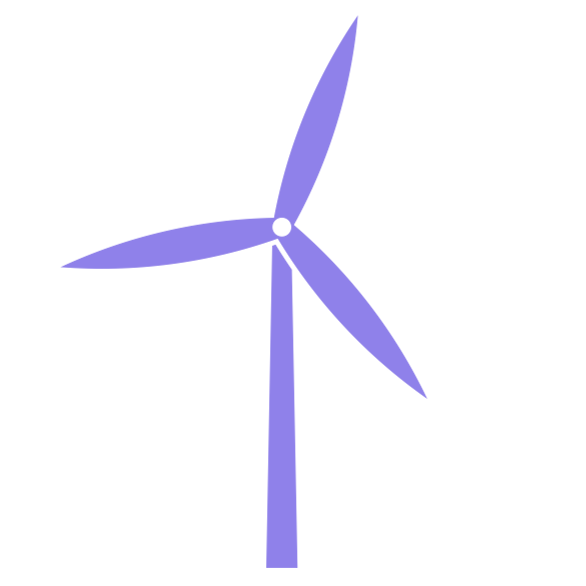
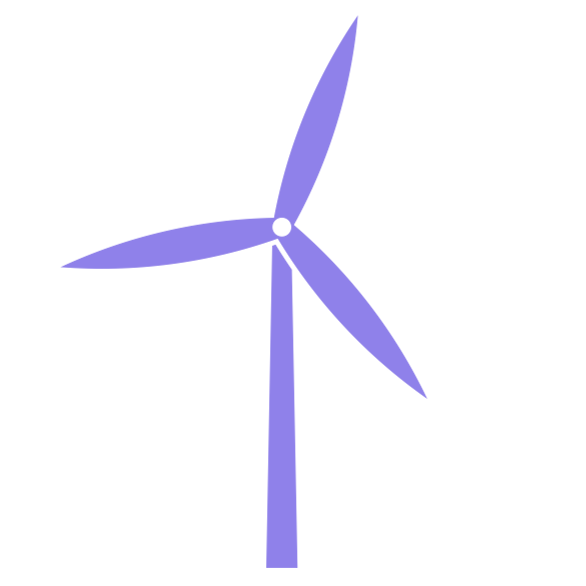
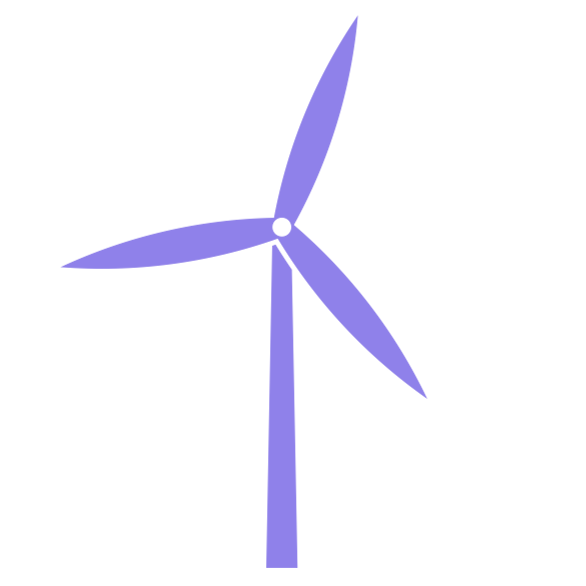
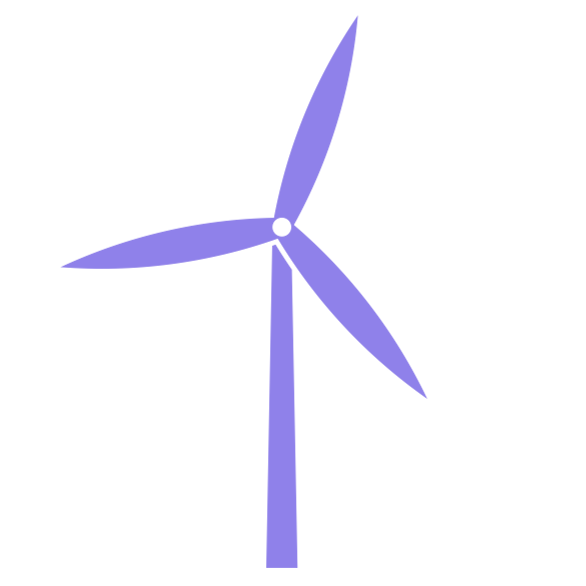
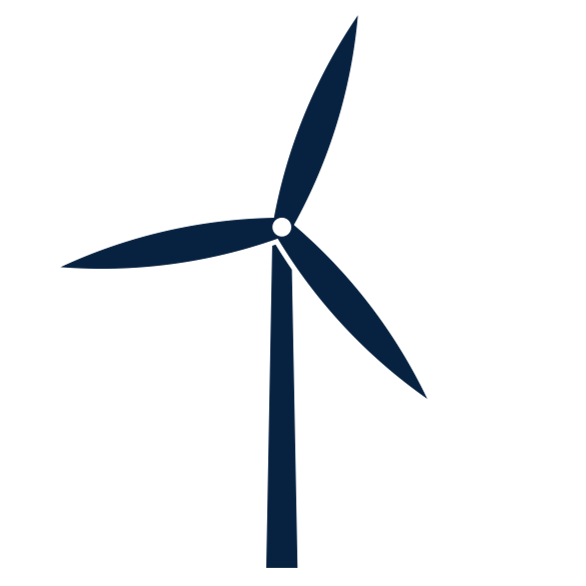
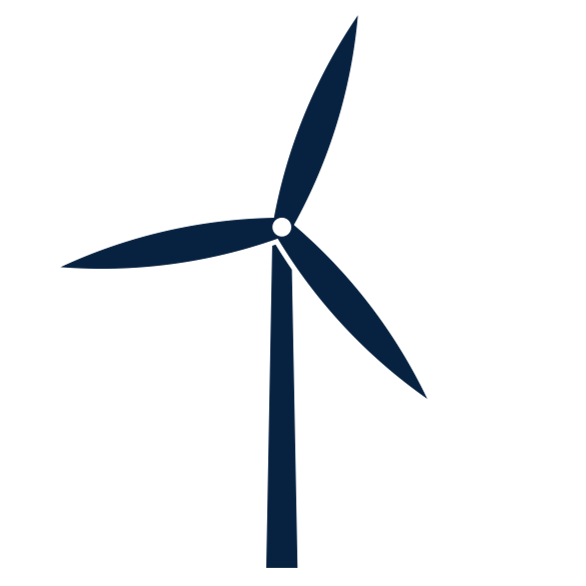
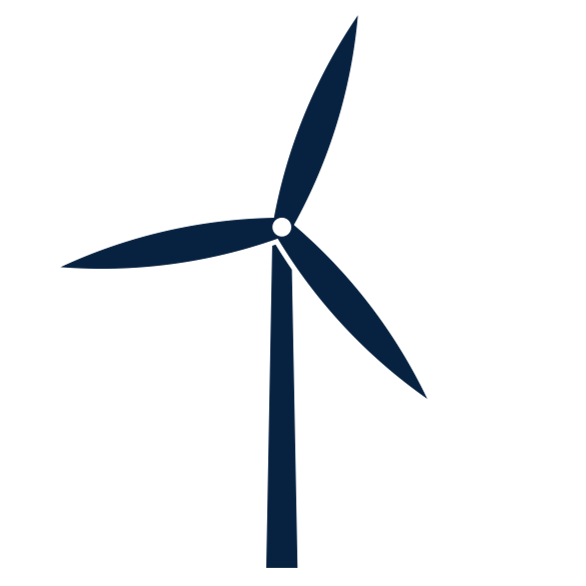
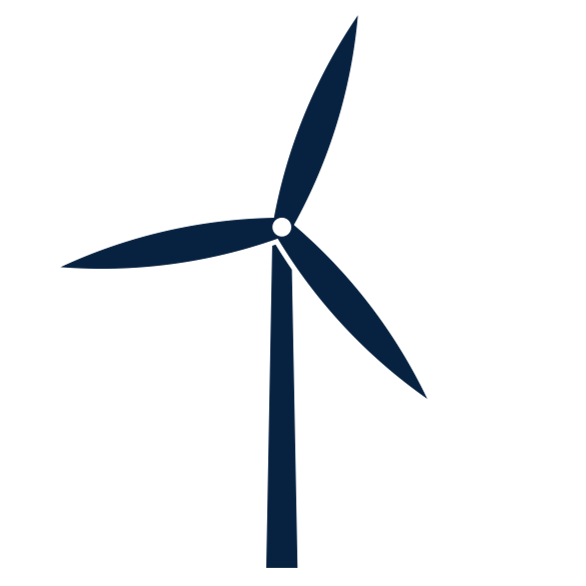
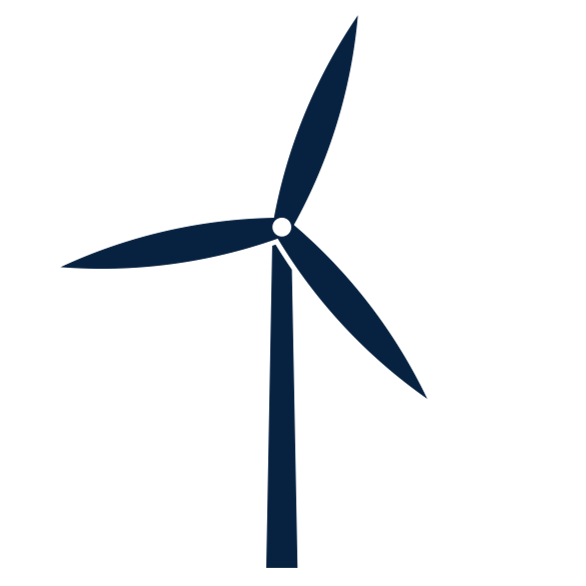
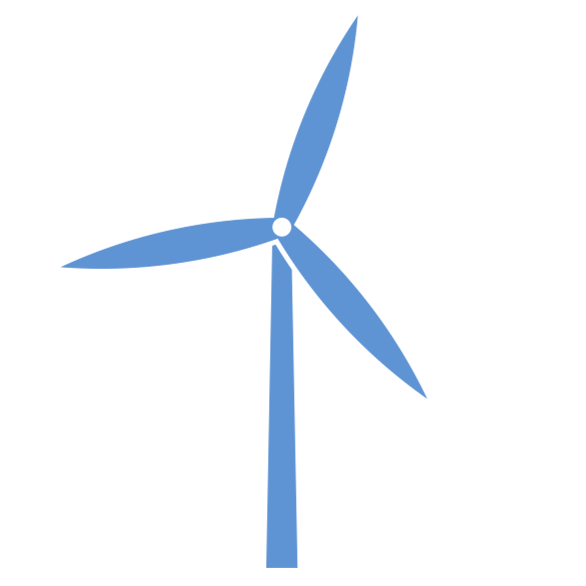
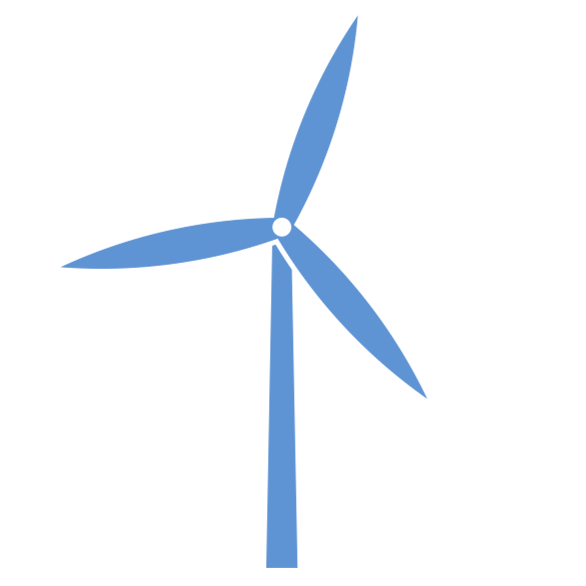
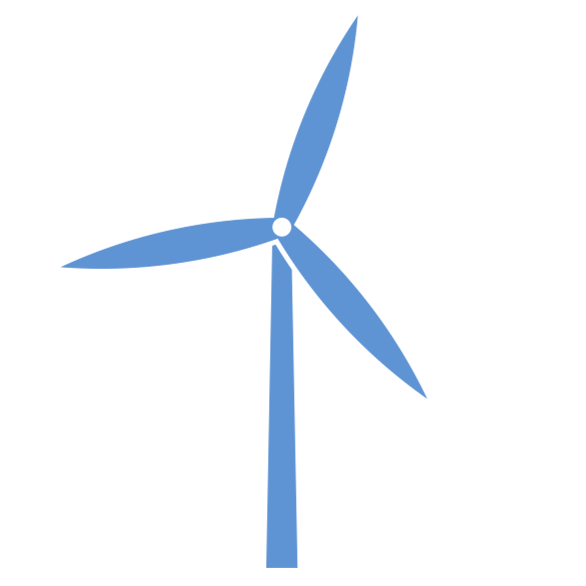
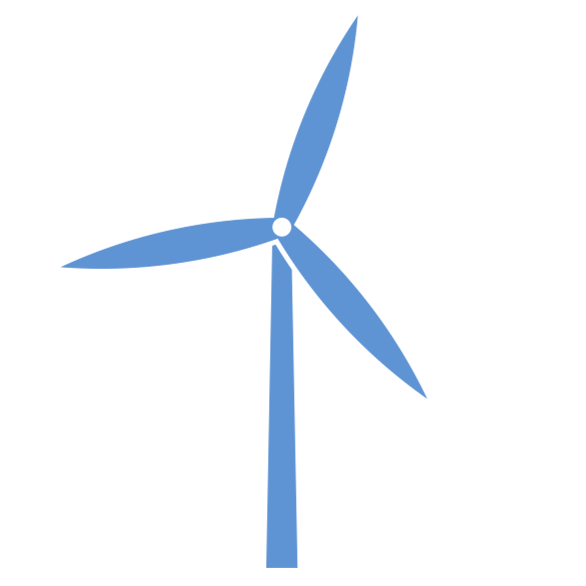
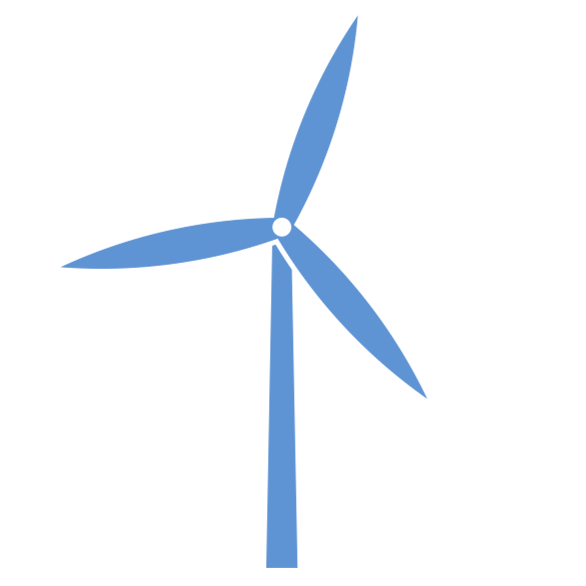
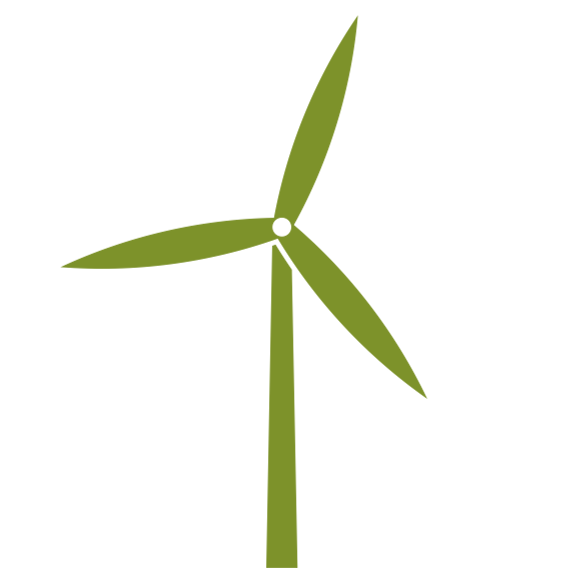
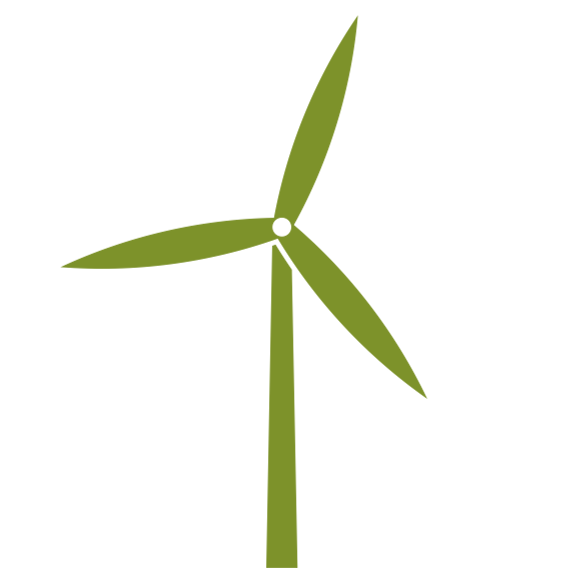
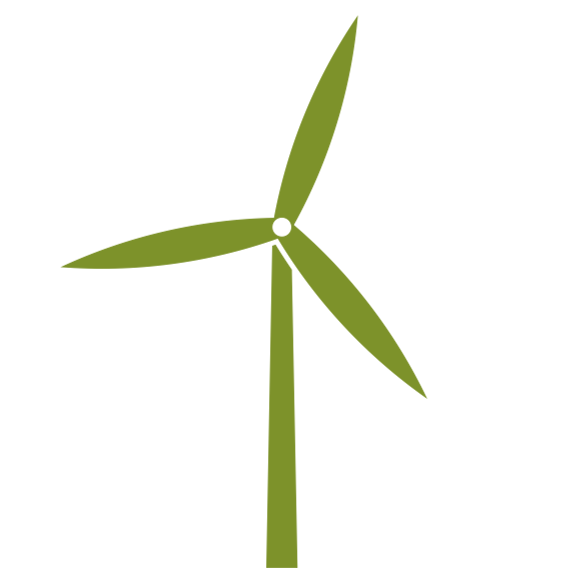
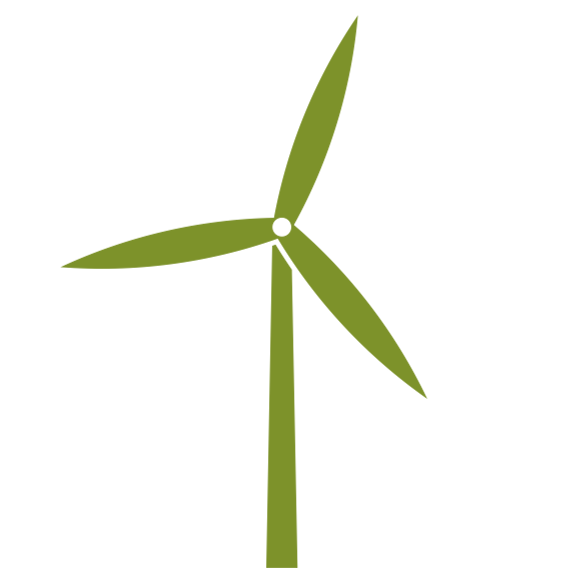
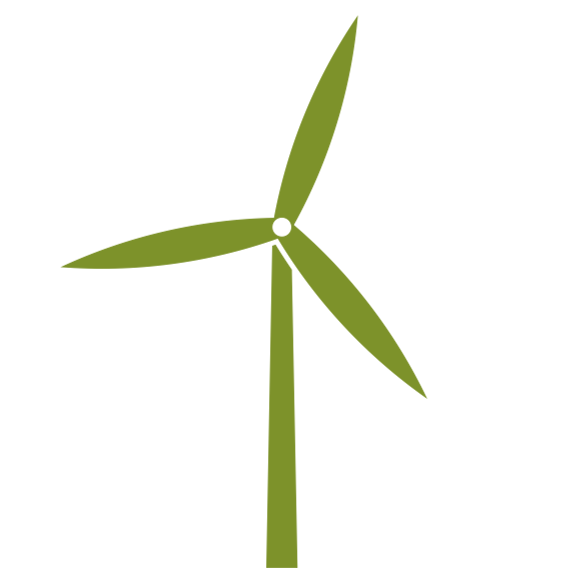
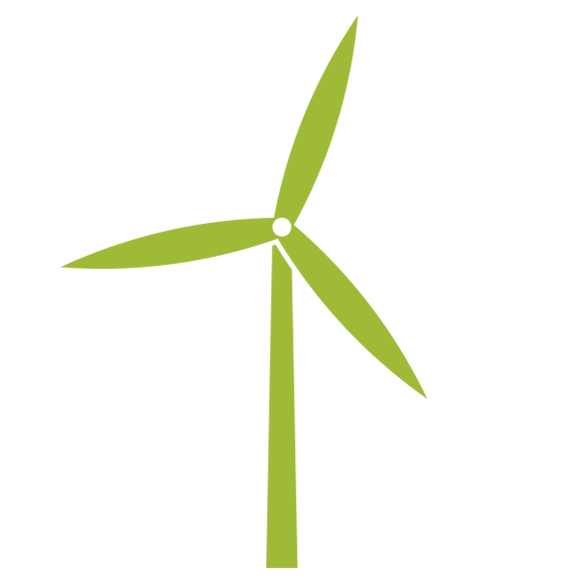
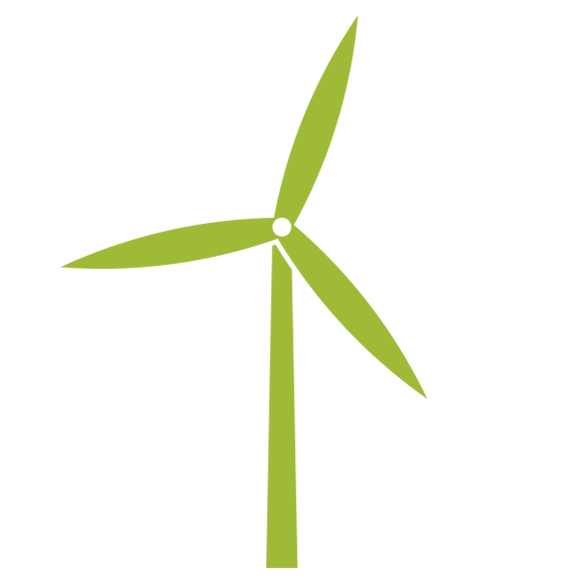
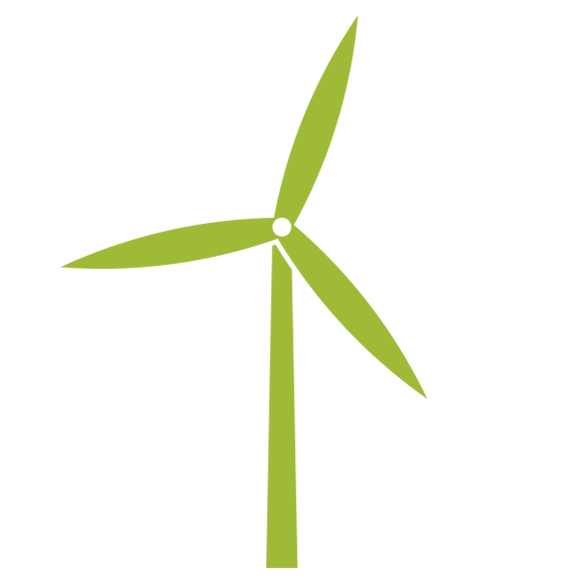
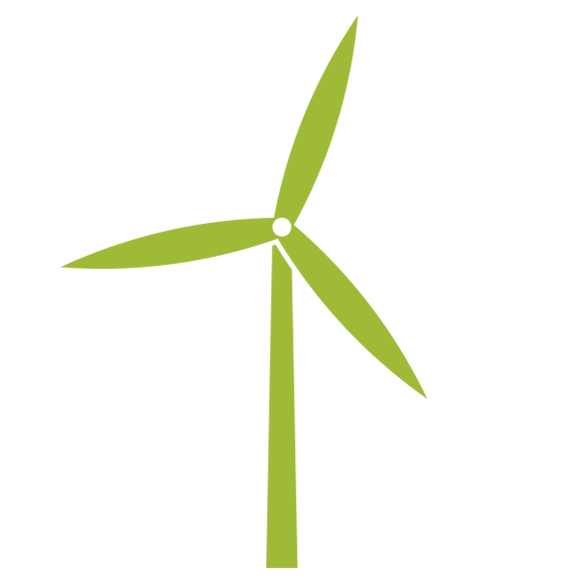
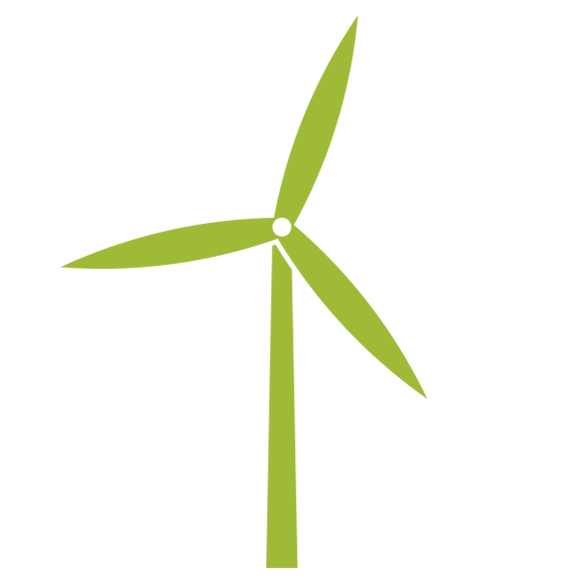
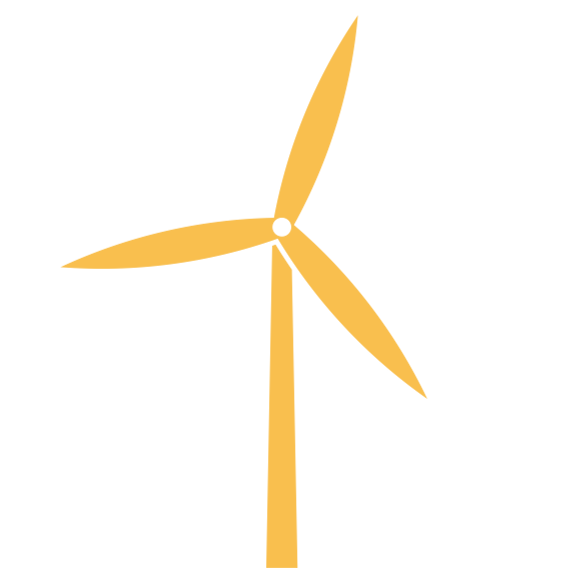
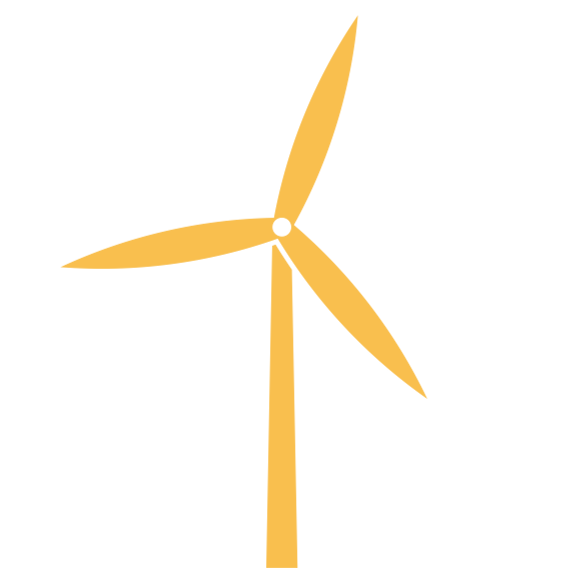
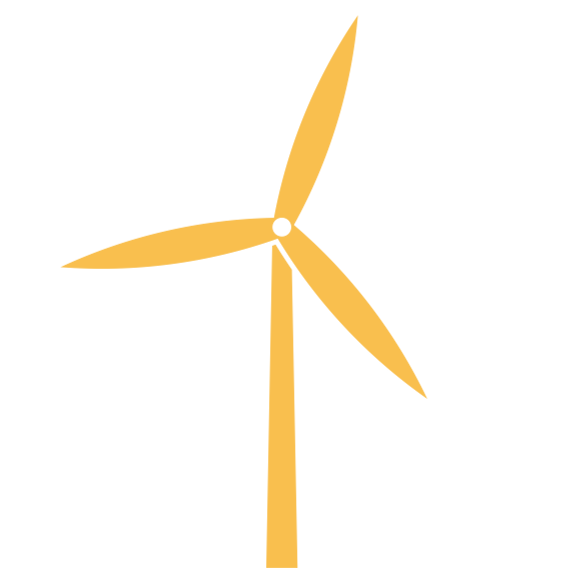
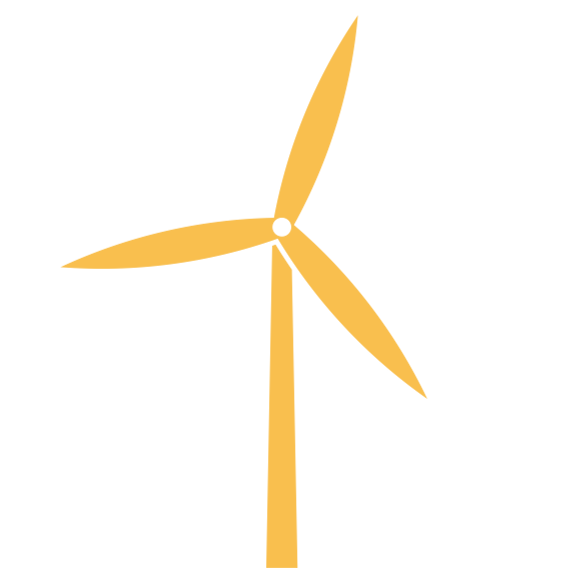
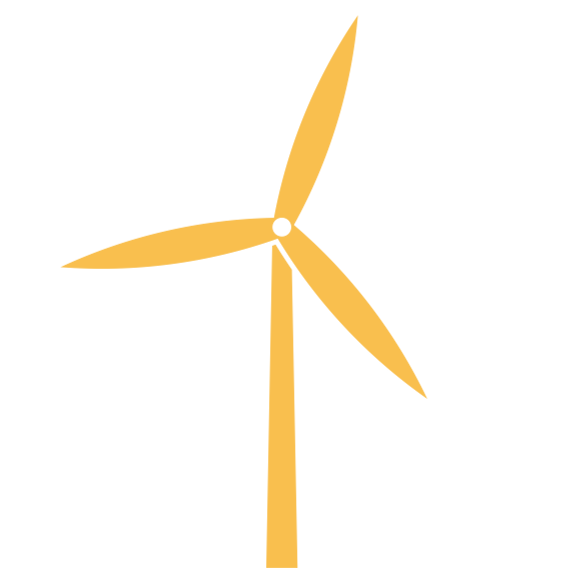
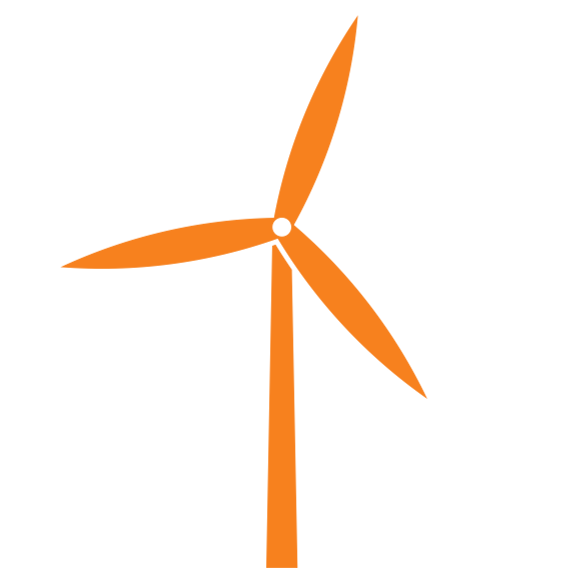
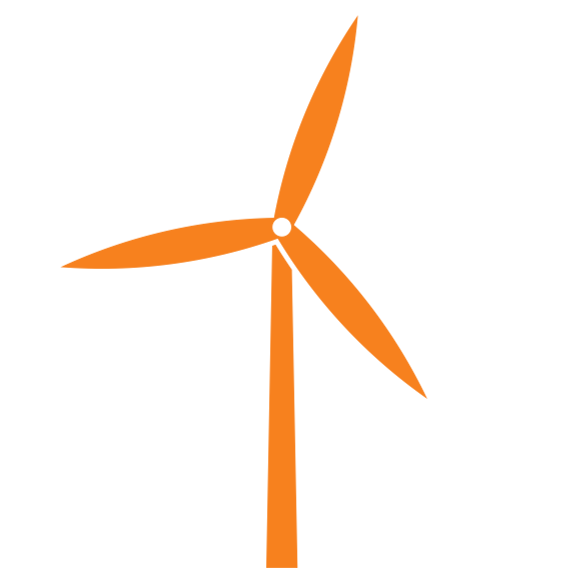
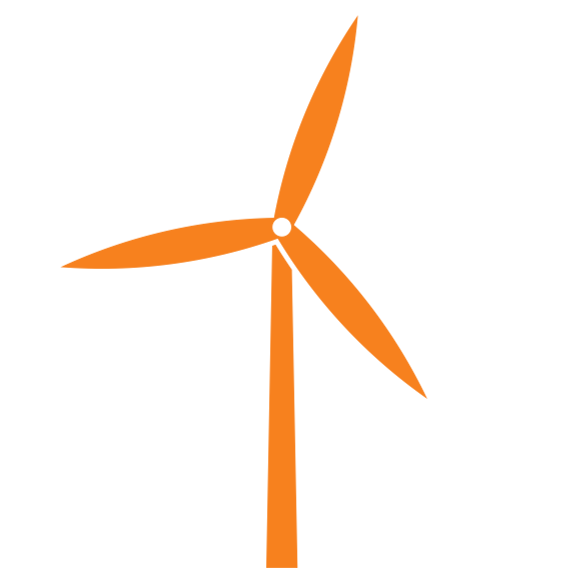
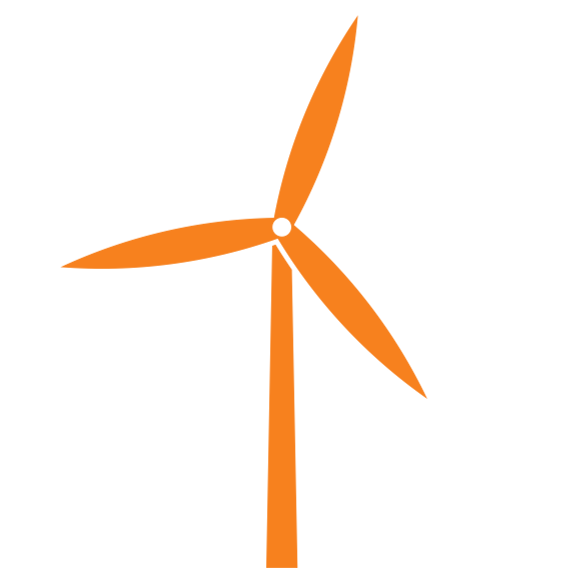
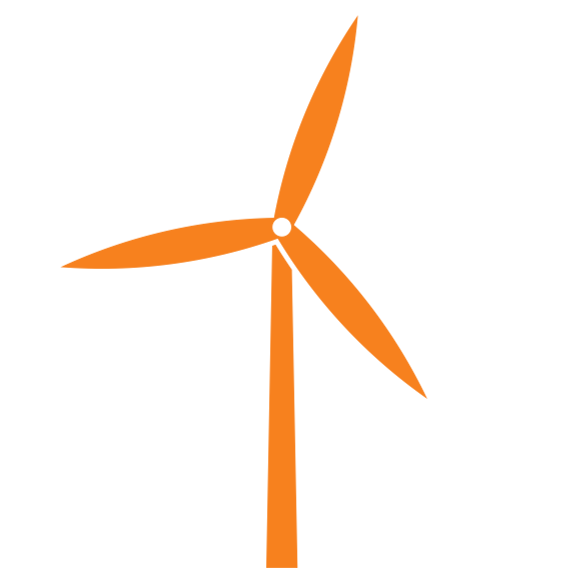
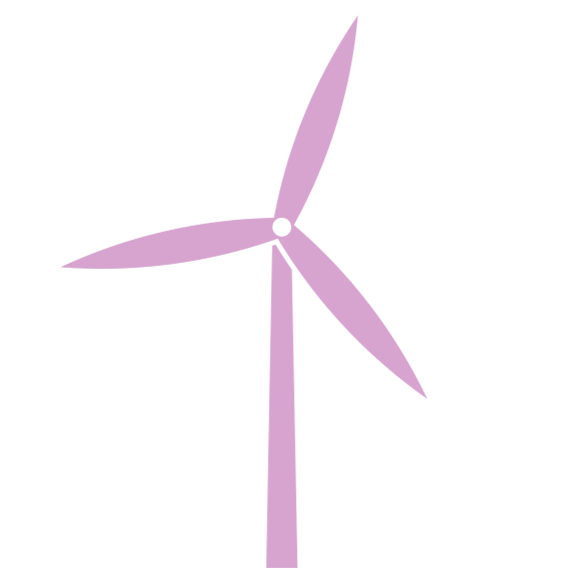
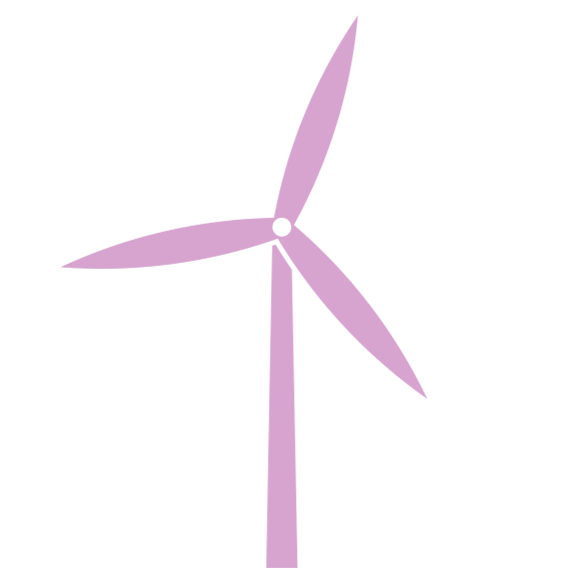
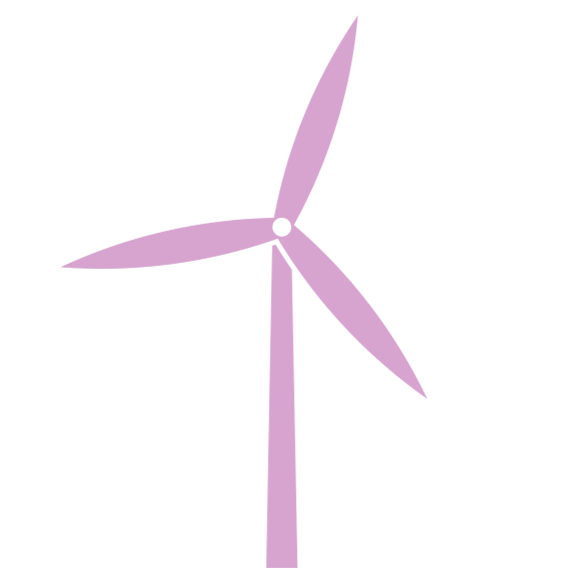
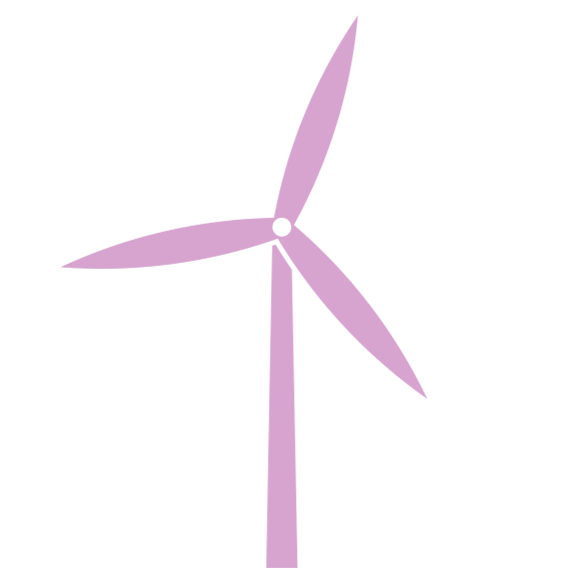
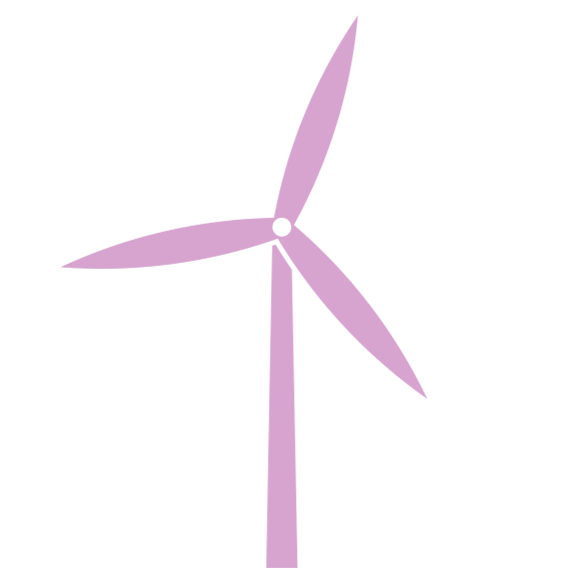
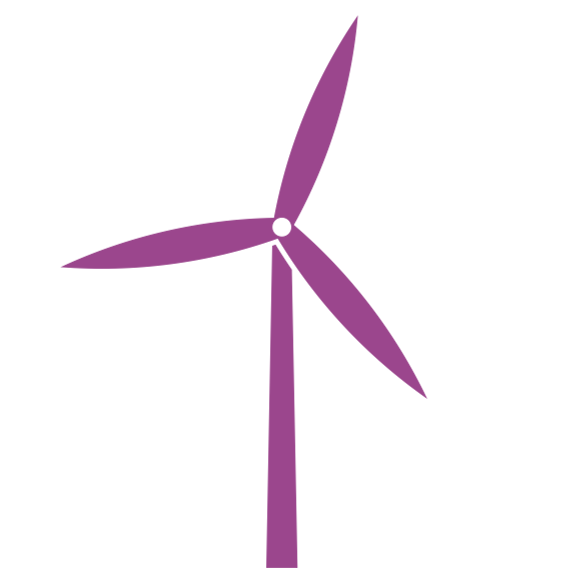
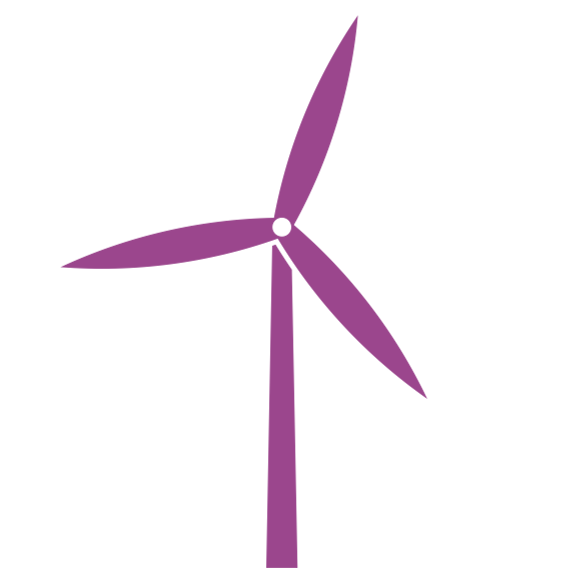
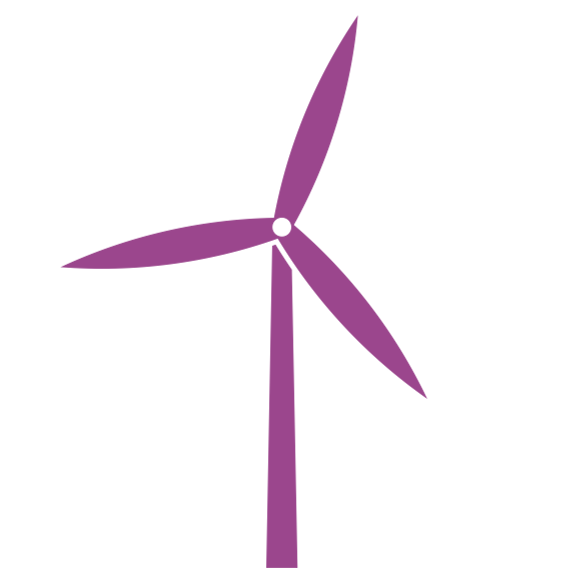
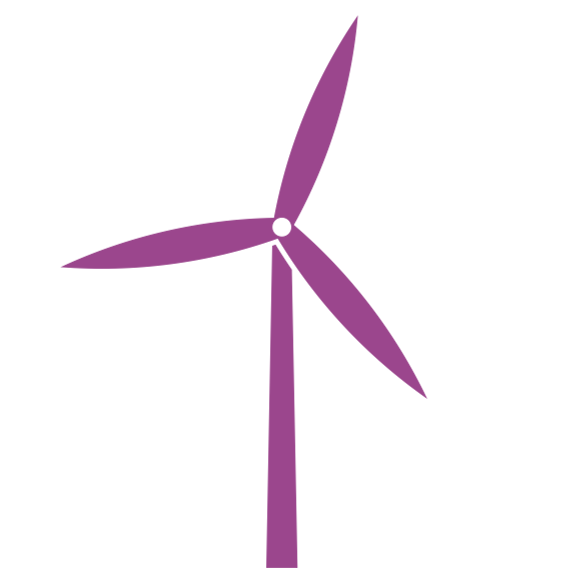
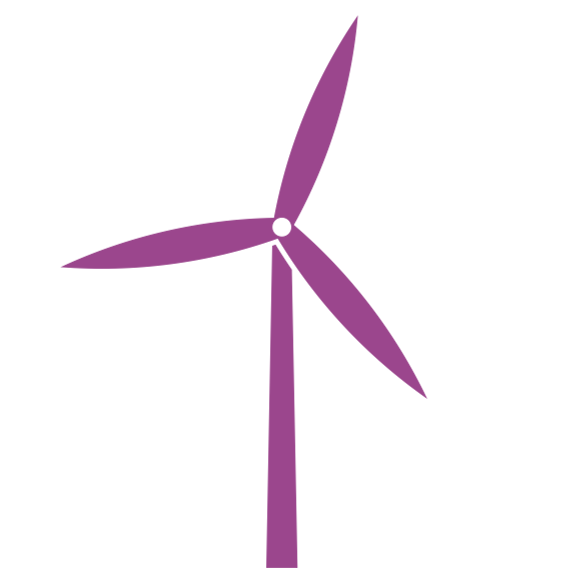
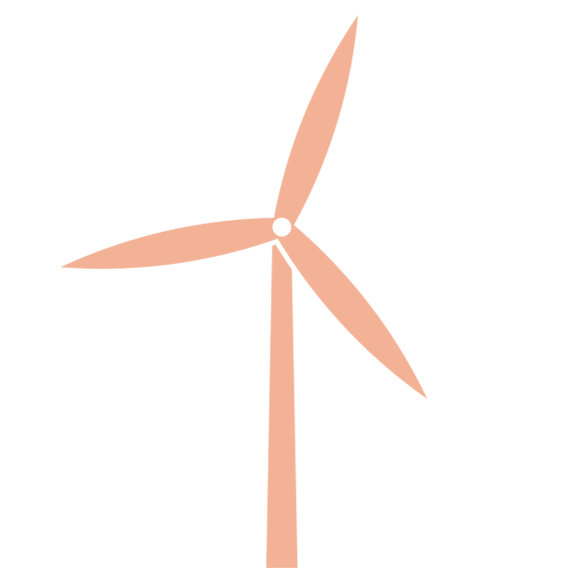
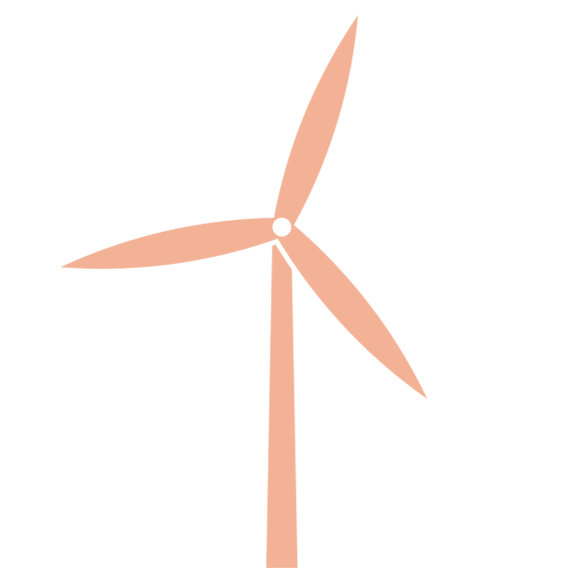
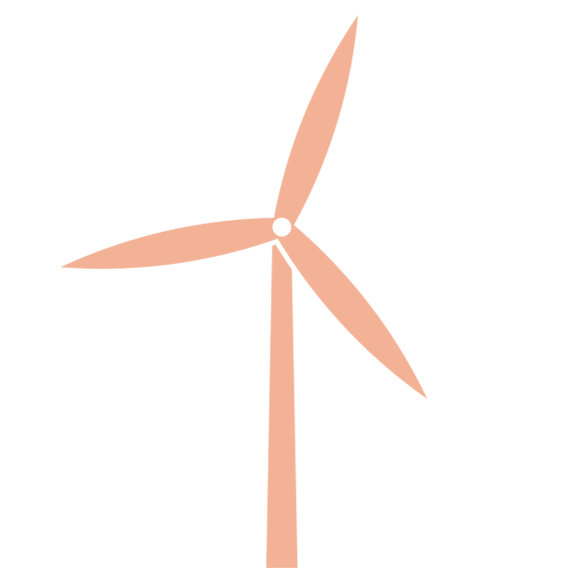
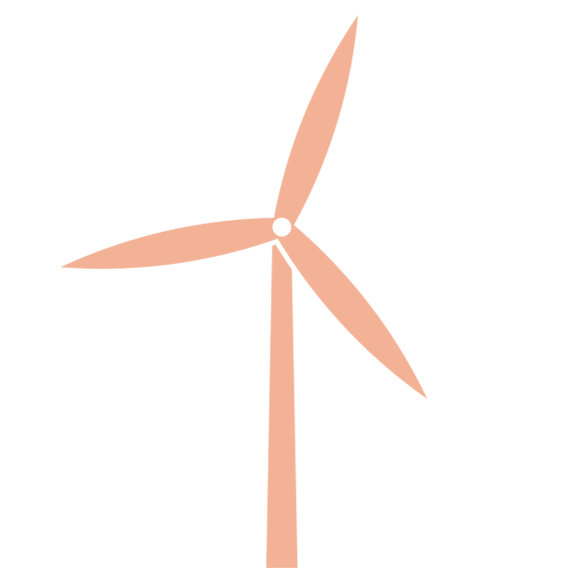
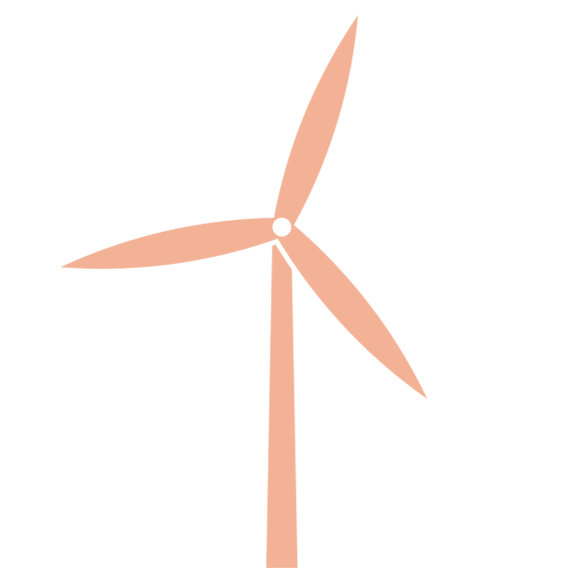
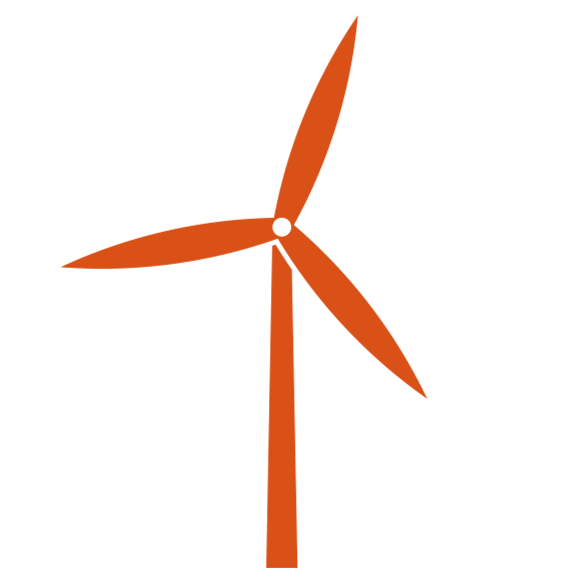
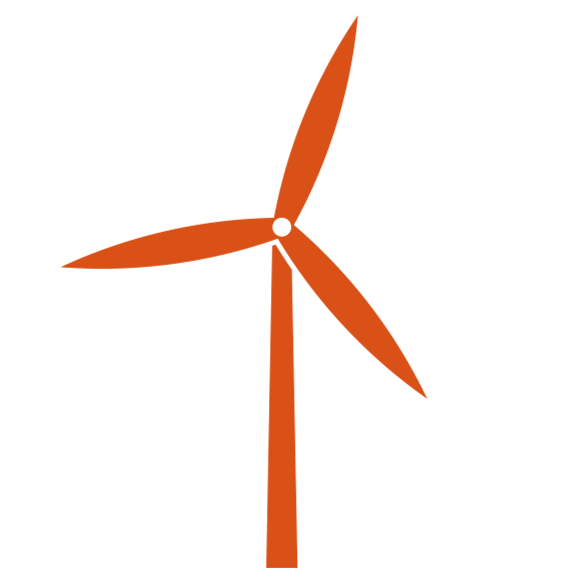
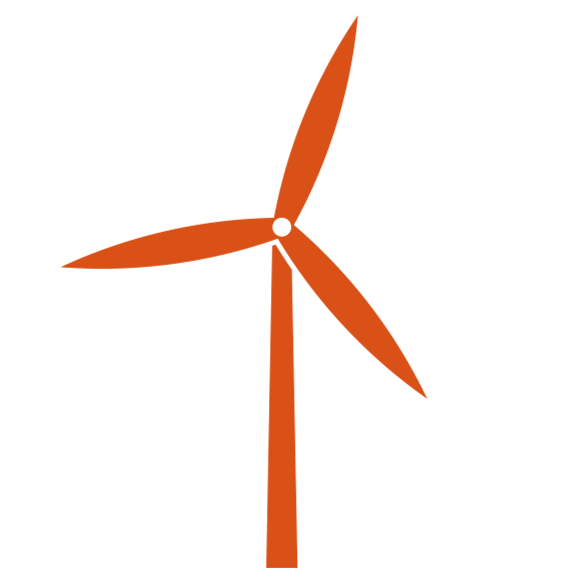
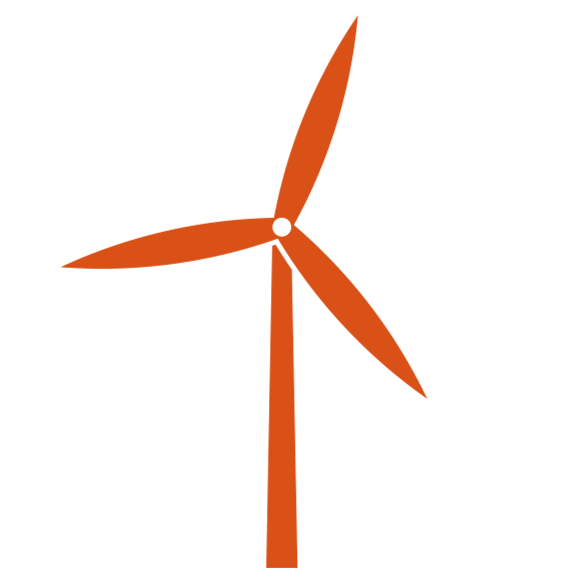
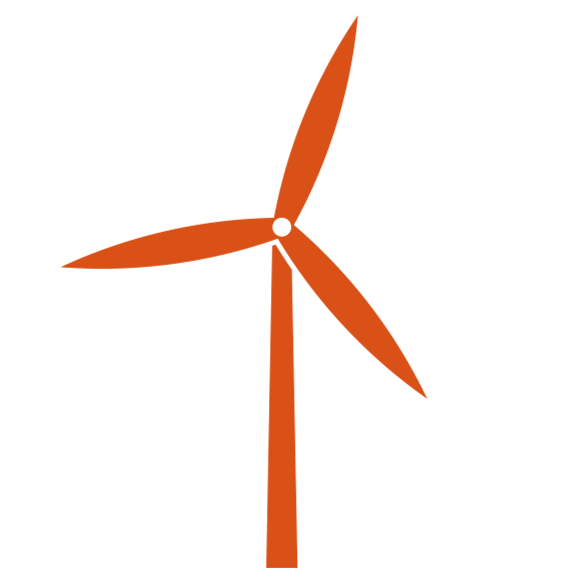
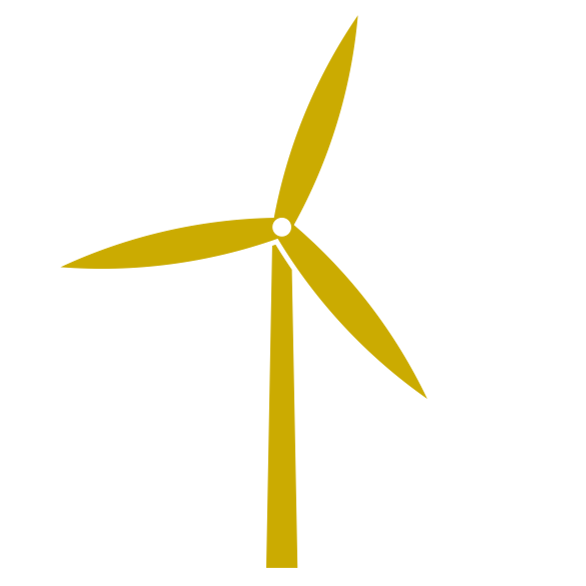
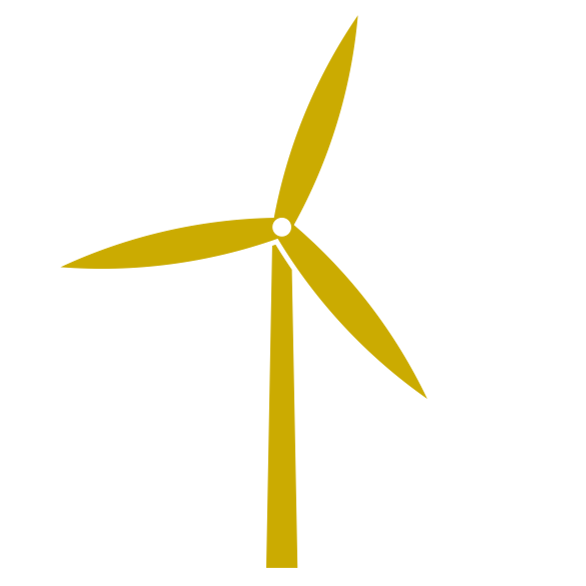
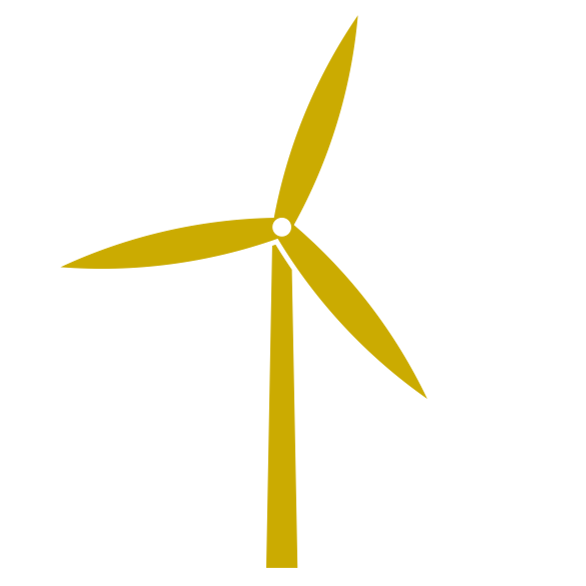
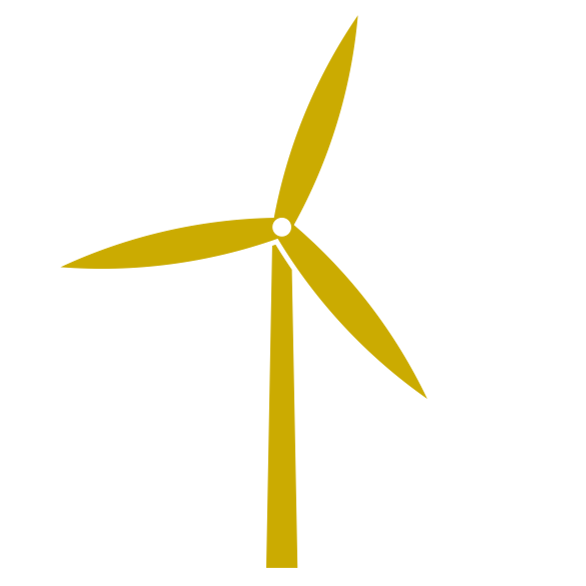
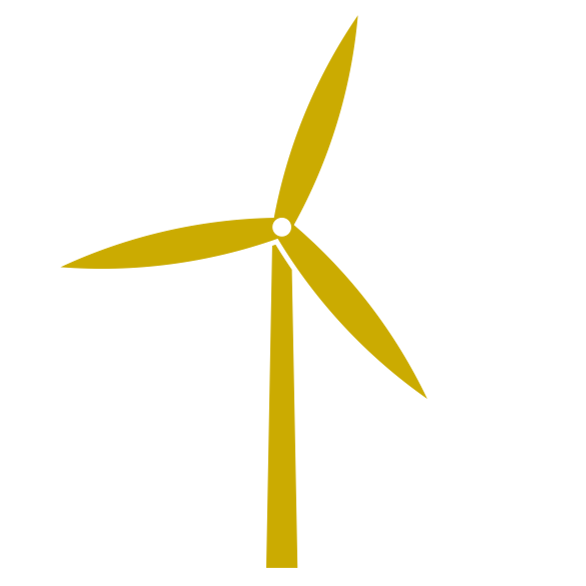
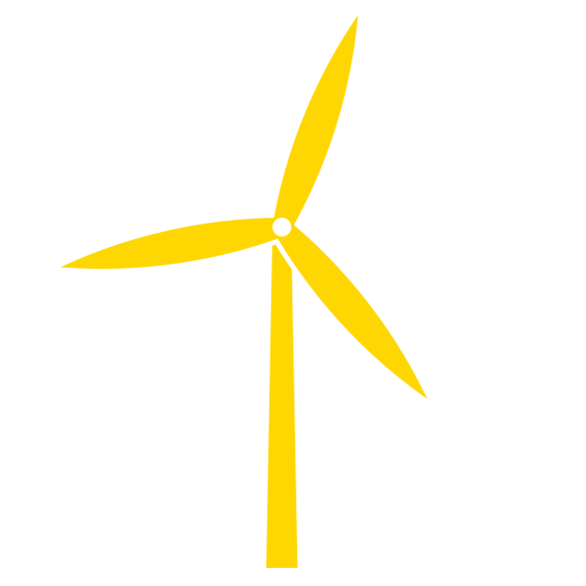
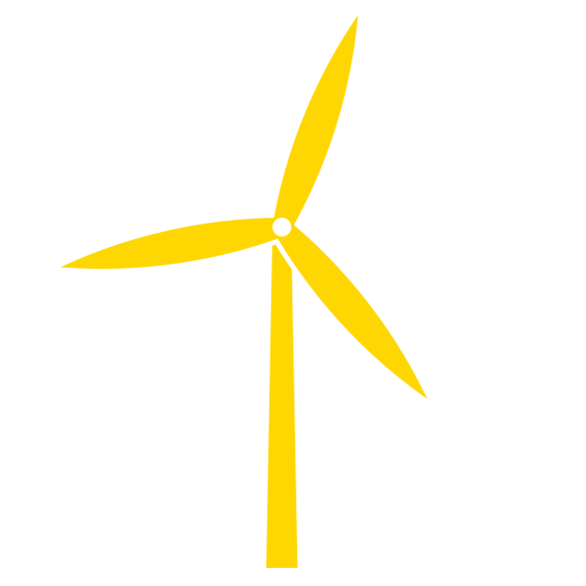
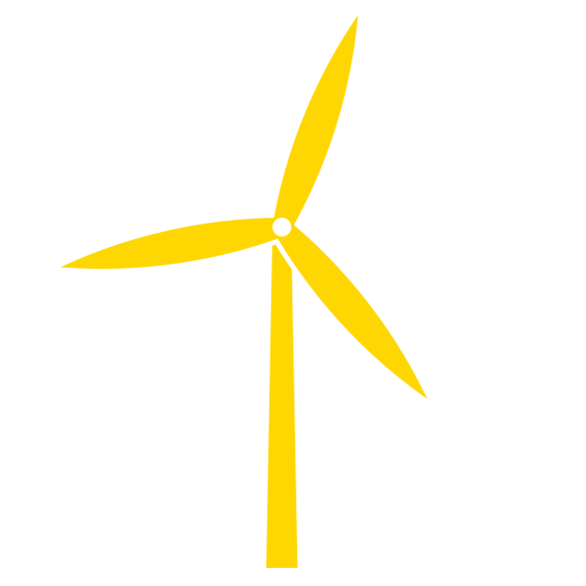
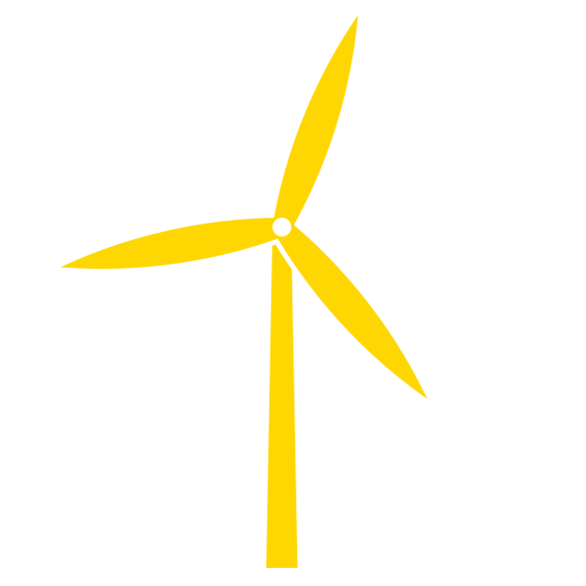
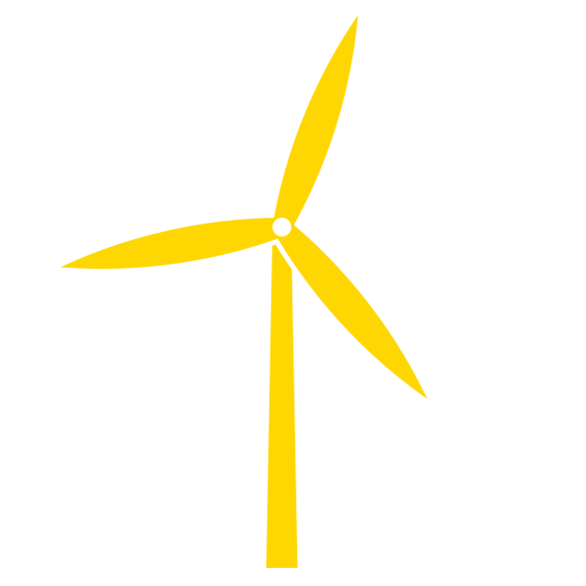

In [77]:
import pandas as pd
import folium
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Import TimezoneFinder separately if necessary
from timezonefinder import TimezoneFinder
import pytz
import os

# Load your data
excel_file_path = '../data/wind_farm_data/locations_wind_farms.xlsx'
df = pd.read_excel(excel_file_path)

# Define the clustering function
def nearest_cluster(locations, cluster_size):
    from scipy.spatial.distance import pdist, squareform
    coordinates = locations[['Latitude', 'Longitude']]
    distance_matrix = squareform(pdist(coordinates, metric='euclidean'))
    np.fill_diagonal(distance_matrix, np.inf)

    clusters = []
    unassigned = set(range(len(coordinates)))

    while len(unassigned) >= cluster_size:
        min_dist_idx = min(unassigned, key=lambda x: np.min(distance_matrix[x]))
        closest_indices = np.argsort(distance_matrix[min_dist_idx])[:cluster_size]
        closest_indices = [i for i in closest_indices if i in unassigned]
        cluster = [min_dist_idx] + closest_indices
        clusters.append(cluster)
        unassigned -= set(cluster)
        for idx in cluster:
            distance_matrix[:, idx] = np.inf
            distance_matrix[idx, :] = np.inf

    # Extract the cluster indices for the locations
    cluster_indices = sum(clusters, [])
    return locations.iloc[cluster_indices]

# Apply the clustering function
clustered_df = nearest_cluster(df, 5)

# Initialize the map
australia_map = folium.Map(location=[-30, 150], zoom_start=4, tiles='CartoDB positron')

# Path to the directory containing the icons
icons_dir_path = '../images/wind_turbines_icons'

# List of icon filenames
icon_filenames = os.listdir(icons_dir_path)

# Cluster and plot on the map
for i, cluster_indices in enumerate(np.array_split(clustered_df.index, len(clustered_df) // 5)):
    icon_path = os.path.join(icons_dir_path, icon_filenames[i % len(icon_filenames)])
    for index in cluster_indices:
        row = df.iloc[index]
        icon = folium.CustomIcon(icon_path, icon_size=(70, 70))
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['Farm Name'],
            icon=icon
        ).add_to(australia_map)

# Add custom CSS
css_filter = """
<style>
    .leaflet-tile {
        filter: brightness(80%) saturate(70%);
    }
</style>
"""
australia_map.get_root().html.add_child(folium.Element(css_filter))

# Display the map
australia_map


In [47]:
import folium
import pandas as pd
from folium.plugins import HeatMap
import os

location_file_path = '../data/wind_farm_data/locations_wind_farms.xlsx'
location_df = pd.read_excel(location_file_path)

def get_wind_speed(farm_name, weather_data):
    farm_weather = weather_data[weather_data['Farm Name'] == farm_name]
    avg_wind_speed = farm_weather['Wind Speed'].mean() 
    return avg_wind_speed

weather_data_path = '../data/weather_data/weather_interpolated/parquet/'
weather_df = pd.DataFrame()

def get_wind_farm_names(file_path):
    return [f.split('.')[0] for f in os.listdir(file_path) if f.endswith('.parquet')]

def read_farm_data(farm_name, file_path):
    full_path = os.path.join(file_path, f'{farm_name}.parquet')
    df = pd.read_parquet(full_path)
    df.index = pd.to_datetime(df.index)
    return df

weather_data = []

for farm_name in get_wind_farm_names(weather_data_path):
    farm_data = read_farm_data(farm_name, weather_data_path)
    avg_wind_speed = farm_data['wind_speed_10m'].mean()
    weather_data.append({'Abbreviation': farm_name, 'Avg Wind Speed': avg_wind_speed})

weather_df = pd.DataFrame(weather_data)

full_df = location_df.merge(weather_df, on='Abbreviation', how='left')

australia_map = folium.Map(location=[-30, 150], zoom_start=4, tiles='CartoDB positron')

scale_factor = 0.5  # You can adjust this factor based on your data

# Add a marker for each location with a circle whose radius corresponds to the wind speed
for index, row in full_df.iterrows():
    if not np.isnan(row['Avg Wind Speed']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Avg Wind Speed'] * scale_factor,  # Adjust the scale factor as necessary
            popup=f"{row['Farm Name']}: {row['Avg Wind Speed']} m/s",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(australia_map)

# Add custom CSS
css_filter = """
<style>
    .leaflet-tile {
        filter: brightness(80%) saturate(70%);
    }
</style>
"""

australia_map

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the start and end colors
end_color = '#072140'
start_color = '#D7E4F4'

# Convert hex colors to RGB
start_rgb = mcolors.hex2color(start_color)
end_rgb = mcolors.hex2color(end_color)

# Create a color gradient
colors = [start_rgb[j] + (i+1)*(end_rgb[j] - start_rgb[j])/6 for i in range(5) for j in range(3)]

# Convert RGB colors to hexadecimal representation
hex_colors = [mcolors.rgb2hex(color) for color in np.array(colors).reshape(5, 3)]

# Create a LinearSegmentedColormap
color_map = mcolors.LinearSegmentedColormap.from_list('custom', hex_colors, N=100)